In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [47]:
df = pd.read_csv('final_data_with_outcome.csv')

In [48]:
df.head()

W_CONF_ACC  W_CONF_AEC  W_CONF_A_SUN  W_CONF_A_TEN  W_CONF_BIG_EAST  \
0           0           0             0             0                1   
1           0           0             0             0                0   
2           0           0             0             0                0   
3           0           0             0             0                0   
4           0           0             0             0                1   

   W_CONF_BIG_SKY  W_CONF_BIG_SOUTH  W_CONF_BIG_TEN  W_CONF_BIG_TWELVE  \
0               0                 0               0                  0   
1               0                 0               0                  0   
2               0                 0               0                  0   
3               0                 0               0                  0   
4               0                 0               0                  0   

   W_CONF_BIG_WEST  ...  L_LOSEMARGINMEDIAN  L_LOSEMARGINMEAN  \
0                0  ...                 6.0          7.166667   
1                0  ...                10.0         12.600000   
2                0  ...                 4.0          6.500000   
3                0  ...                 7.0          6.777778   
4                0  ...                11.0          9.666667   

   L_WON_CONFERENCE  L_TOTAL_WINS  W_WLOCN  W_WLOCH  W_WLOCA  L_WLOCN  \
0                 1            24        1       17        6        4   
1                 0            24        3       13        3        1   
2                 1            24        3       11       10        0   
3                 0            21        3       11       10        5   
4                 0            20        1       17        6        2   

   L_WLOCH  L_WLOCA  
0       15        5  
1       16        7  
2       16        8  
3       12        4  
4       13        5  

[5 rows x 178 columns]

In [49]:
df = df.drop(df.columns[0], axis=1)
df.head()

W_CONF_AEC  W_CONF_A_SUN  W_CONF_A_TEN  W_CONF_BIG_EAST  W_CONF_BIG_SKY  \
0           0             0             0                1               0   
1           0             0             0                0               0   
2           0             0             0                0               0   
3           0             0             0                0               0   
4           0             0             0                1               0   

   W_CONF_BIG_SOUTH  W_CONF_BIG_TEN  W_CONF_BIG_TWELVE  W_CONF_BIG_WEST  \
0                 0               0                  0                0   
1                 0               0                  0                0   
2                 0               0                  0                0   
3                 0               0                  0                0   
4                 0               0                  0                0   

   W_CONF_CAA  ...  L_LOSEMARGINMEDIAN  L_LOSEMARGINMEAN  L_WON_CONFERENCE  \
0           0  ...                 6.0          7.166667                 1   
1           0  ...                10.0         12.600000                 0   
2           0  ...                 4.0          6.500000                 1   
3           0  ...                 7.0          6.777778                 0   
4           0  ...                11.0          9.666667                 0   

   L_TOTAL_WINS  W_WLOCN  W_WLOCH  W_WLOCA  L_WLOCN  L_WLOCH  L_WLOCA  
0            24        1       17        6        4       15        5  
1            24        3       13        3        1       16        7  
2            24        3       11       10        0       16        8  
3            21        3       11       10        5       12        4  
4            20        1       17        6        2       13        5  

[5 rows x 177 columns]

In [50]:
# Assuming X is your feature matrix
X = df

# Drop non-numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_columns]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Instantiate PCA
pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Get the loadings of each feature on the principal components
loadings = pca.components_

# Calculate the importance of each feature based on the sum of squared loadings across all principal components
feature_importance = np.sum(np.square(loadings), axis=0)

# Sort the features based on their importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Get the top 20 feature indices
top_20_feature_indices = sorted_indices[:20]

# Retrieve the top 20 features from the original feature matrix
top_20_features_matrix = X_numeric.iloc[:, top_20_feature_indices]

# Convert the top 20 features matrix to a DataFrame
top_20_features_df = pd.DataFrame(top_20_features_matrix)

print(top_20_features_df)

      W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
0              0                0             0               0    18.966667   
1              0                0             0               0    17.724138   
2              0                0             0               0    23.400000   
3              0                0             0               0    16.200000   
4              0                0             0               0    12.965517   
...          ...              ...           ...             ...          ...   
1297           0                0             0               0    17.529412   
1298           0                0             0               0    19.617647   
1299           0                0             0               0    22.218750   
1300           0                0             0               0    19.875000   
1301           0                0             0               0    20.806452   

      L_CONF_HORIZON  L_CONF_AEC  W_CON

In [51]:
df = top_20_features_df
df.head()

W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
0           0                0             0               0    18.966667   
1           0                0             0               0    17.724138   
2           0                0             0               0    23.400000   
3           0                0             0               0    16.200000   
4           0                0             0               0    12.965517   

   L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  L_CONF_BIG_SKY  \
0               0           0             0                0               0   
1               0           0             0                0               0   
2               0           0             0                0               0   
3               0           0             0                0               0   
4               0           0             0                0               0   

   L_AST_STDDEV  L_CONF_BIG_WEST  L_CONF_PATRIOT  W_TOTAL_WINS  W_CONF_SWAC  \
0      5.252804                0               0            24            0   
1      4.127584                0               0            19            0   
2      4.445843                0               0            24            0   
3      3.329596                0               0            24            0   
4      4.197407                0               0            24            0   

   L_CONF_CUSA  L_CONF_CAA  W_CONF_SUMMIT  L_CONF_BIG_SOUTH  W_FGA3_STDDEV  
0            0           0              0                 0       4.364828  
1            0           0              0                 0       5.664976  
2            1           0              0                 0       4.680691  
3            0           0              0                 0       4.680691  
4            0           0              0                 0       4.364828

In [52]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 W_CONF_WAC          0
L_CONF_BIG_EAST     0
W_CONF_A_TEN        0
W_CONF_BIG_SKY      0
L_FGA3_MEAN         0
L_CONF_HORIZON      0
L_CONF_AEC          0
W_CONF_A_SUN        0
W_CONF_BIG_WEST     0
L_CONF_BIG_SKY      0
L_AST_STDDEV        0
L_CONF_BIG_WEST     0
L_CONF_PATRIOT      0
W_TOTAL_WINS        0
W_CONF_SWAC         0
L_CONF_CUSA         0
L_CONF_CAA          0
W_CONF_SUMMIT       0
L_CONF_BIG_SOUTH    0
W_FGA3_STDDEV       0
dtype: int64


In [53]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [54]:
# Summary statistics for numerical variables
numerical_summary = df.describe()
print("Summary statistics for numerical variables:\n", numerical_summary)

## Summary statistics for categorical variables
#categorical_summary = df.describe(include=['object'])
#print("Summary statistics for categorical variables:\n", categorical_summary)

## If you want to calculate frequency counts for each category in categorical variables:
#categorical_counts = {}
#for col in df.select_dtypes(include=['object']).columns:
#    categorical_counts[col] = df[col].value_counts()

#print("Frequency counts for categorical variables:\n", categorical_counts)

Summary statistics for numerical variables:
         W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  \
count  1302.000000      1302.000000   1302.000000     1302.000000   
mean      0.004608         0.092166      0.032258        0.000768   
std       0.067754         0.289371      0.176753        0.027714   
min       0.000000         0.000000      0.000000        0.000000   
25%       0.000000         0.000000      0.000000        0.000000   
50%       0.000000         0.000000      0.000000        0.000000   
75%       0.000000         0.000000      0.000000        0.000000   
max       1.000000         1.000000      1.000000        1.000000   

       L_FGA3_MEAN  L_CONF_HORIZON   L_CONF_AEC  W_CONF_A_SUN  \
count  1302.000000     1302.000000  1302.000000   1302.000000   
mean     19.477773        0.017665     0.015361      0.003840   
std       3.351832        0.131782     0.123031      0.061874   
min       9.931034        0.000000     0.000000      0.000000   
25%     

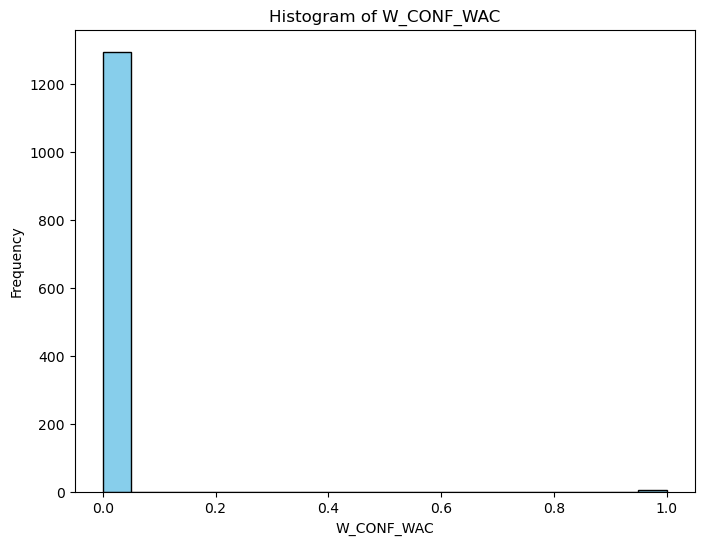

Outliers for W_CONF_WAC :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
35             1                0             0               0    20.862069   
112            1                0             0               0    15.724138   
117            1                0             0               0    15.793103   
151            1                0             0               0    20.482759   
281            1                0             0               0    18.375000   
1189           1                1             0               0    21.062500   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
35                 0           0             0                0   
112                0           0             0                0   
117                0           0             0                0   
151                0           0             0                0   
281                0           0             0                0   
1189      

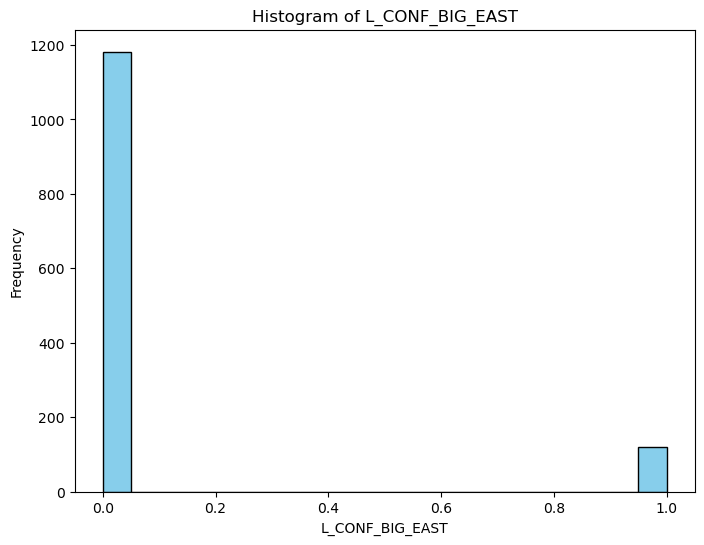

Outliers for L_CONF_BIG_EAST :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
19             0                1             0               0    15.700000   
33             0                1             0               0    17.766667   
52             0                1             0               0    21.774194   
71             0                1             0               0    16.857143   
83             0                1             0               0    13.857143   
...          ...              ...           ...             ...          ...   
1225           0                1             0               0    21.500000   
1236           0                1             0               0    25.441176   
1245           0                1             0               0    18.937500   
1257           0                1             0               0    24.757576   
1271           0                1             0               0    19.117647   

      L

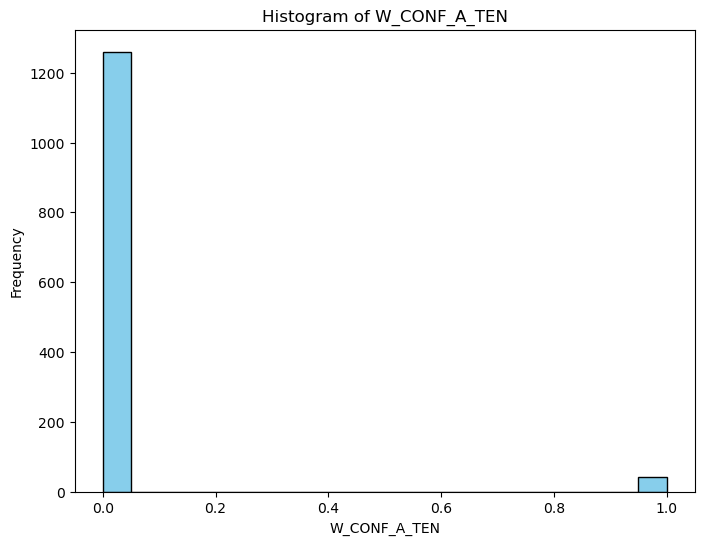

Outliers for W_CONF_A_TEN :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
28             0                0             1               0    28.333333   
65             0                0             1               0    18.250000   
66             0                0             1               0    18.866667   
73             0                0             1               0    23.482759   
98             0                0             1               0    19.964286   
102            0                0             1               0    10.875000   
110            0                0             1               0    19.838710   
200            0                0             1               0    19.281250   
279            0                0             1               0    18.125000   
373            0                0             1               0    19.937500   
374            0                1             1               0    20.333333   
381        

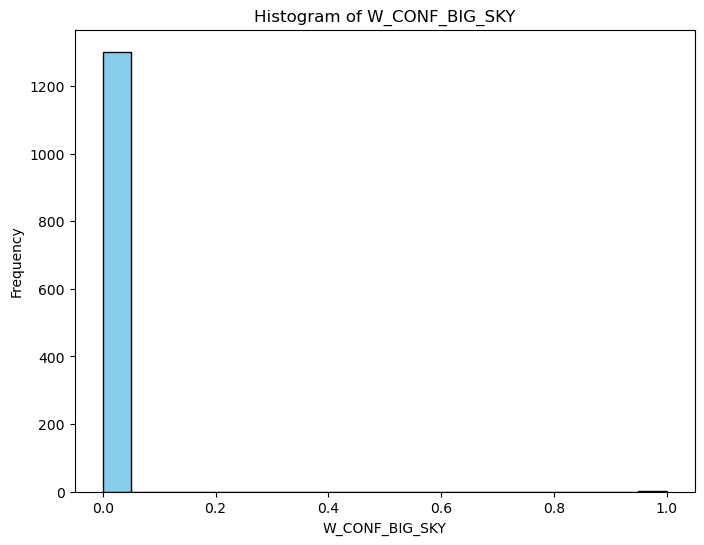

Outliers for W_CONF_BIG_SKY :
      W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
227           0                0             0               1    15.064516   

     L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
227               0           0             0                0   

     L_CONF_BIG_SKY  L_AST_STDDEV  L_CONF_BIG_WEST  L_CONF_PATRIOT  \
227               0       4.38595                0               0   

     W_TOTAL_WINS  W_CONF_SWAC  L_CONF_CUSA  L_CONF_CAA  W_CONF_SUMMIT  \
227            21            0            0           0              0   

     L_CONF_BIG_SOUTH  W_FGA3_STDDEV  
227                 0        4.71767  


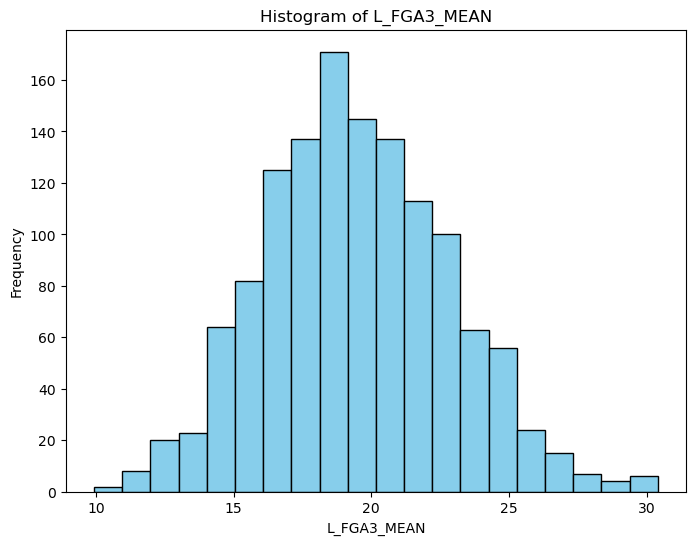

Outliers for L_FGA3_MEAN :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
152            0                0             0               0     9.931034   
197            0                1             0               0    29.310345   
382            0                0             0               0    28.843750   
1064           0                0             0               0    28.878788   
1081           0                0             0               0    29.970588   
1097           0                1             0               0    30.088235   
1109           0                0             0               0    30.400000   
1190           0                0             0               0    30.093750   
1246           0                0             0               0    28.766667   
1252           0                0             0               0    29.764706   
1263           0                0             0               0    29.939394   

      L_CON

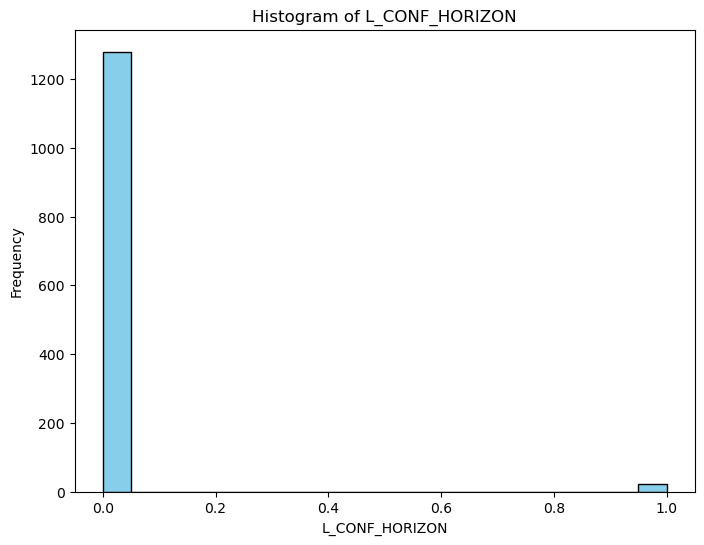

Outliers for L_CONF_HORIZON :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
10             0                0             0               0    21.862069   
59             0                0             0               0    21.800000   
123            0                0             0               0    12.709677   
155            0                0             0               0    22.370370   
233            0                0             0               0    19.464286   
291            0                0             0               0    24.451613   
316            0                0             0               0    15.593750   
326            0                0             0               0    24.531250   
407            0                0             0               0    22.500000   
427            0                0             0               0    15.343750   
500            0                0             0               0    19.750000   
552      

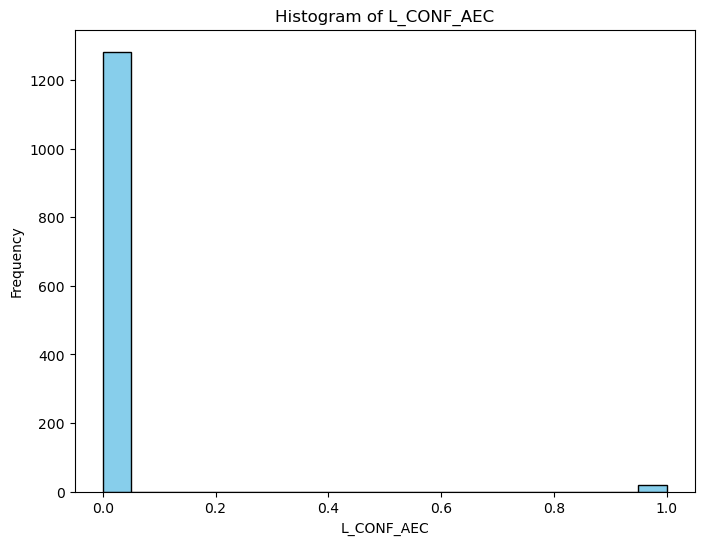

Outliers for L_CONF_AEC :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
63             0                0             0               0    15.482759   
93             0                0             0               0    19.500000   
172            0                0             0               0    23.600000   
255            0                0             0               0    18.516129   
284            0                0             0               0    18.156250   
350            0                0             0               0    18.967742   
398            0                0             0               0    18.233333   
511            0                0             0               0    14.764706   
578            0                0             0               0    21.205882   
612            0                0             0               0    15.647059   
693            0                0             0               0    16.470588   
743          

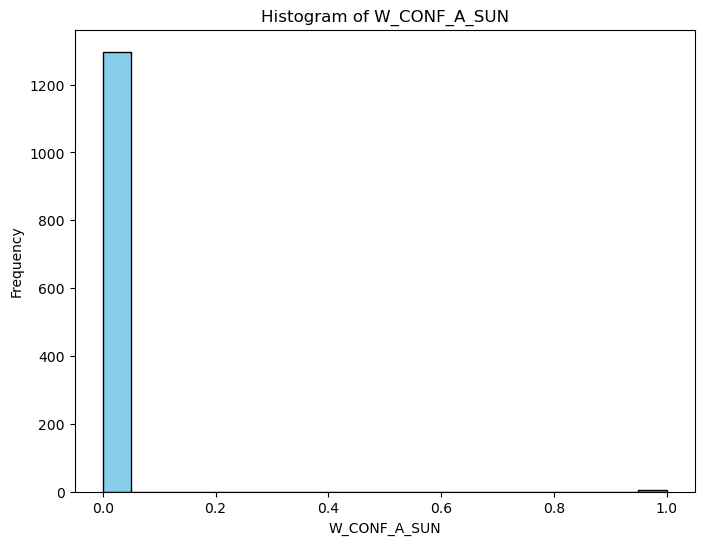

Outliers for W_CONF_A_SUN :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
664            0                1             0               0    16.419355   
669            0                0             0               0    18.200000   
746            0                0             0               0    22.470588   
856            0                0             0               0    19.903226   
1045           0                0             0               0    22.787879   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
664                0           0             1                0   
669                0           0             1                0   
746                0           0             1                0   
856                0           0             1                0   
1045               0           0             1                0   

      L_CONF_BIG_SKY  L_AST_STDDEV  L_CONF_BIG_WEST  L_CONF_PATRIOT  \
664             

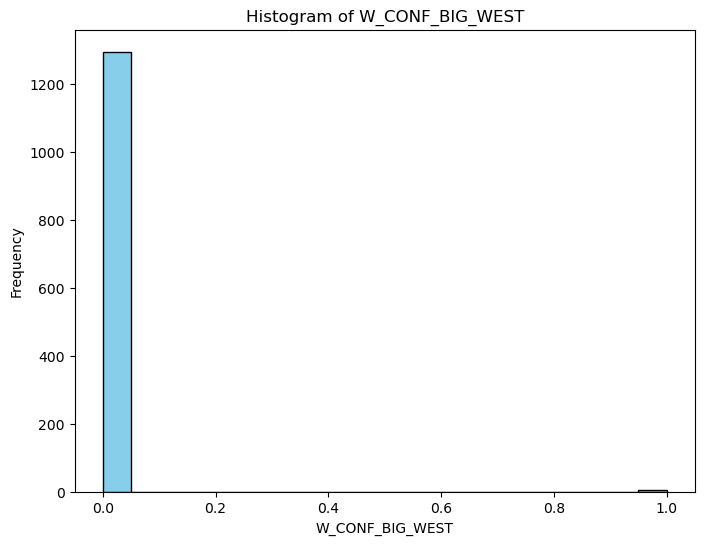

Outliers for W_CONF_BIG_WEST :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
115            0                1             0               0    21.535714   
136            0                1             0               0    15.678571   
761            0                0             0               0    17.593750   
876            0                0             0               0    19.151515   
956            0                0             0               0    21.933333   
1095           0                0             0               0    21.030303   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
115                0           0             0                1   
136                0           0             0                1   
761                0           0             0                1   
876                0           0             0                1   
956                0           0             0                1   
1095 

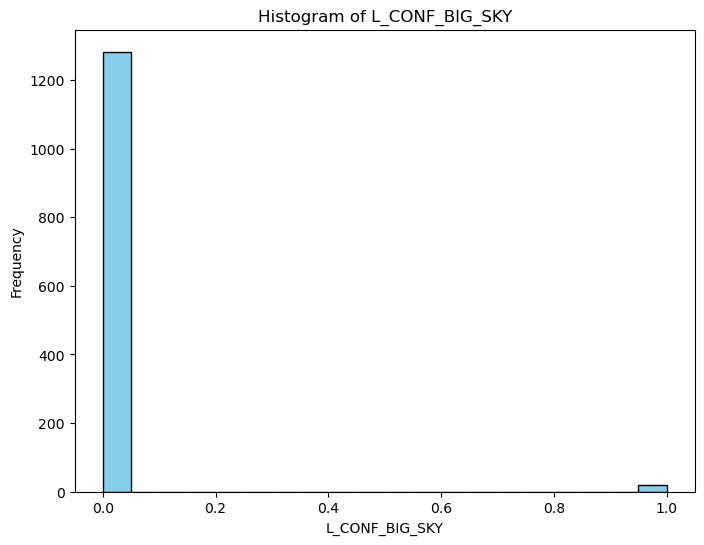

Outliers for L_CONF_BIG_SKY :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
43             0                0             0               0    18.206897   
109            0                0             0               0    16.428571   
143            0                0             0               0    16.750000   
234            0                0             0               0    19.444444   
317            0                0             0               0    14.642857   
351            0                0             0               0    22.500000   
396            0                0             1               0    25.580645   
461            0                0             0               0    16.379310   
543            0                0             0               0    20.758621   
591            0                0             0               0    16.758621   
658            0                0             0               0    17.896552   
777      

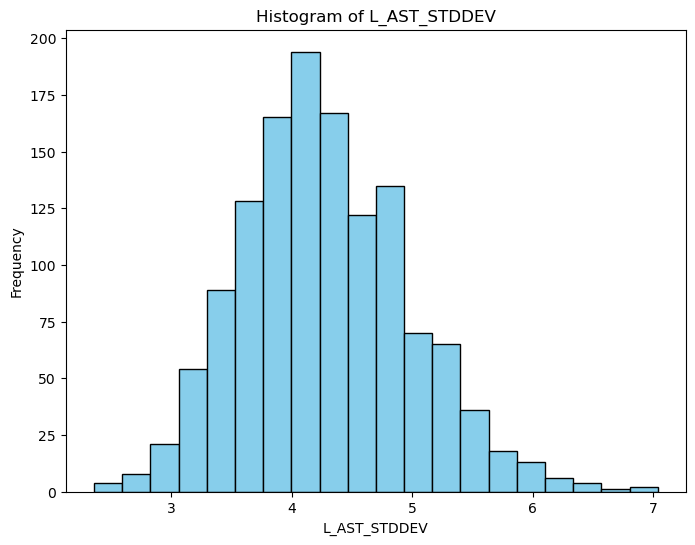

Outliers for L_AST_STDDEV :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
274            0                0             0               0    15.451613   
321            0                0             0               0    24.812500   
476            0                0             0               0    23.285714   
617            0                0             0               0    22.312500   
628            0                0             0               0    18.393939   
849            0                0             0               0    17.903226   
860            0                0             0               0    20.848485   
894            0                0             0               0    16.562500   
962            0                0             0               0    21.588235   
993            0                0             0               0    20.333333   
1118           0                0             0               0    19.888889   
1165       

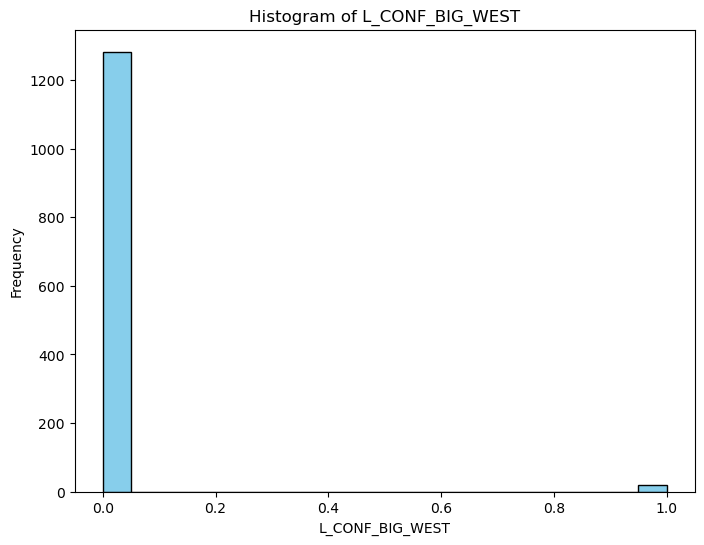

Outliers for L_CONF_BIG_WEST :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
62             0                0             0               0    12.133333   
122            0                0             0               0    16.600000   
135            0                0             0               0    16.620690   
157            0                0             0               0    14.645161   
235            0                0             0               0    16.758621   
283            0                0             0               0    22.933333   
349            0                0             0               0    22.354839   
446            0                0             0               0    19.551724   
494            0                0             0               0    18.142857   
559            0                0             0               0    18.827586   
640            0                0             0               0    18.451613   
660     

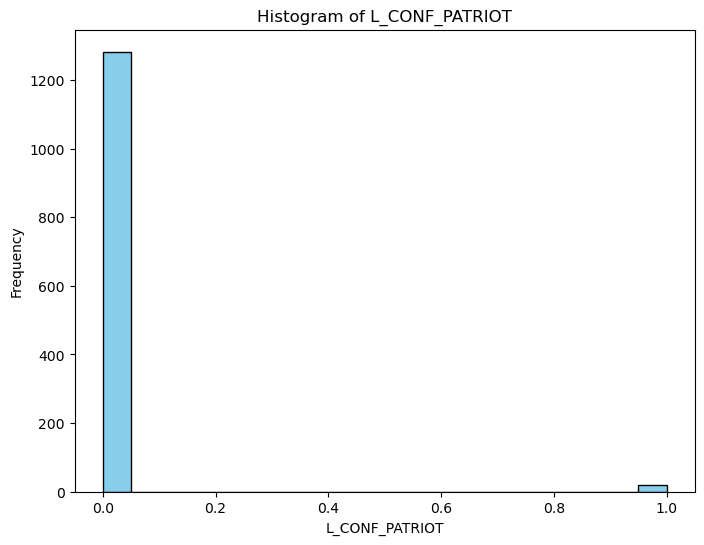

Outliers for L_CONF_PATRIOT :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
45             0                0             0               0    14.758621   
127            0                0             0               0    17.750000   
188            0                0             0               0    17.580645   
216            0                0             0               0    15.586207   
315            0                0             0               0    16.151515   
334            0                0             0               0    19.156250   
397            0                0             0               0    18.838710   
495            0                0             0               0    16.625000   
542            0                0             0               0    17.090909   
626            0                0             1               0    20.875000   
656            0                0             1               0    12.843750   
776      

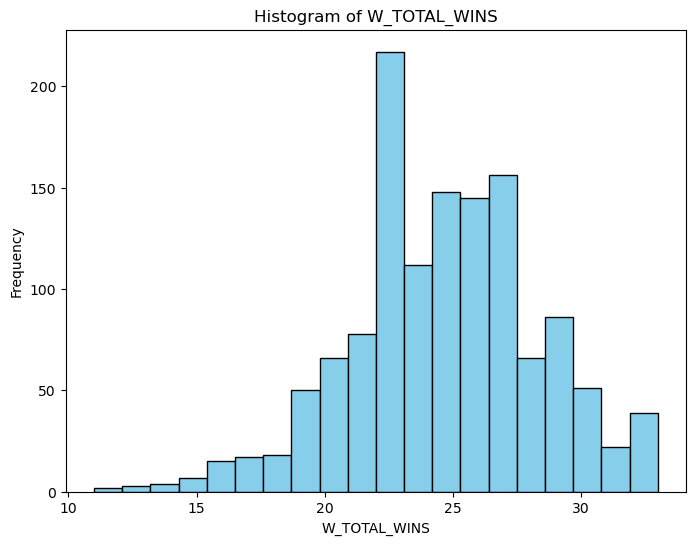

Outliers for W_TOTAL_WINS :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
30             0                0             0               0    18.500000   
127            0                0             0               0    17.750000   
190            0                0             0               0    20.241379   
761            0                0             0               0    17.593750   
906            0                0             0               0    17.032258   
1136           0                0             0               0    25.166667   
1153           0                0             0               0    22.566667   
1158           0                0             0               0    19.130435   
1161           0                0             0               0    23.095238   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
30                 0           0             0                0   
127                0           0    

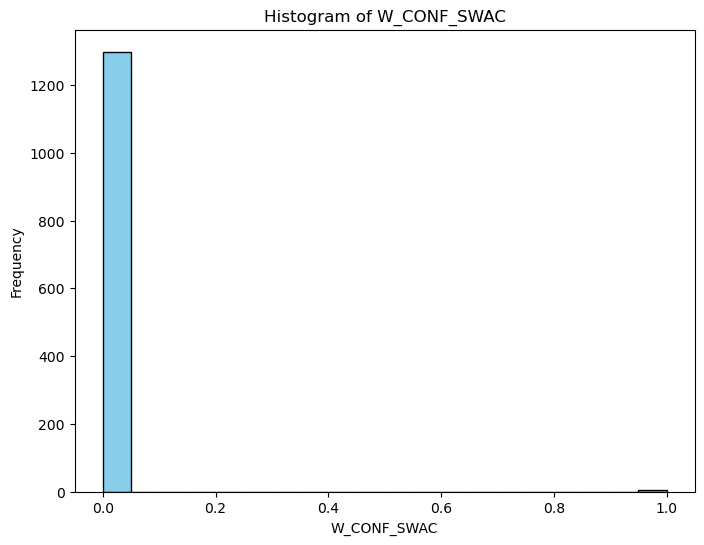

Outliers for W_CONF_SWAC :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
479            0                0             0               0    15.100000   
1039           0                0             0               0    17.967742   
1123           0                0             0               0    19.681818   
1216           0                0             0               0    18.700000   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
479                0           0             0                0   
1039               0           0             0                0   
1123               0           0             0                0   
1216               0           0             0                0   

      L_CONF_BIG_SKY  L_AST_STDDEV  L_CONF_BIG_WEST  L_CONF_PATRIOT  \
479                0      4.063292                0               0   
1039               0      4.099567                0               0   
1123               0  

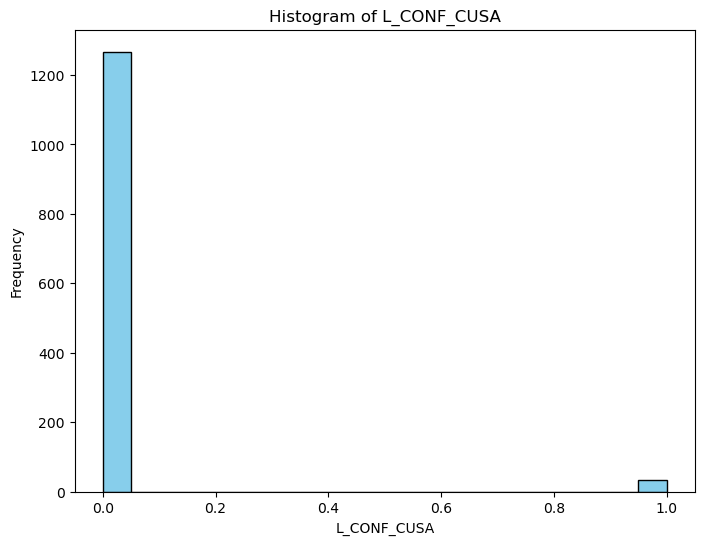

Outliers for L_CONF_CUSA :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
2              0                0             0               0    23.400000   
34             0                0             0               0    15.250000   
54             0                0             0               0    20.068966   
55             0                0             0               0    19.500000   
67             0                0             0               0    18.800000   
73             0                0             1               0    23.482759   
85             0                0             0               0    14.066667   
101            0                0             0               0    24.214286   
103            0                0             0               0    22.689655   
119            0                0             0               0    19.620690   
131            0                0             0               0    23.903226   
154         

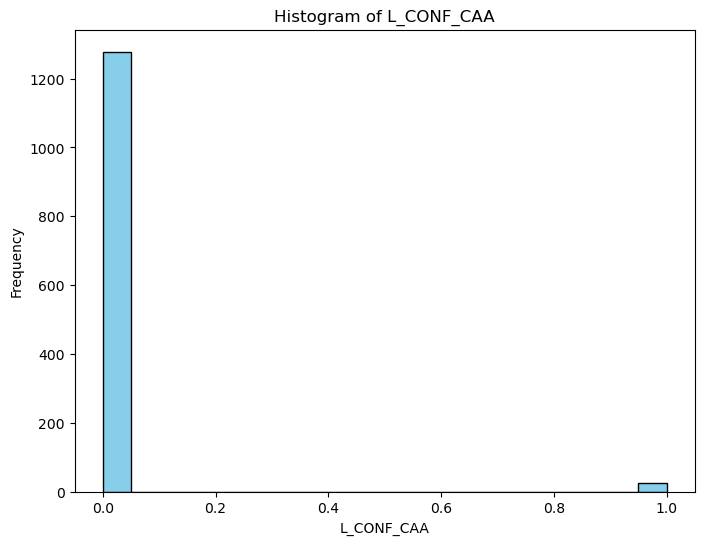

Outliers for L_CONF_CAA :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
25             0                0             0               0    18.400000   
107            0                0             0               0    17.000000   
171            0                0             0               0    18.218750   
200            0                0             1               0    19.281250   
250            0                0             0               0    16.866667   
298            0                0             0               0    20.562500   
313            0                0             0               0    17.272727   
331            0                0             0               0    17.393939   
394            0                0             0               0    17.757576   
473            0                0             0               0    14.617647   
519            0                0             0               0    16.937500   
553          

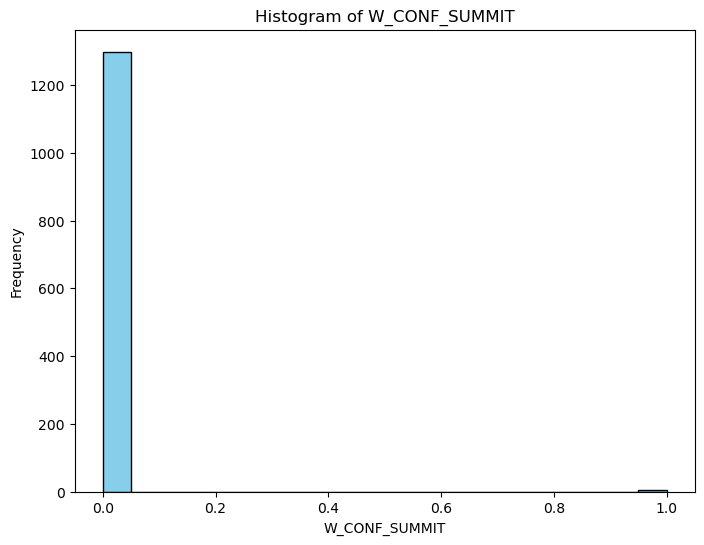

Outliers for W_CONF_SUMMIT :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
766            0                0             0               0    22.562500   
1058           0                0             0               0    20.100000   
1153           0                0             0               0    22.566667   
1158           0                0             0               0    19.130435   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
766                0           0             0                0   
1058               0           0             0                0   
1153               0           0             0                0   
1158               0           0             0                0   

      L_CONF_BIG_SKY  L_AST_STDDEV  L_CONF_BIG_WEST  L_CONF_PATRIOT  \
766                0      3.832033                0               0   
1058               0      4.717417                0               0   
1153               0

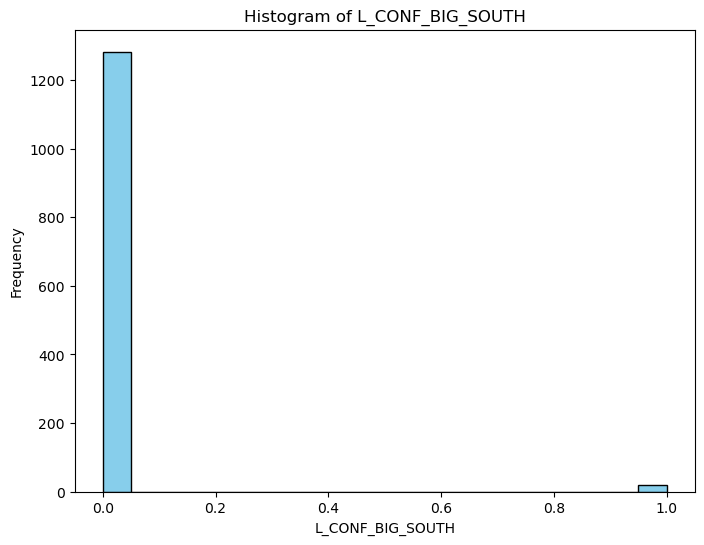

Outliers for L_CONF_BIG_SOUTH :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
31             0                0             0               0    18.000000   
110            0                0             1               0    19.838710   
141            0                0             0               0    18.655172   
254            0                0             0               0    21.678571   
297            0                0             0               0    22.500000   
332            0                0             0               0    17.000000   
414            0                0             0               0    13.689655   
479            0                0             0               0    15.100000   
561            0                0             0               0    14.758621   
594            0                0             0               0    18.400000   
694            0                0             0               0    18.468750   
727    

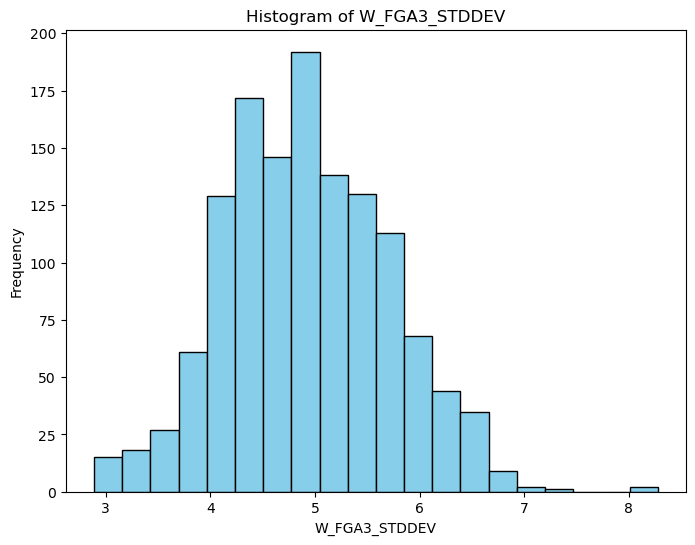

Outliers for W_FGA3_STDDEV :
       W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  L_FGA3_MEAN  \
39             0                0             0               0    23.000000   
200            0                0             1               0    19.281250   
1102           0                0             0               0    19.636364   
1259           0                0             0               0    20.727273   
1268           0                0             0               0    21.034483   

      L_CONF_HORIZON  L_CONF_AEC  W_CONF_A_SUN  W_CONF_BIG_WEST  \
39                 0           0             0                0   
200                0           0             0                0   
1102               0           0             0                0   
1259               0           0             0                0   
1268               0           0             0                0   

      L_CONF_BIG_SKY  L_AST_STDDEV  L_CONF_BIG_WEST  L_CONF_PATRIOT  \
39             

In [55]:
# Univariate analysis for numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    # Visualization using histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Check for outliers (you can define your own criterion for outliers detection)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print("Outliers for", col, ":\n", outliers)
    else:
        print("No outliers for", col)

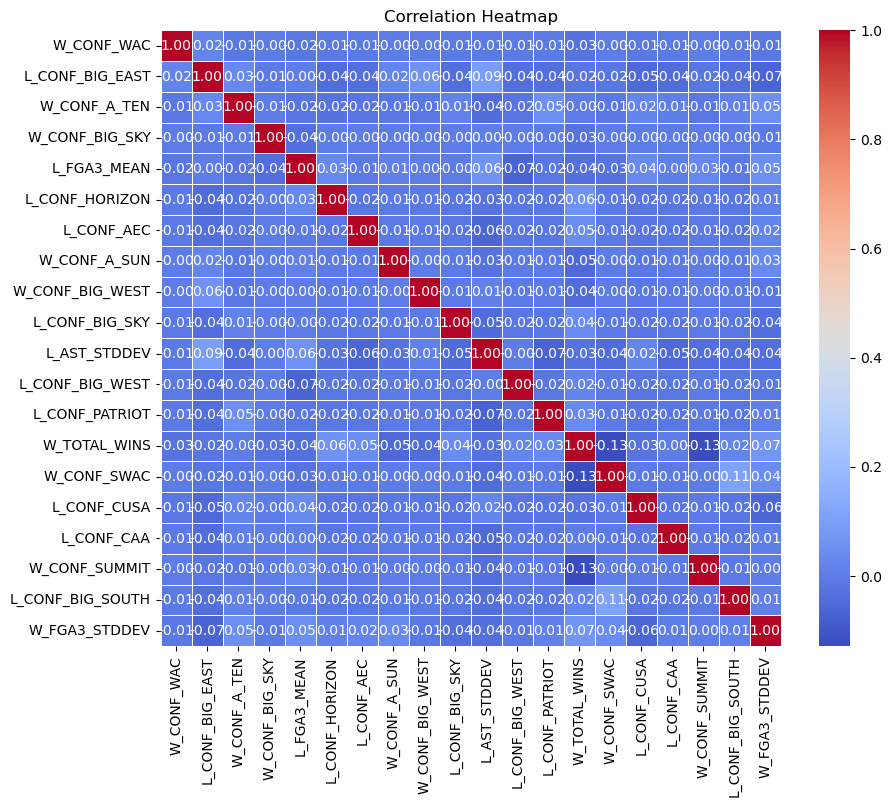

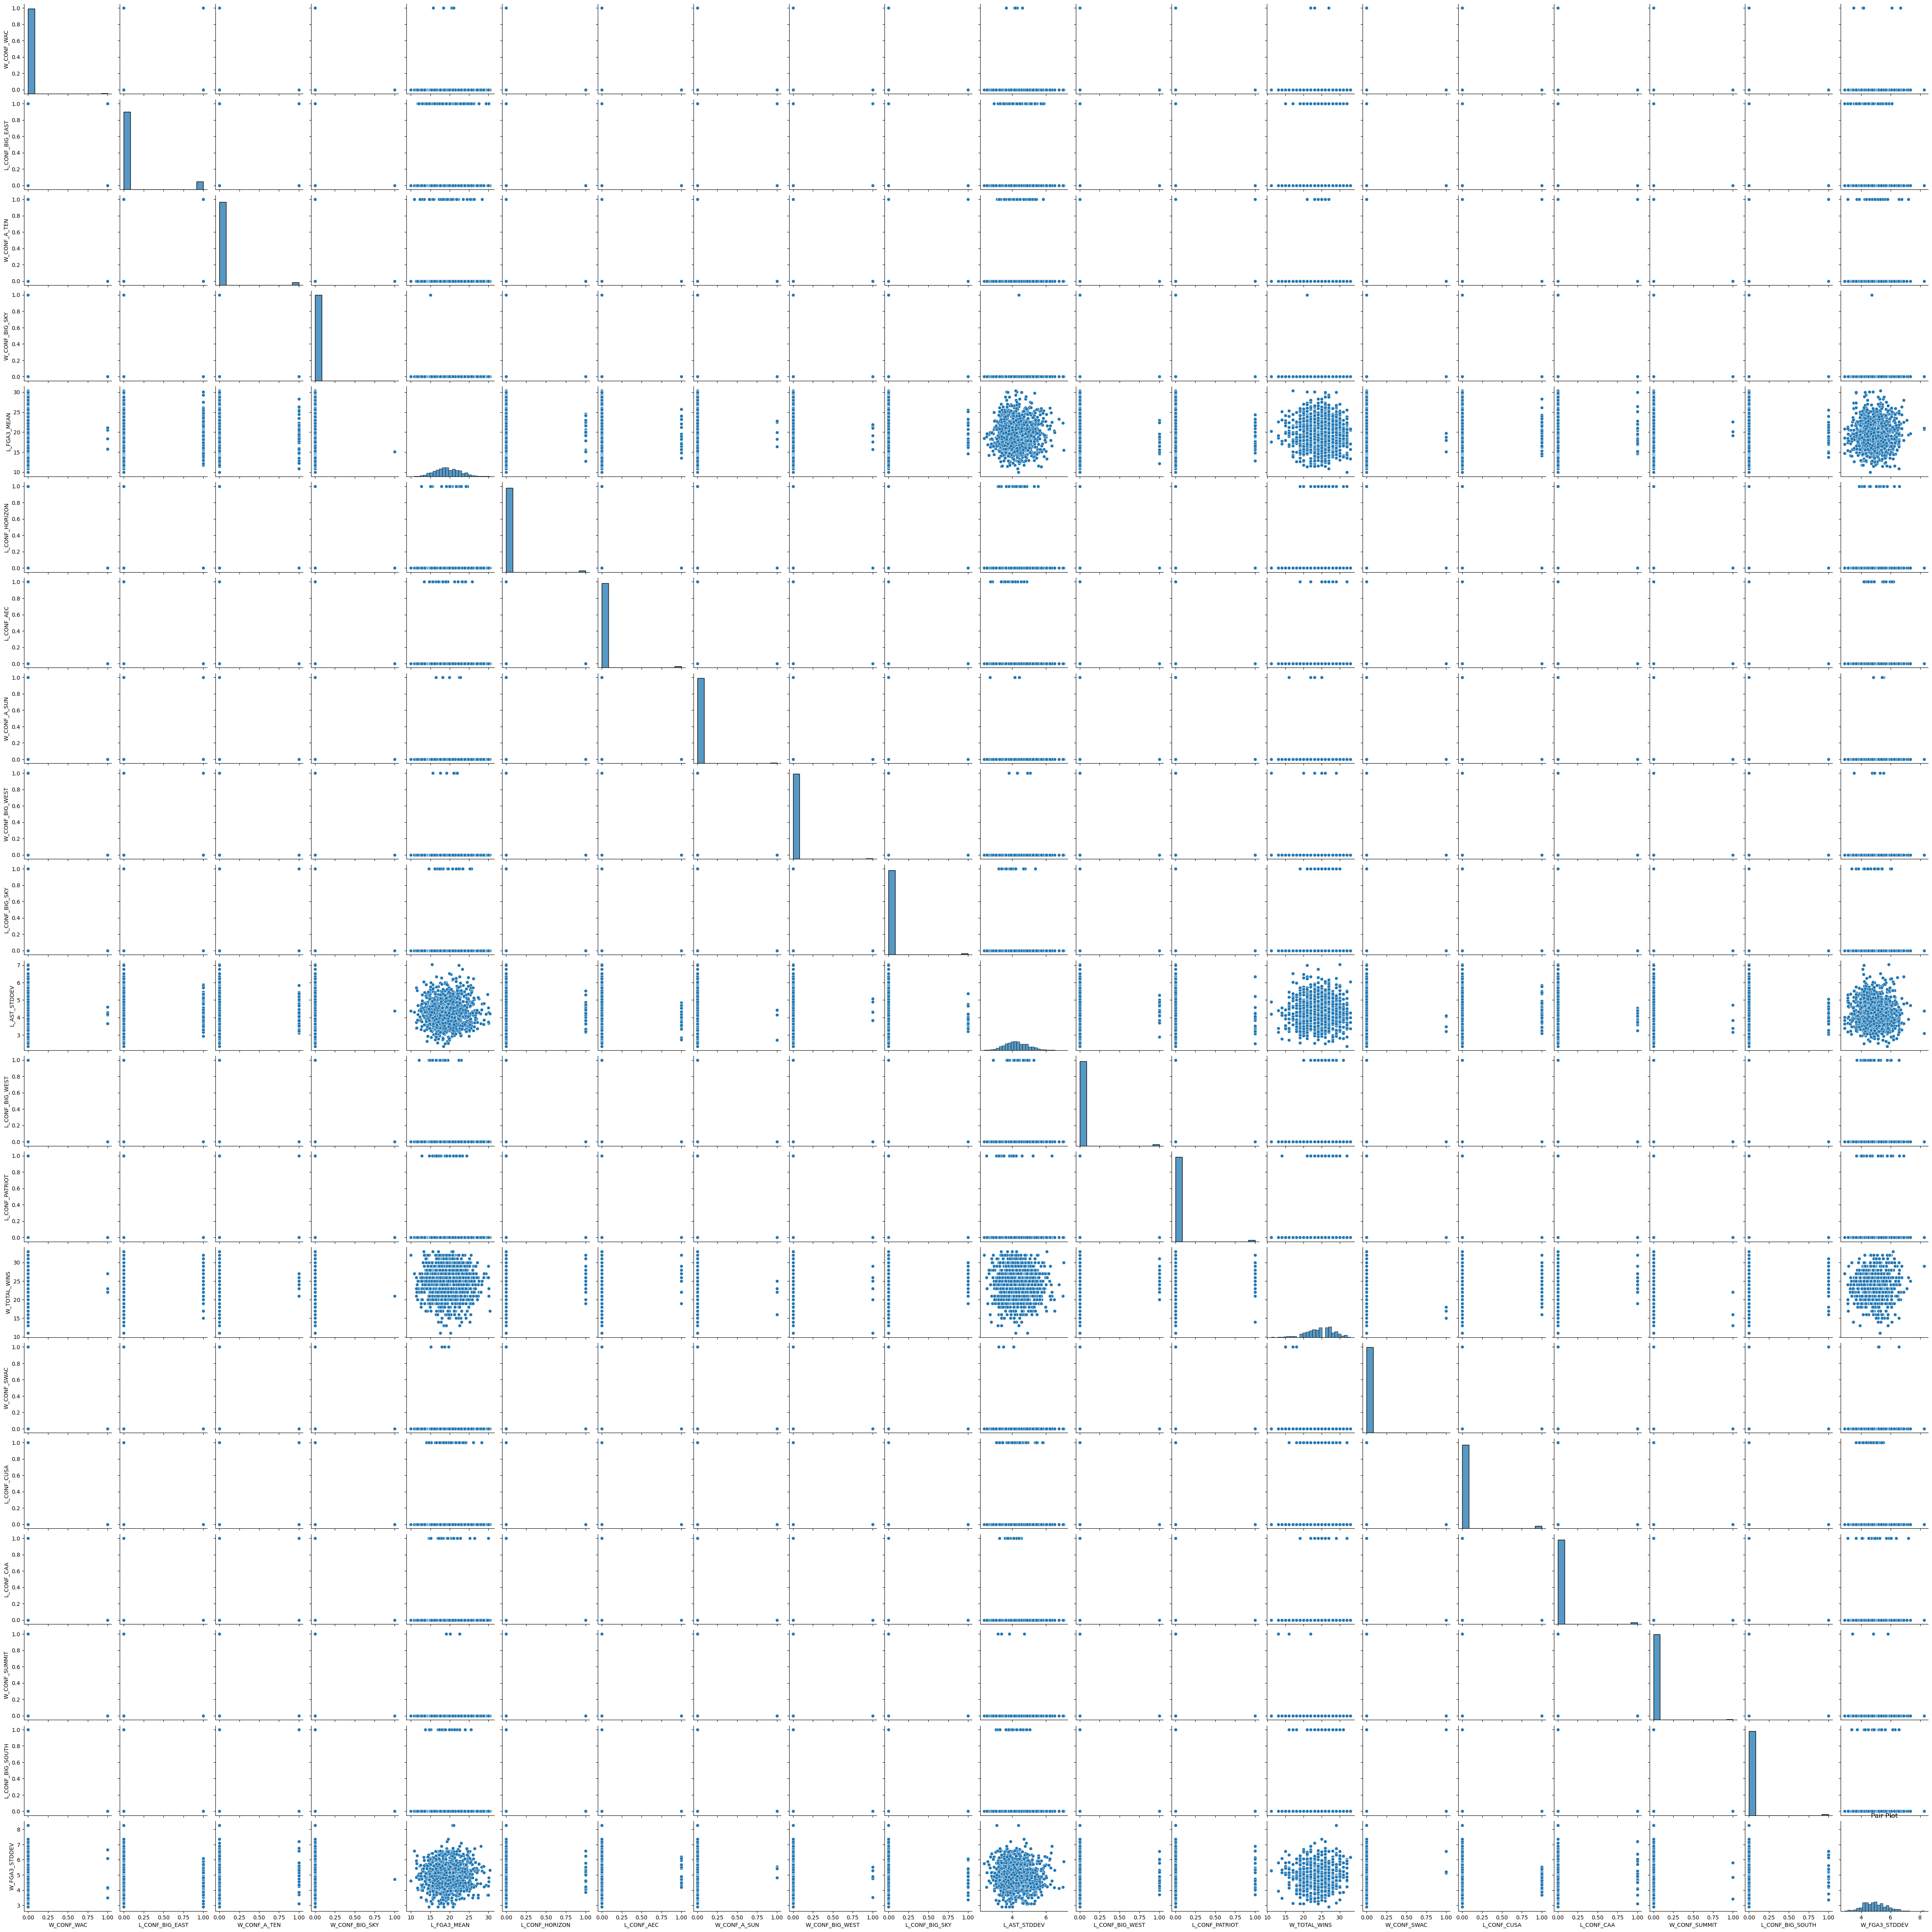

In [56]:
# Multivariate analysis - Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Multivariate analysis - Pair plot
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

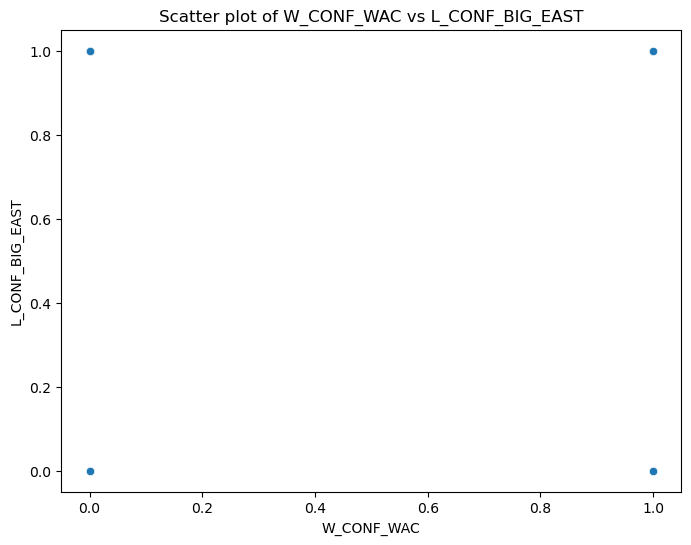

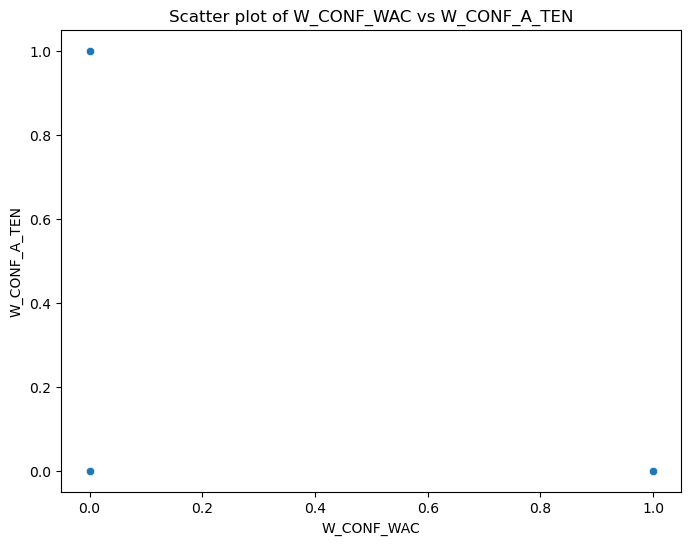

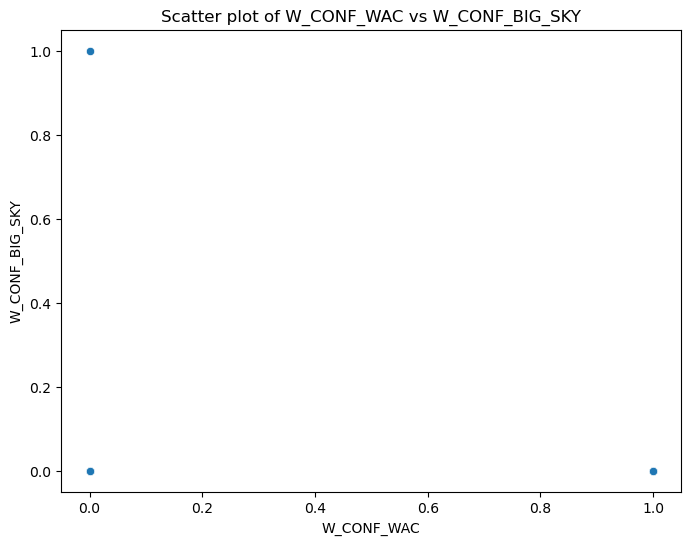

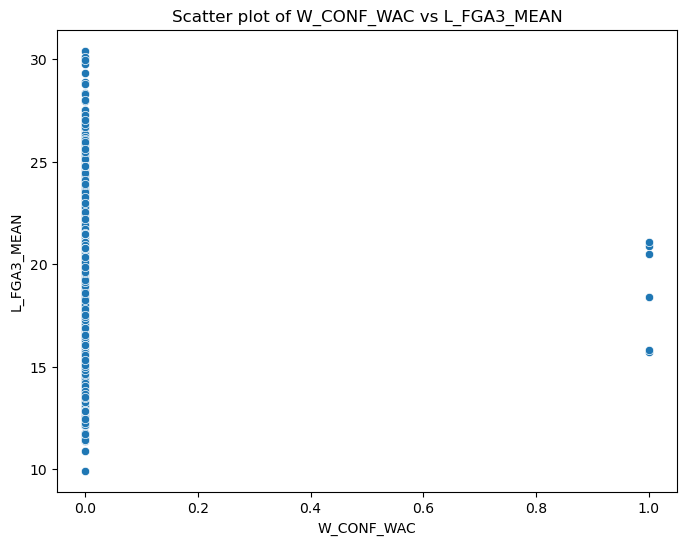

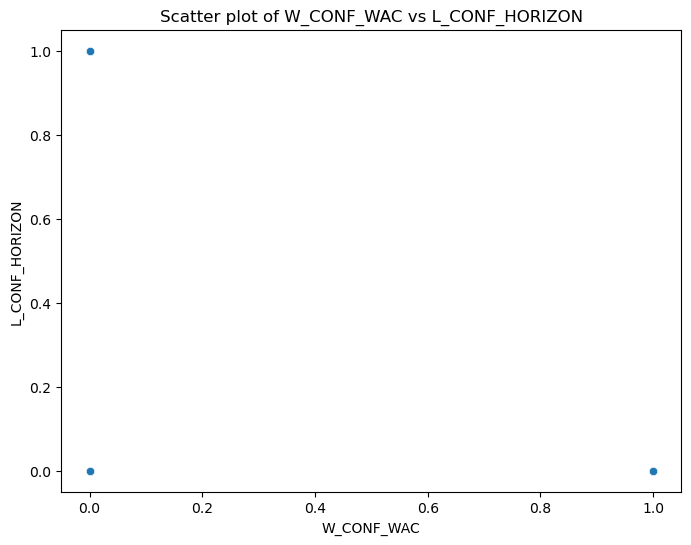

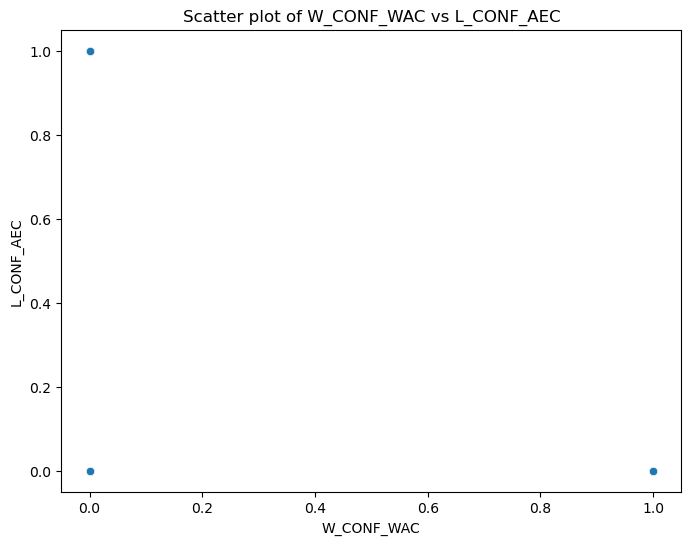

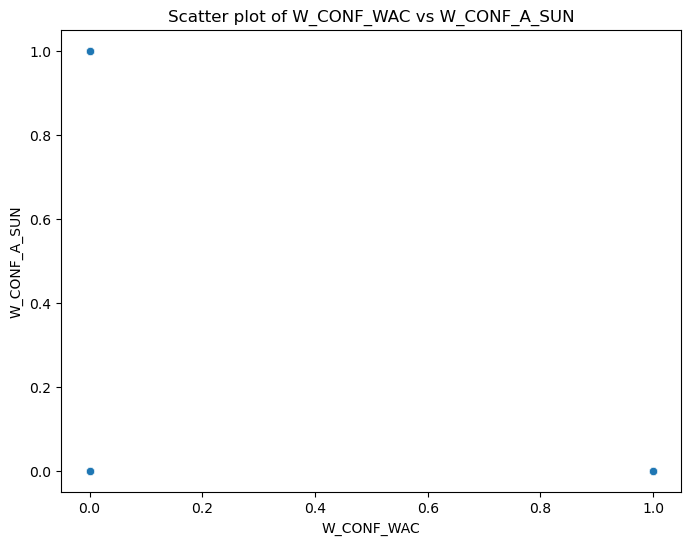

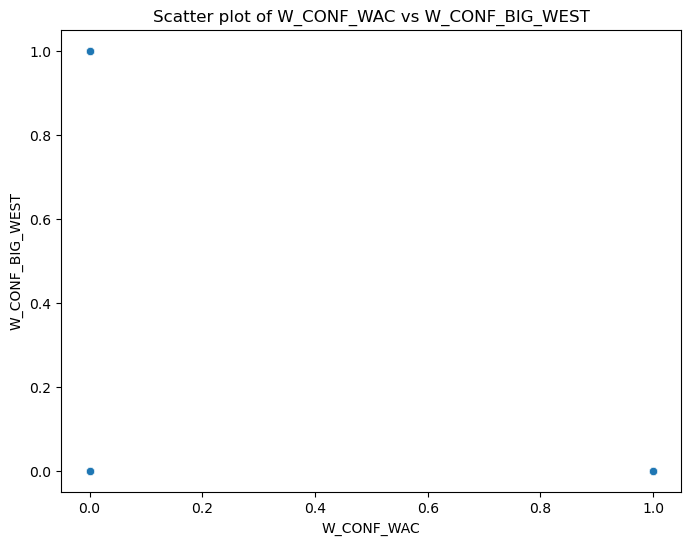

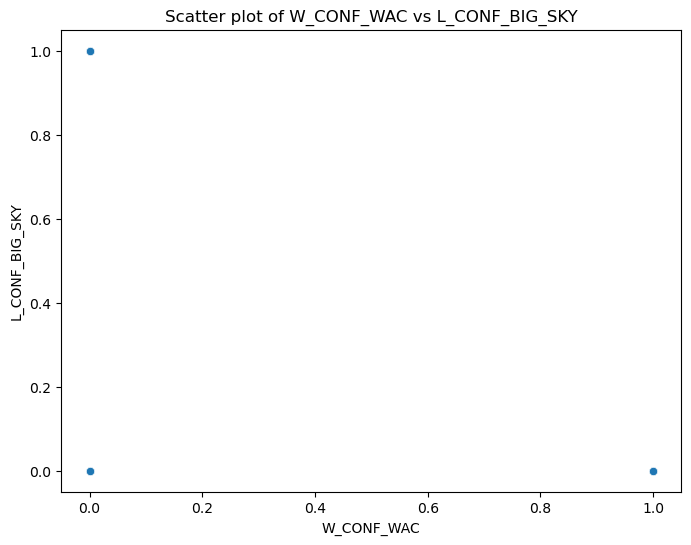

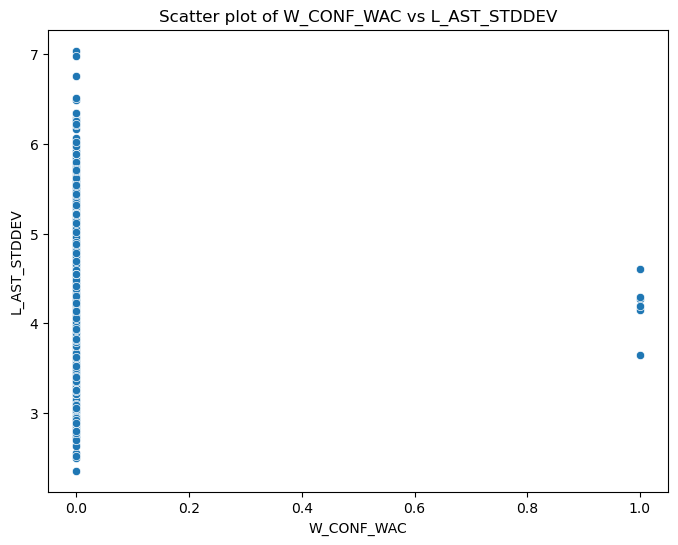

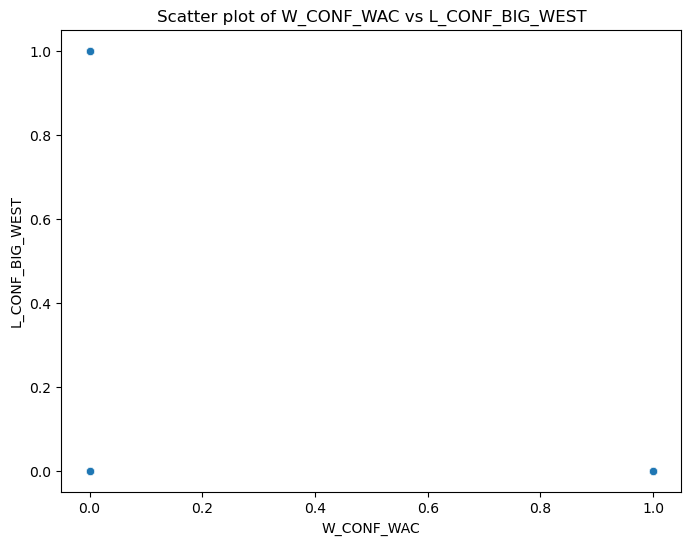

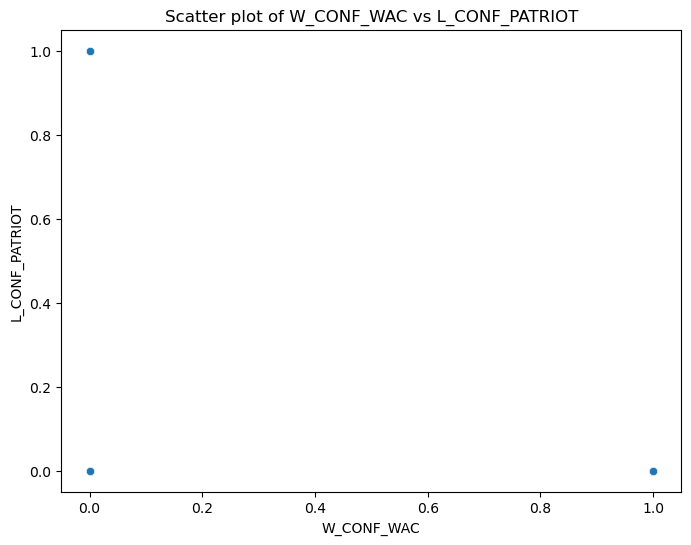

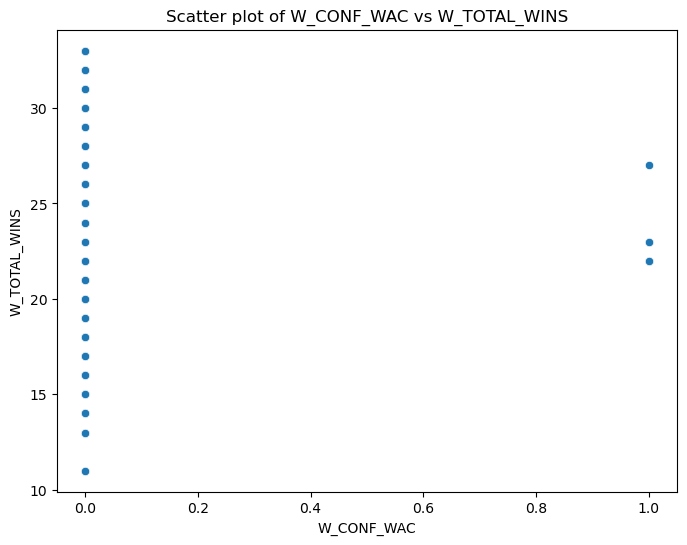

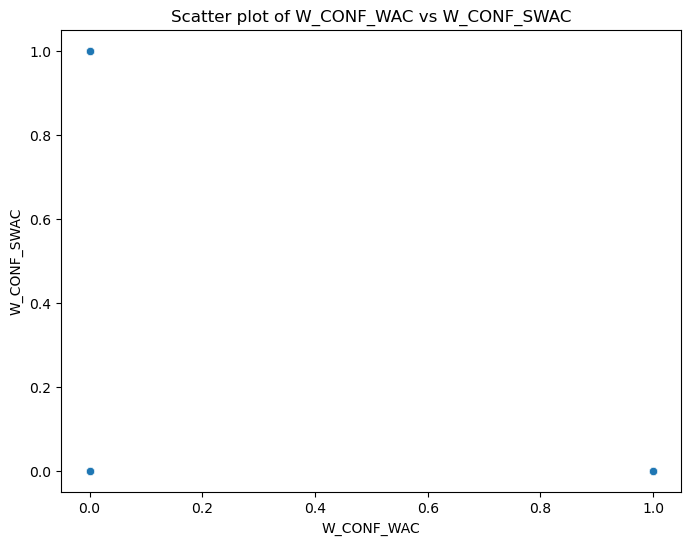

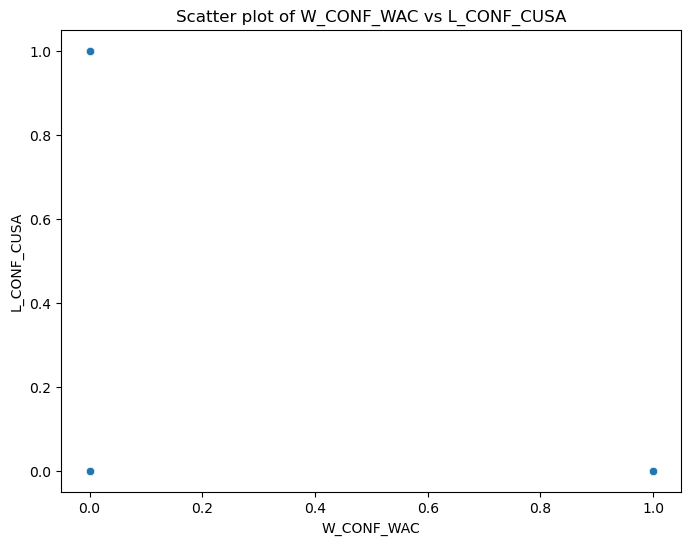

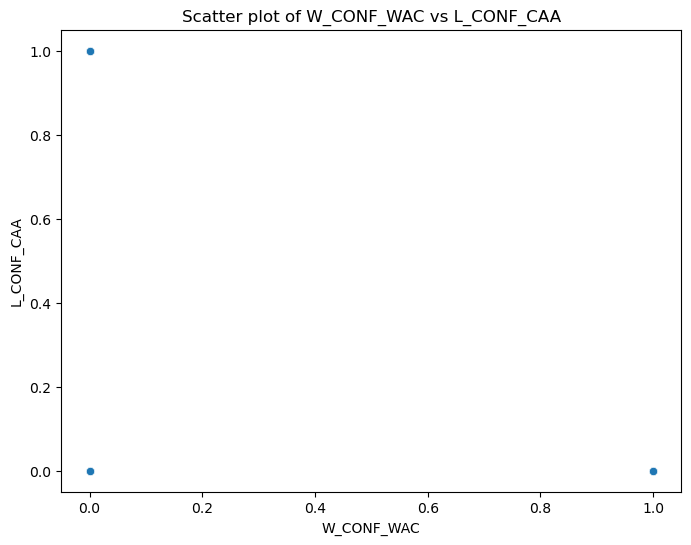

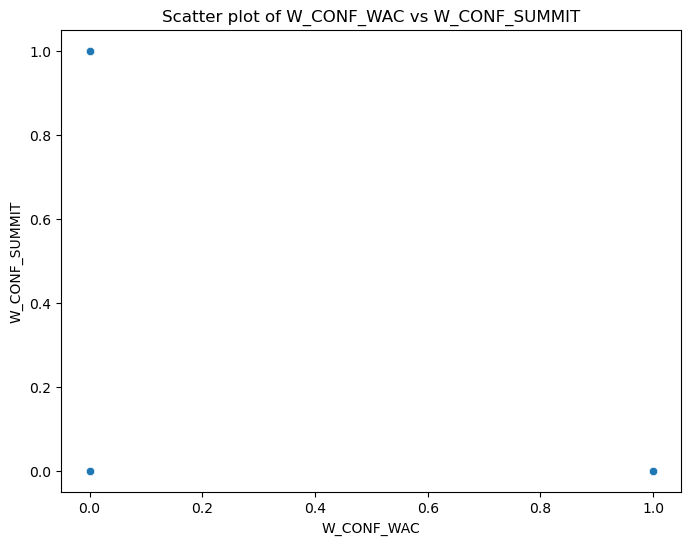

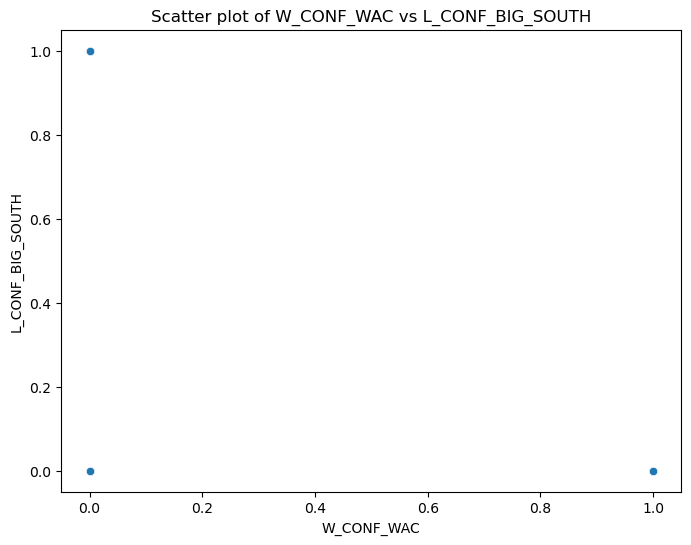

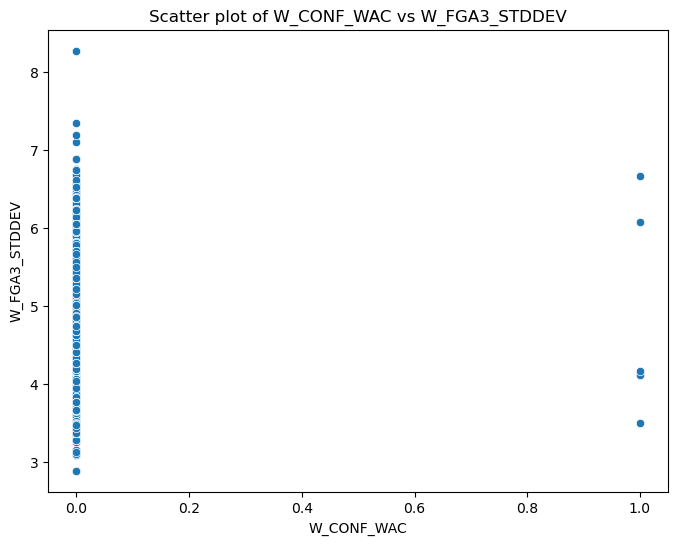

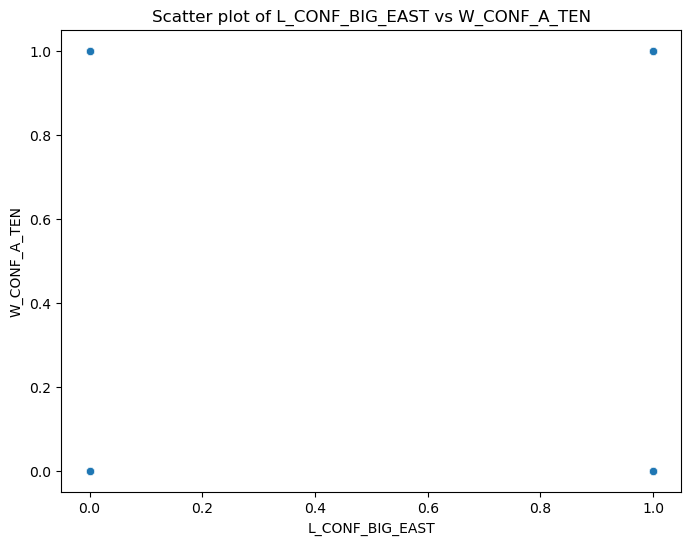

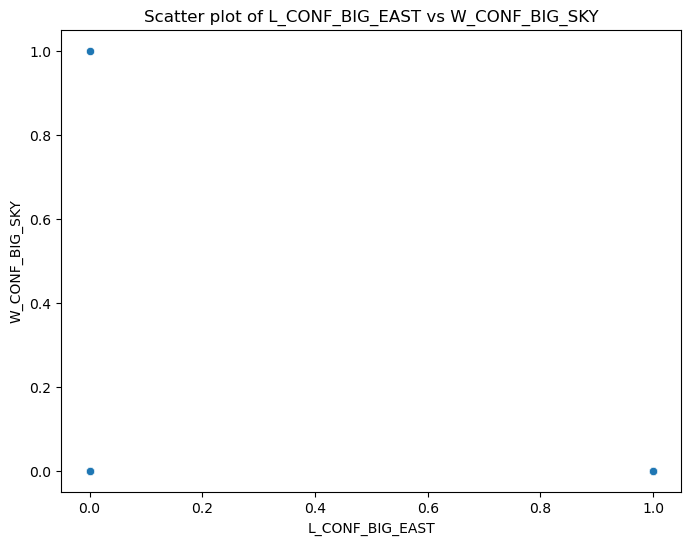

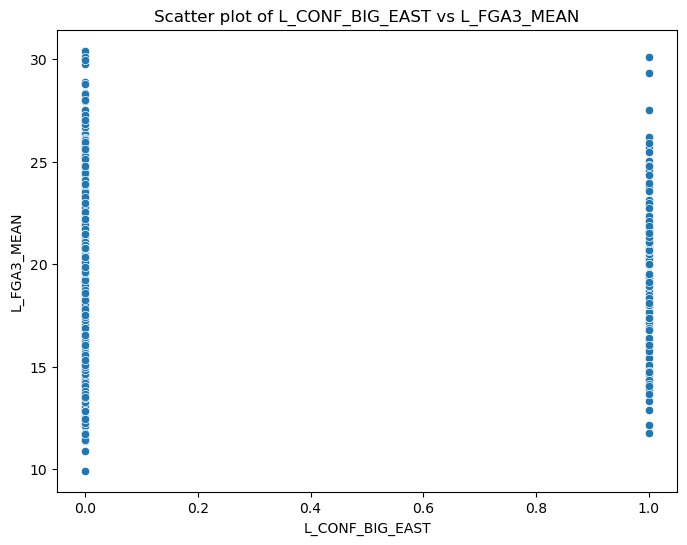

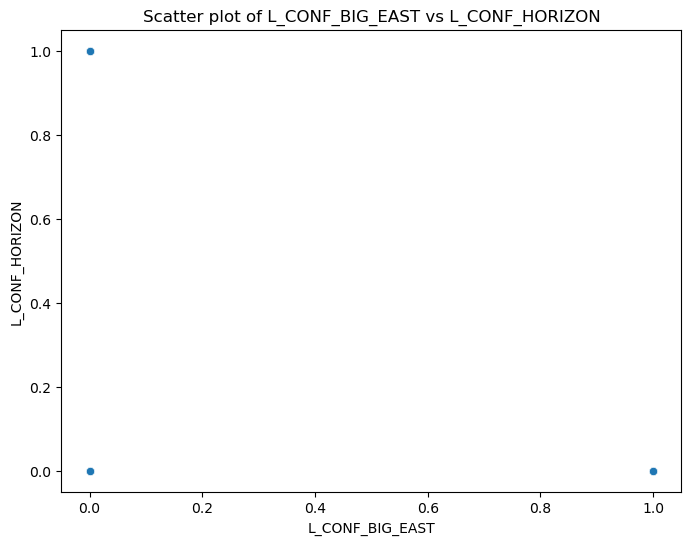

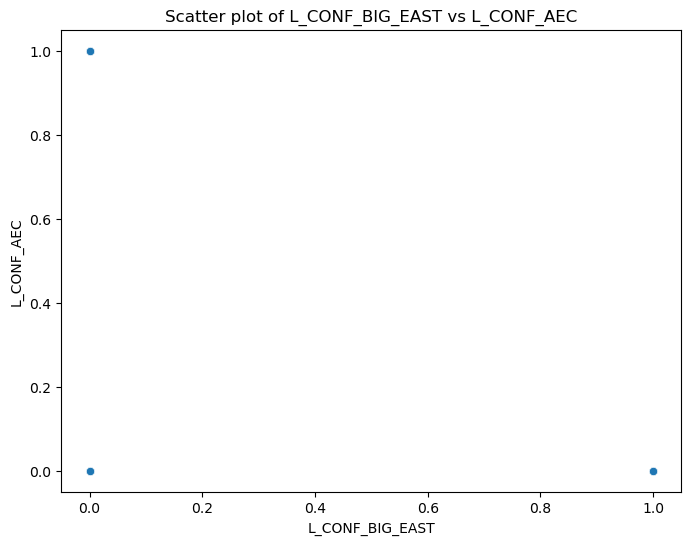

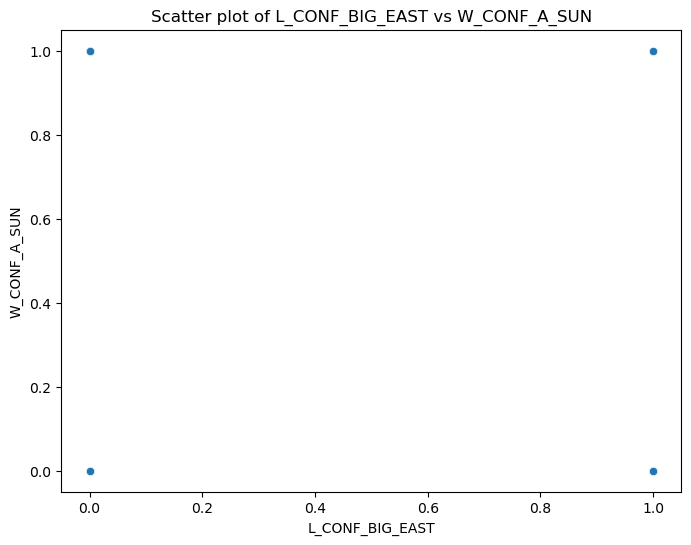

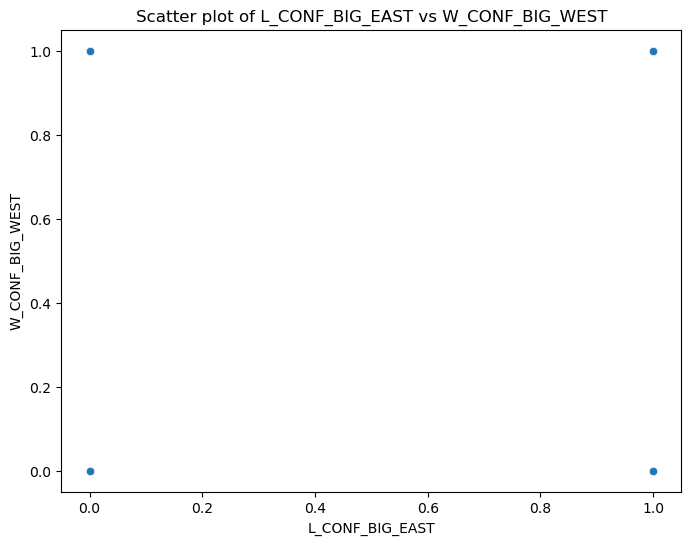

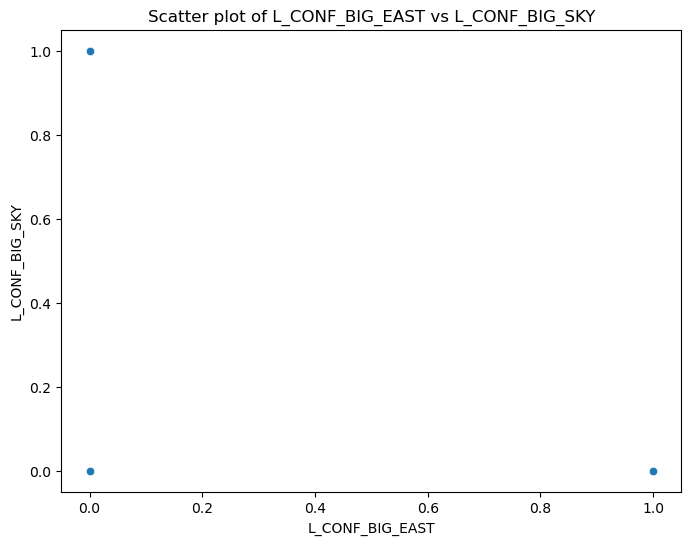

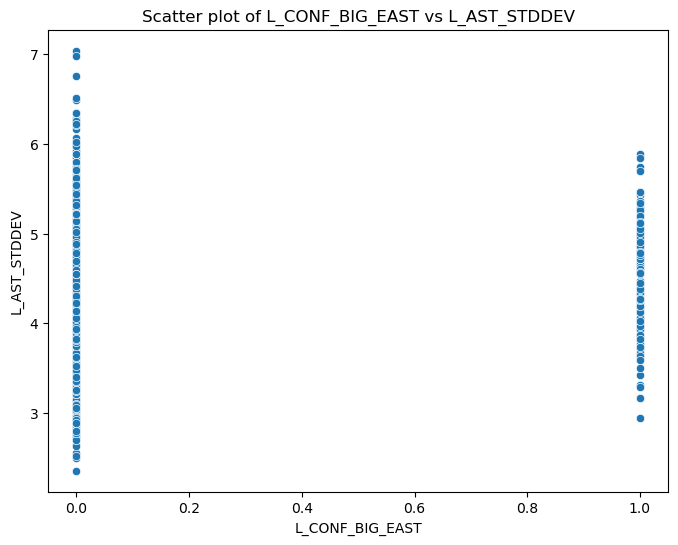

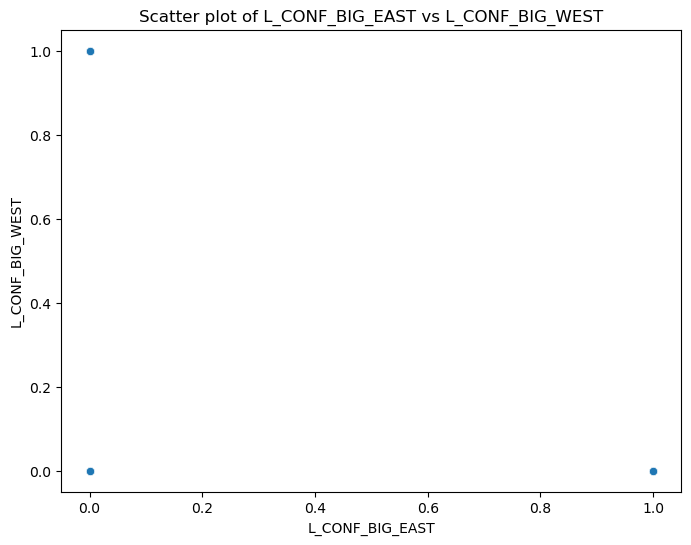

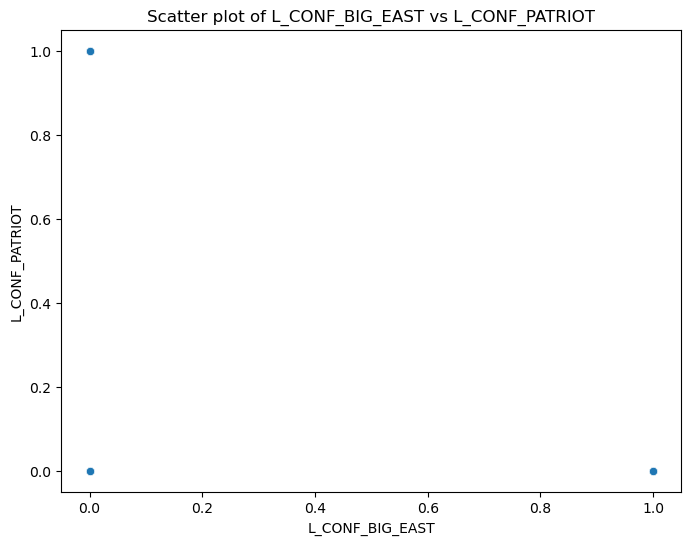

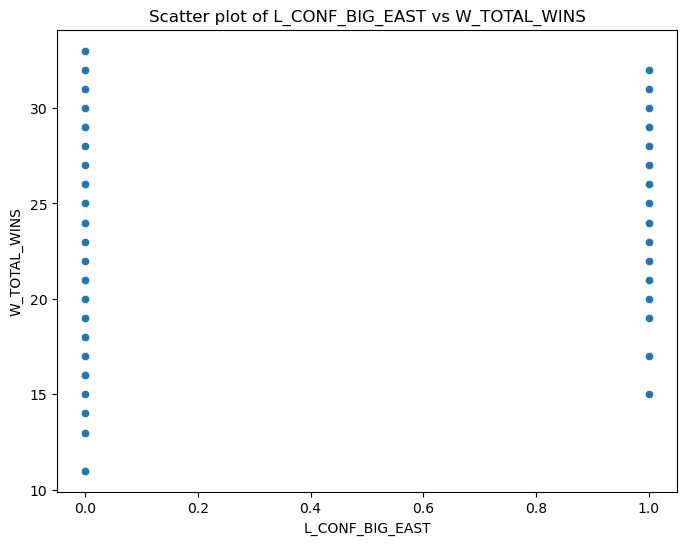

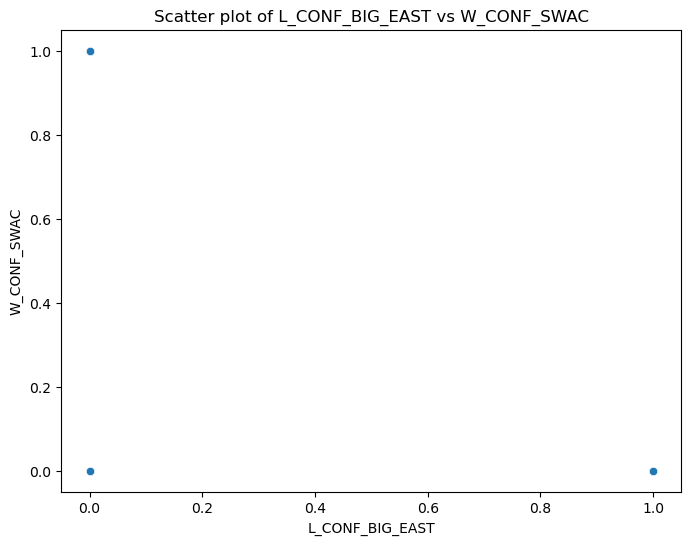

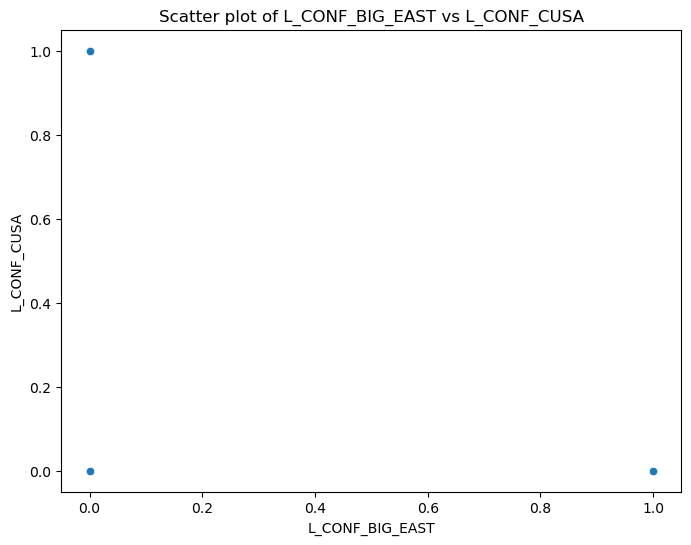

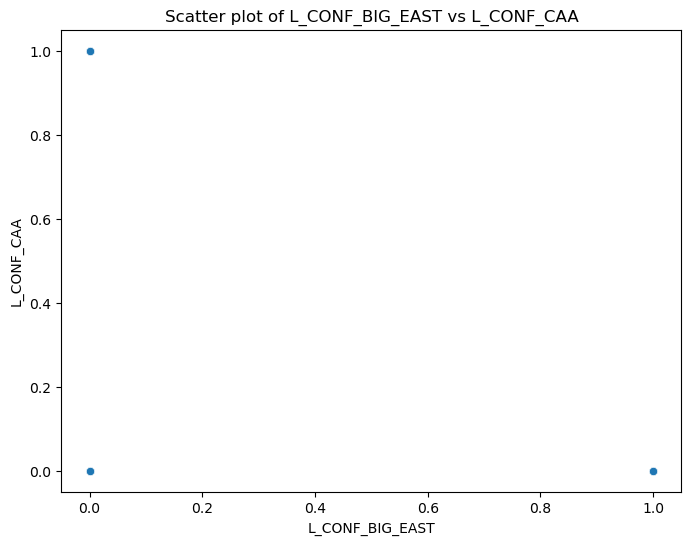

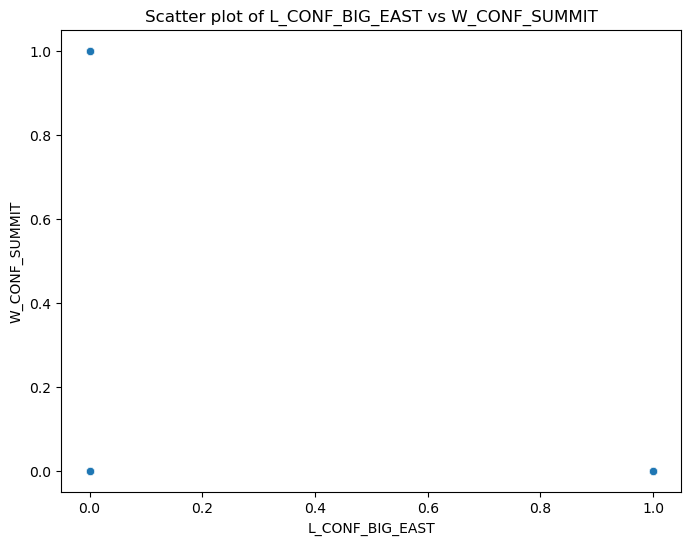

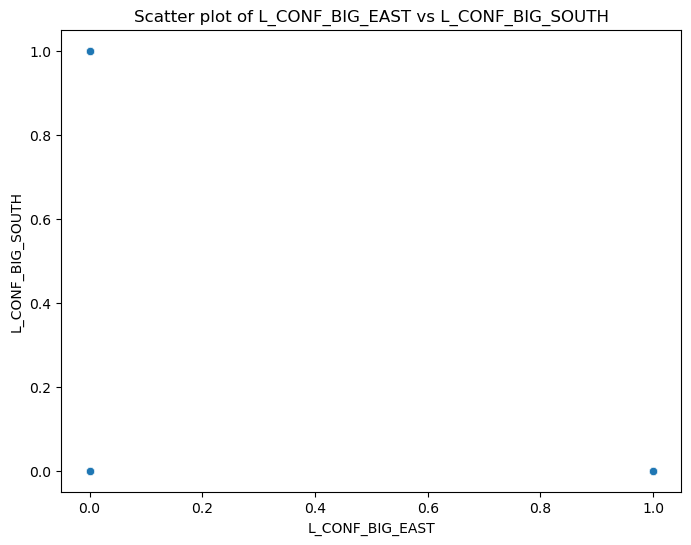

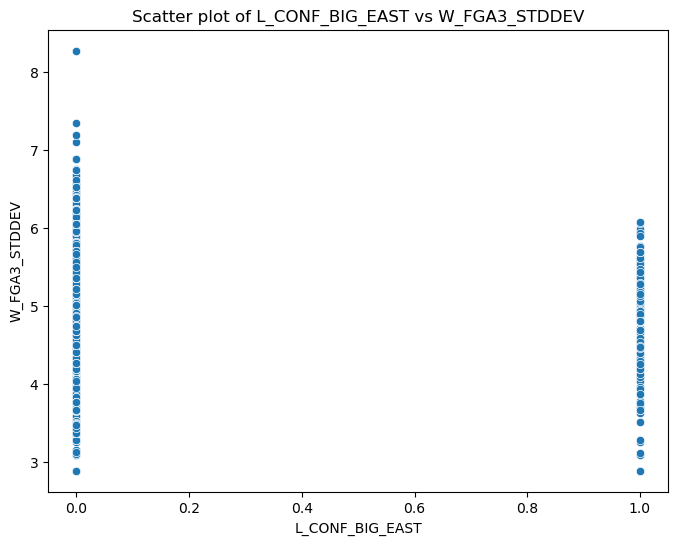

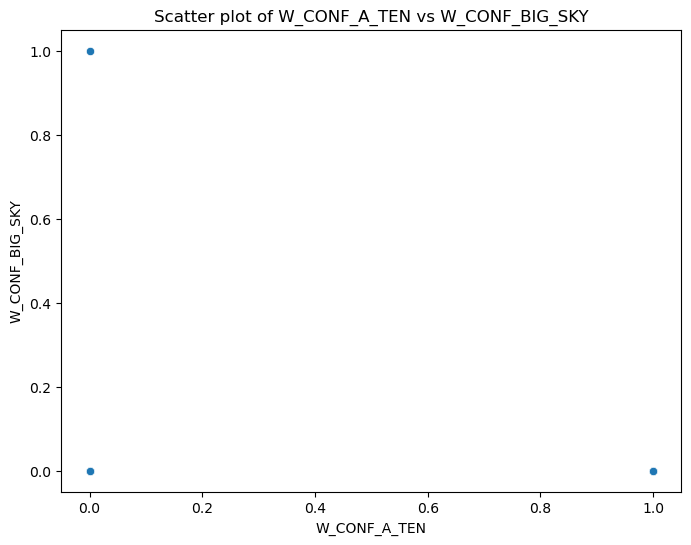

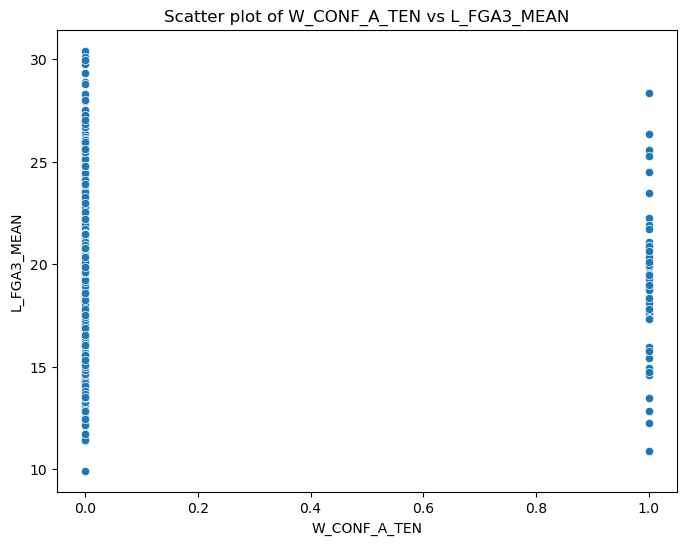

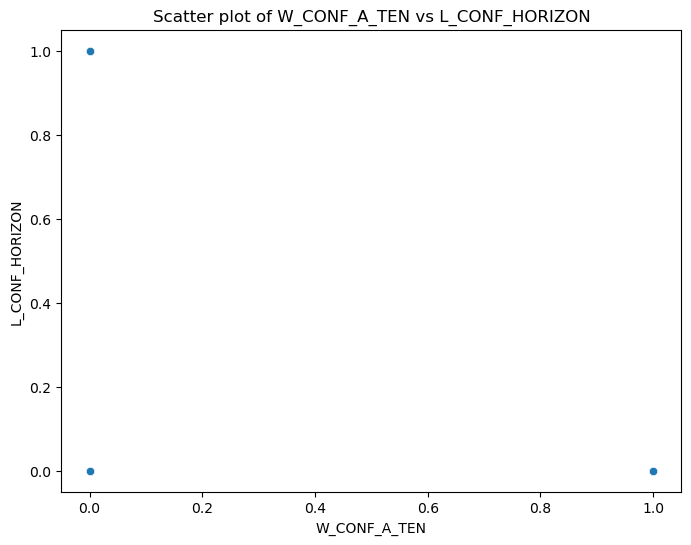

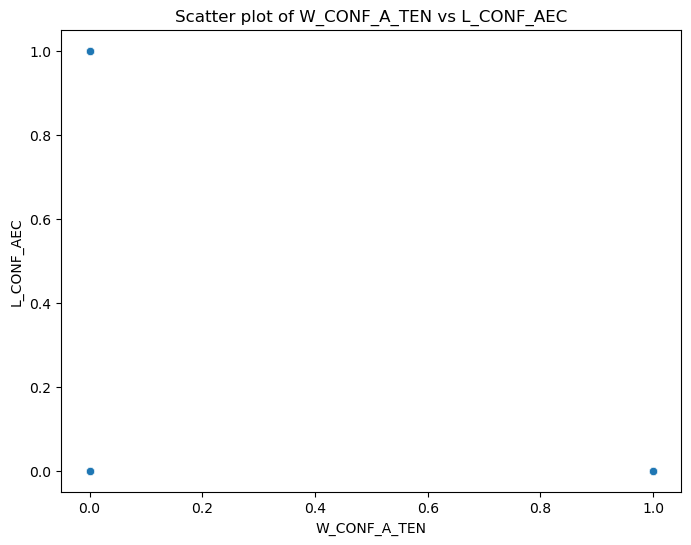

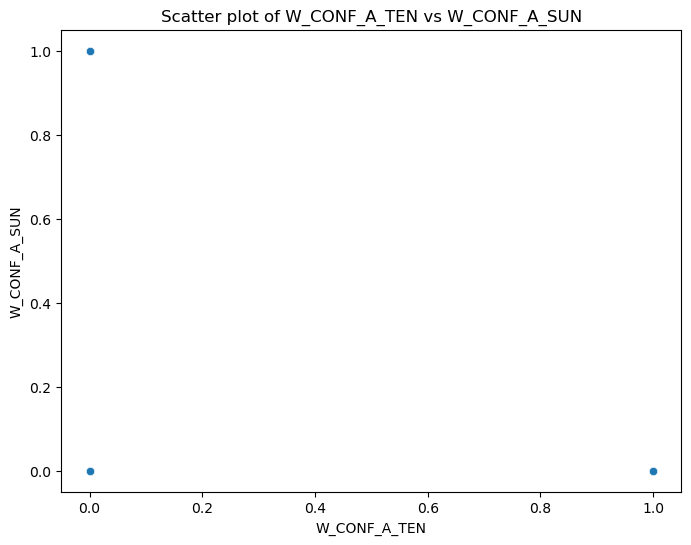

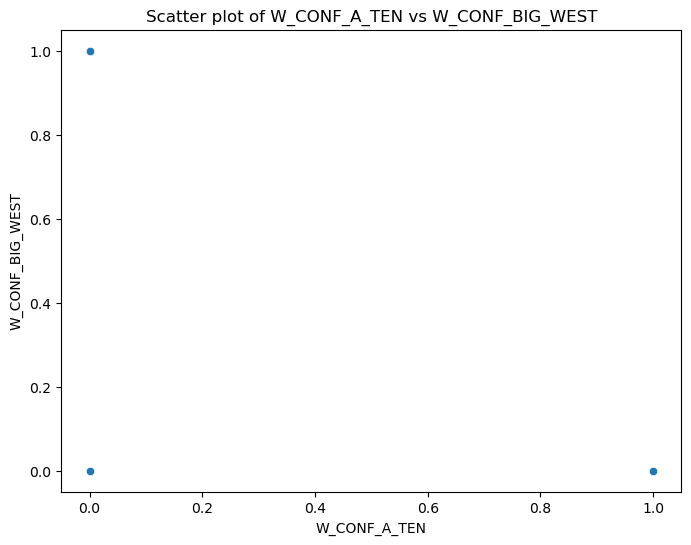

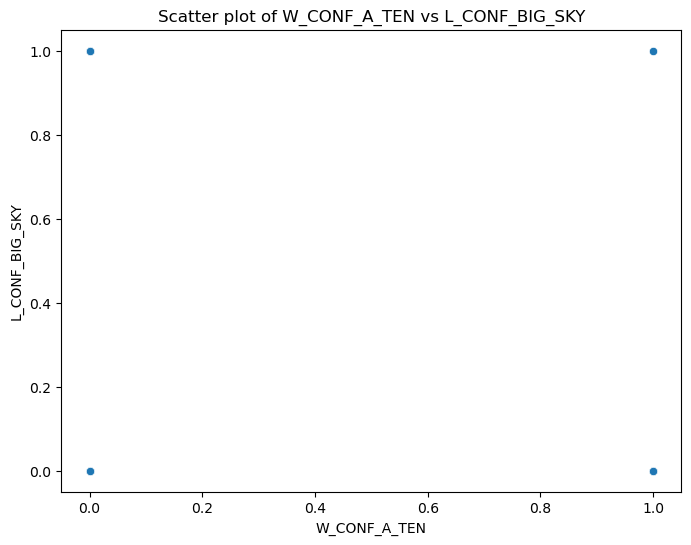

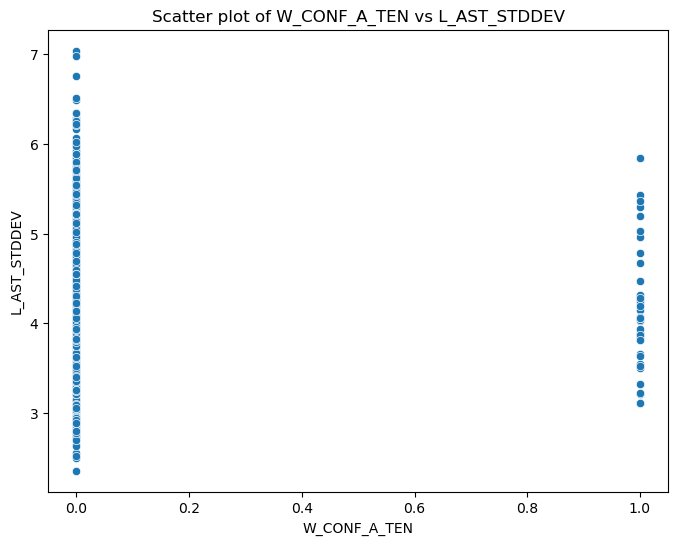

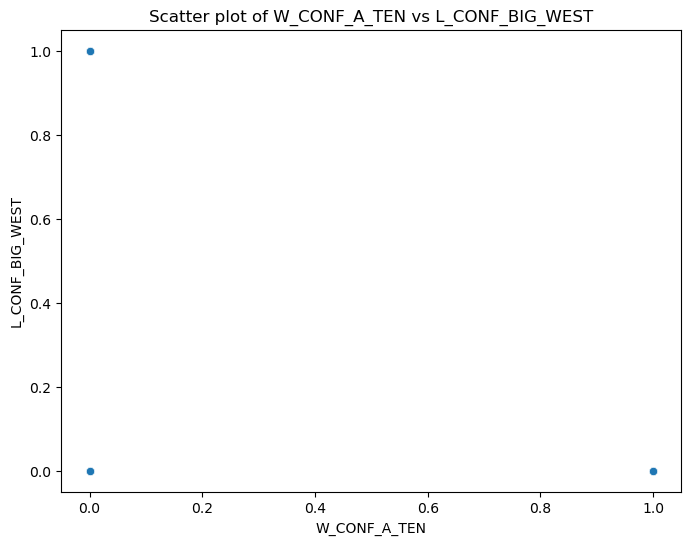

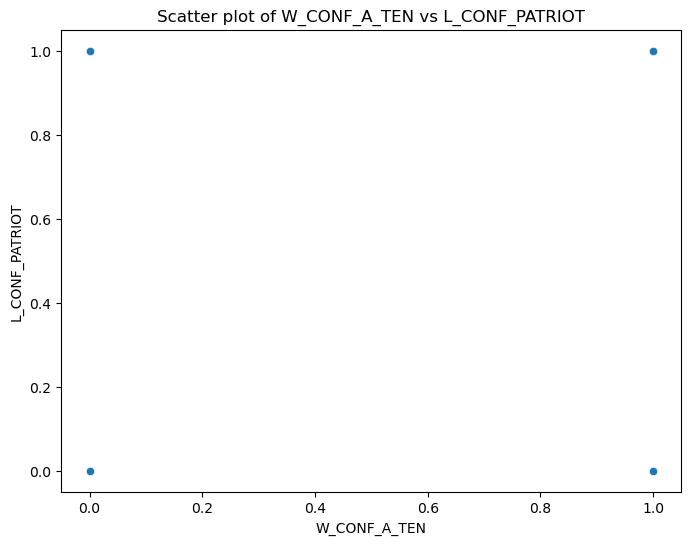

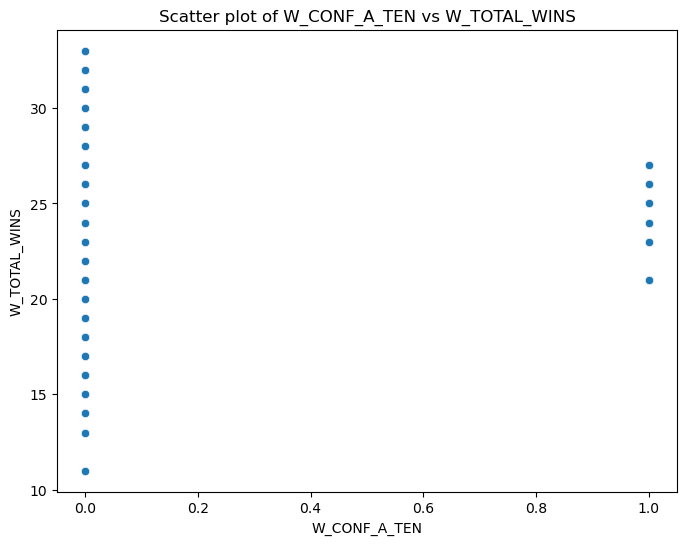

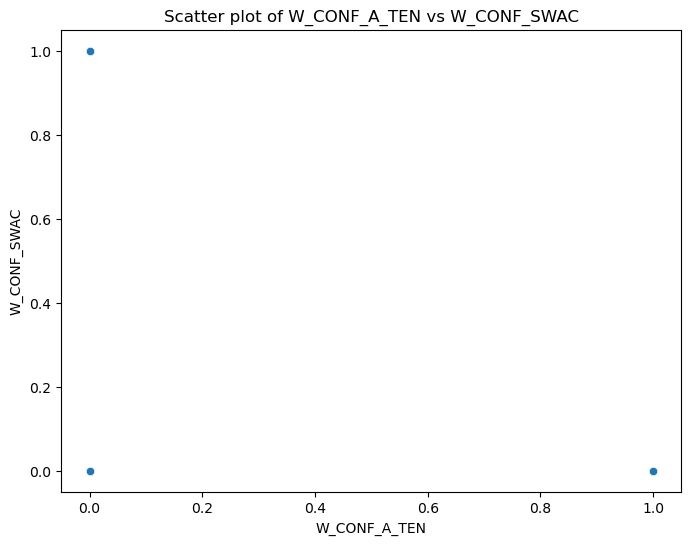

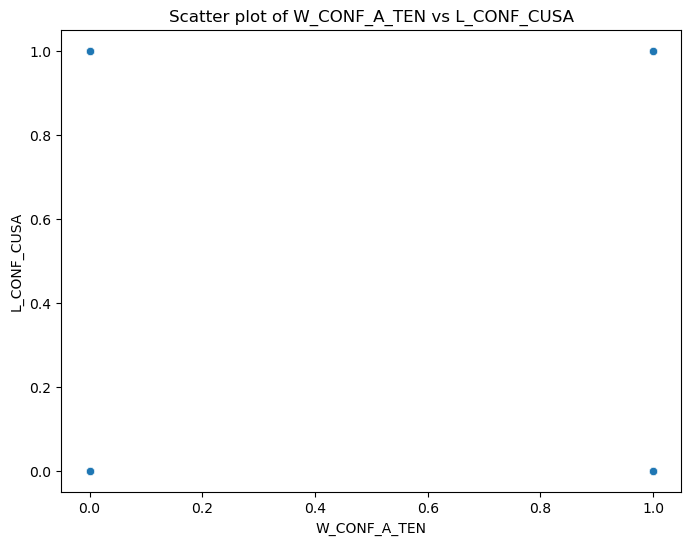

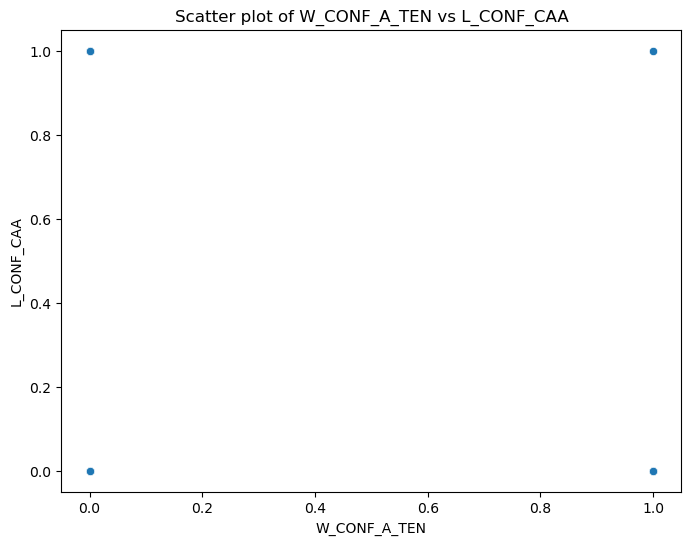

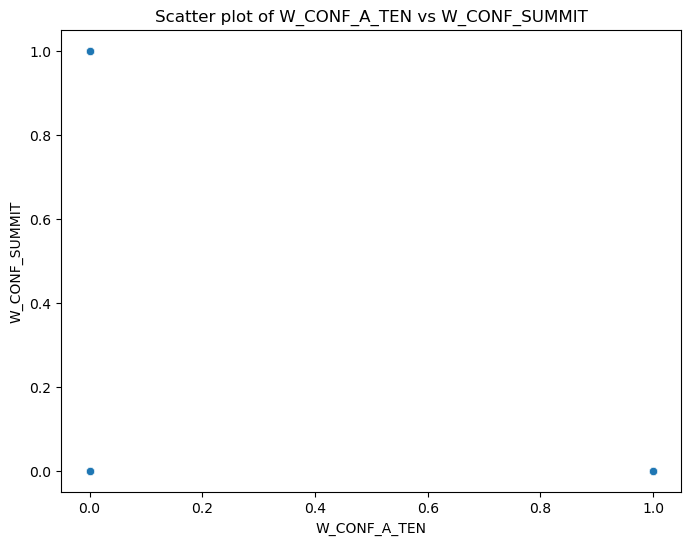

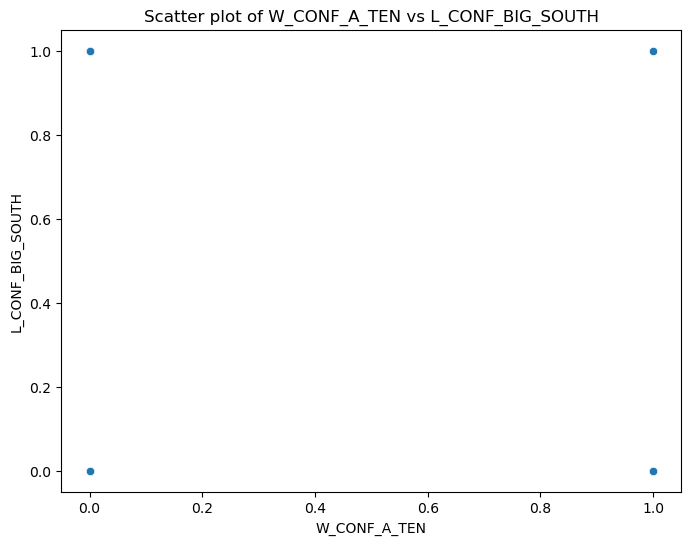

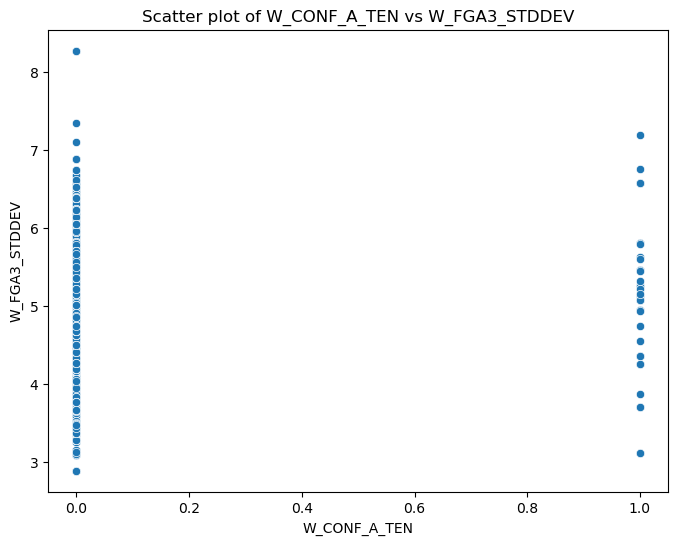

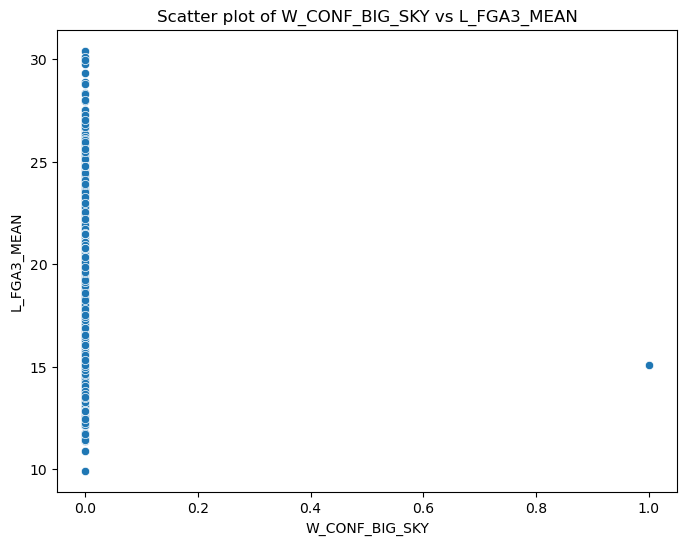

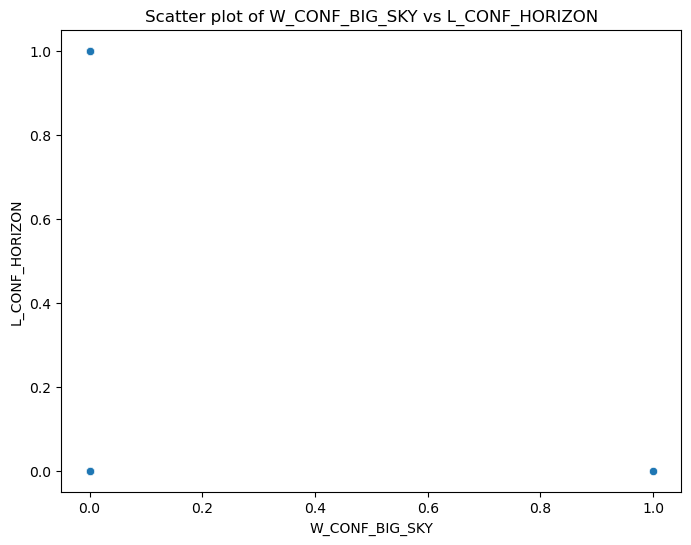

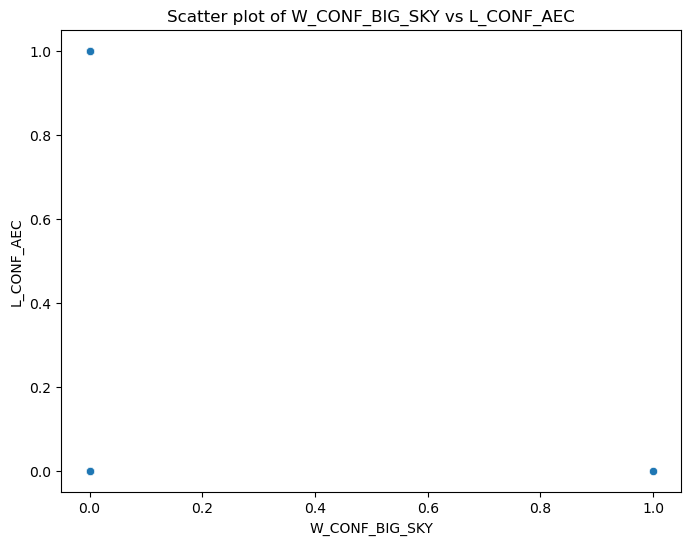

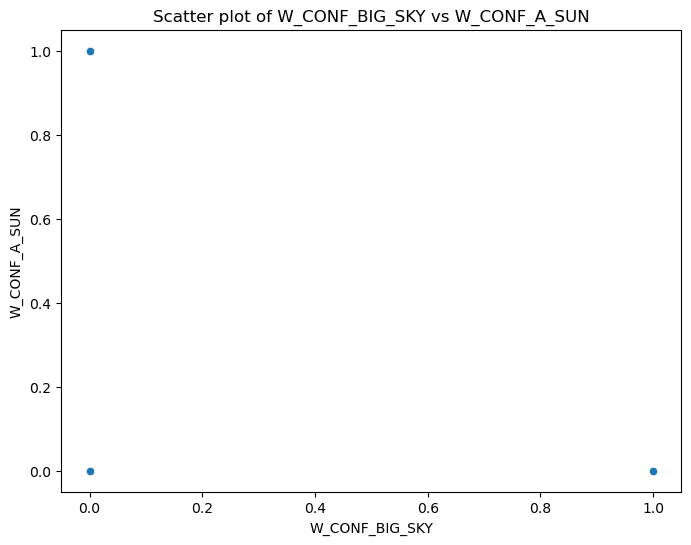

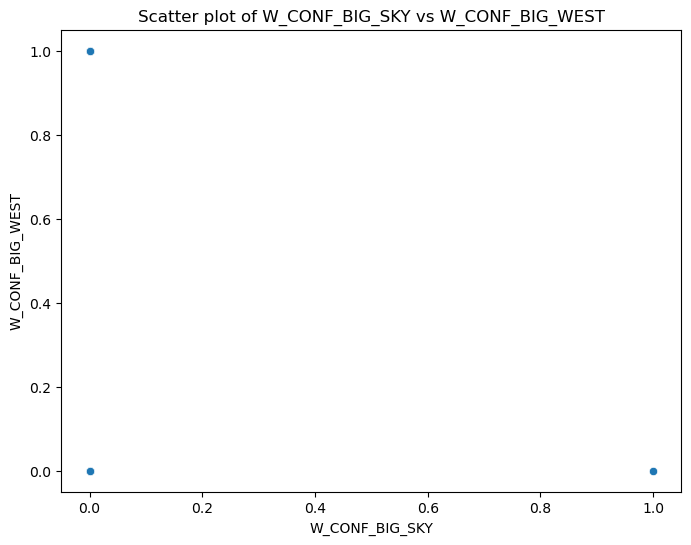

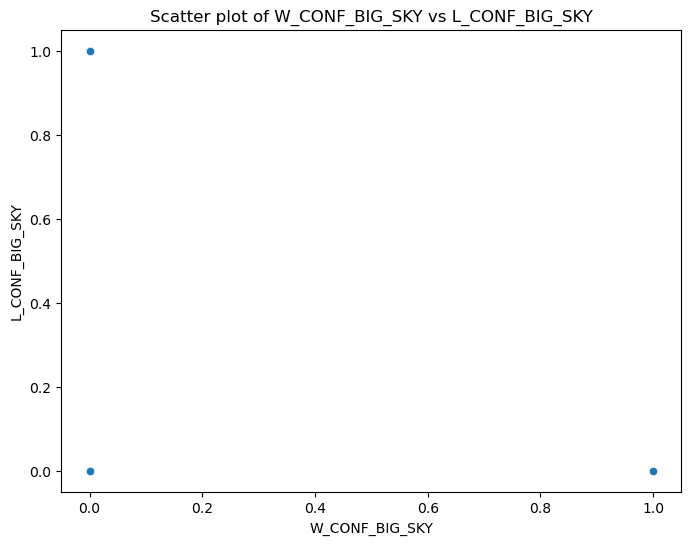

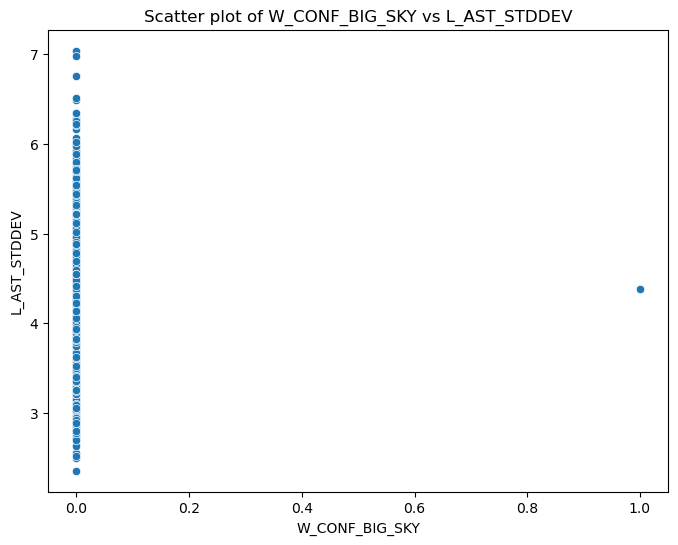

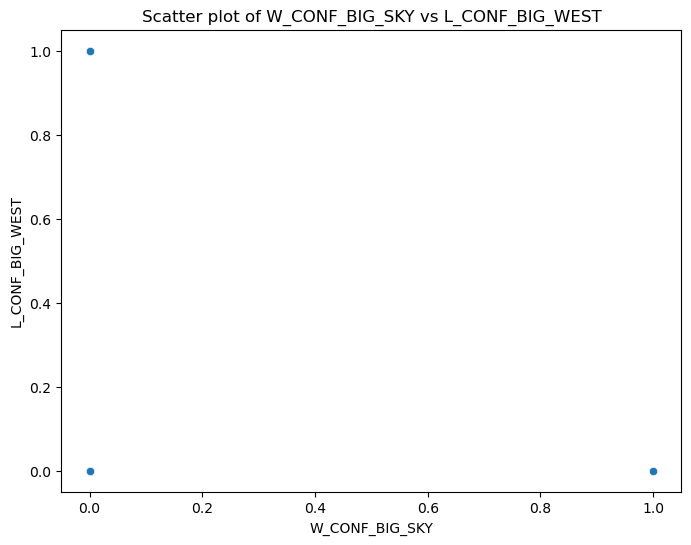

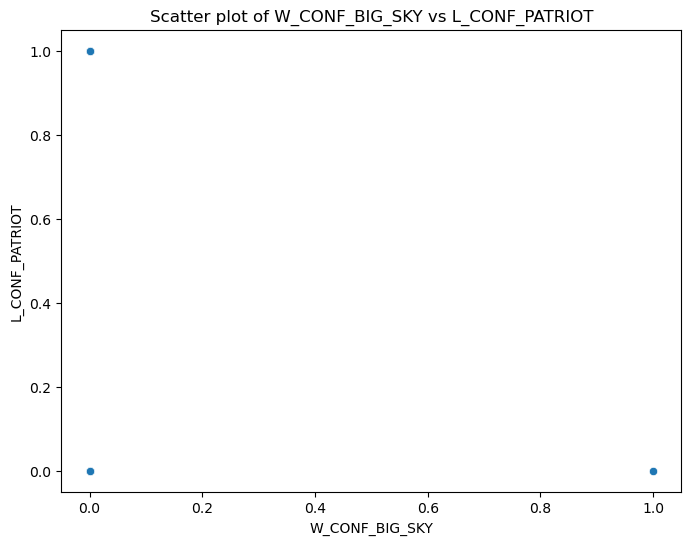

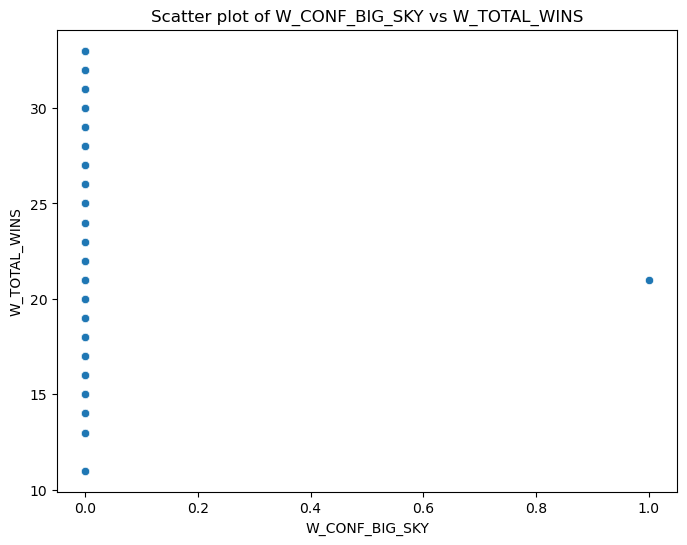

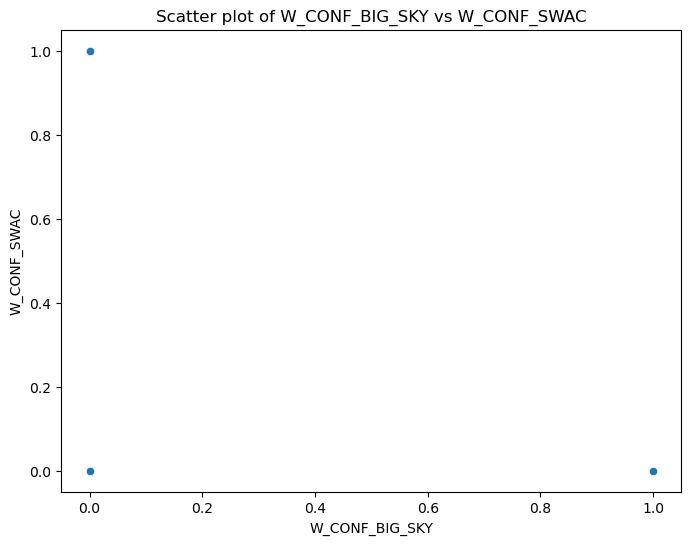

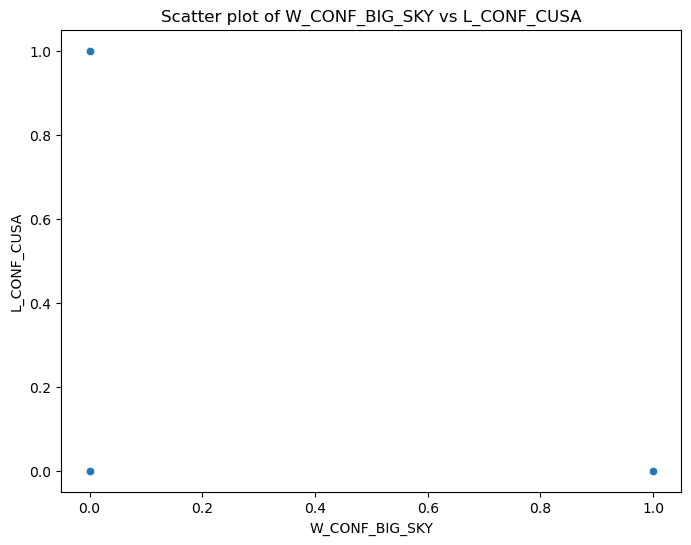

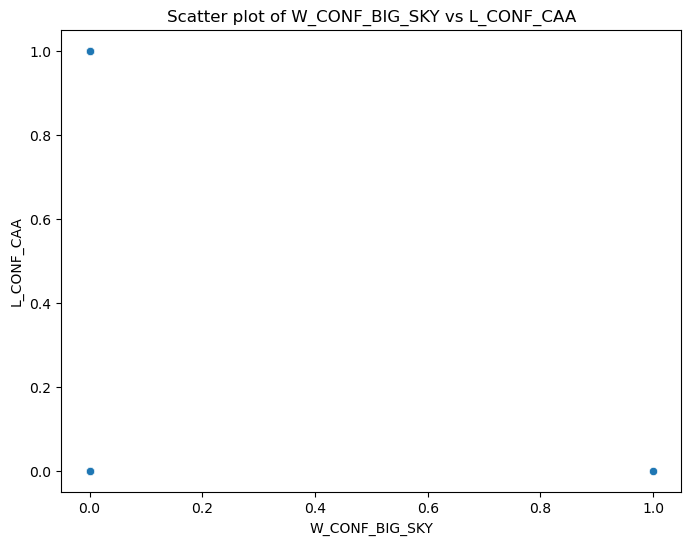

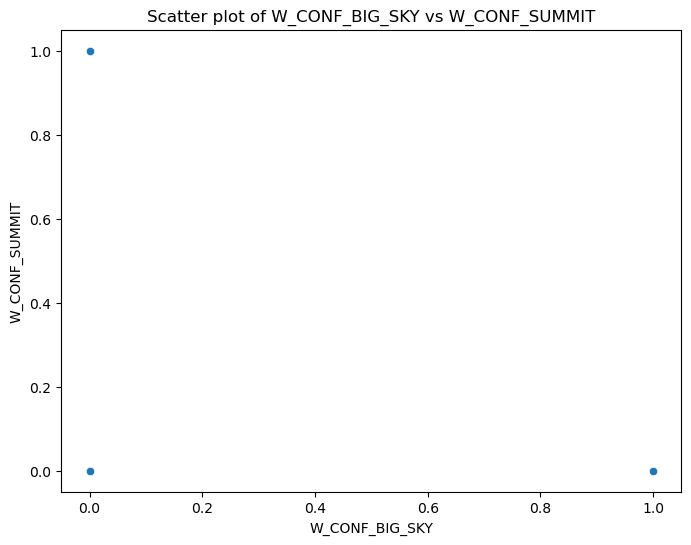

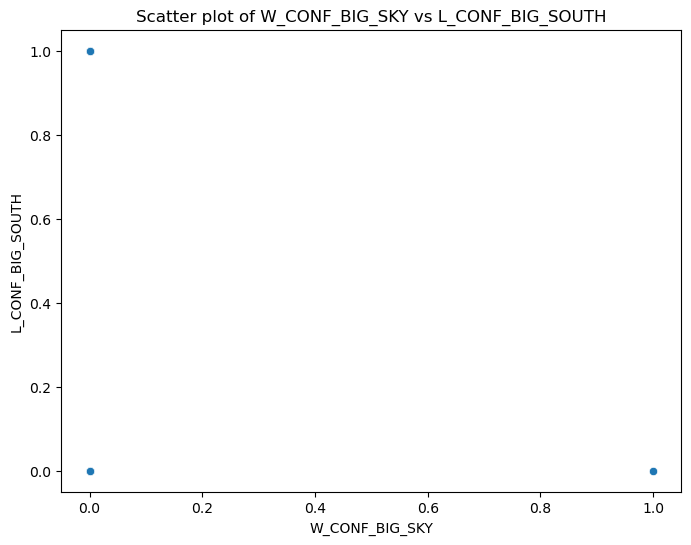

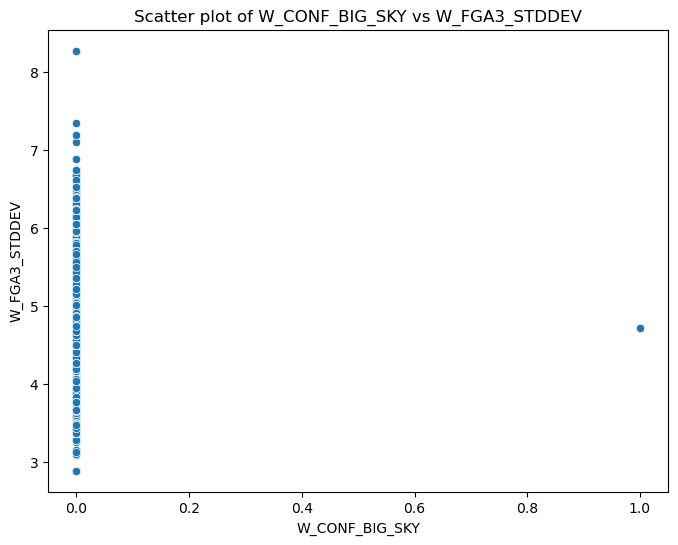

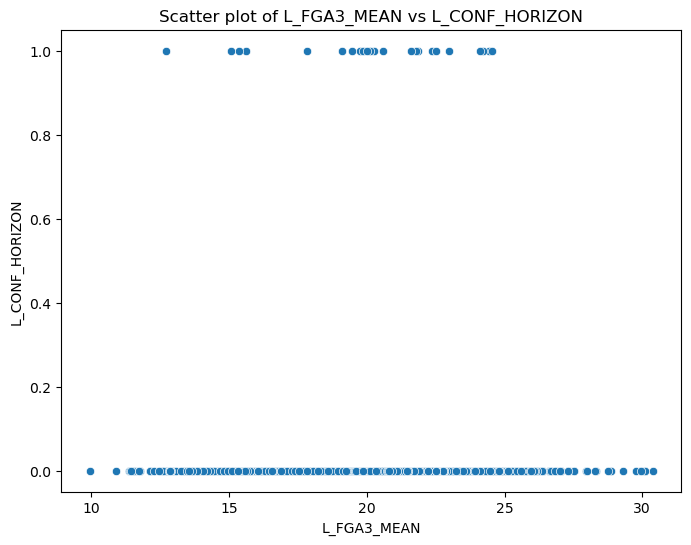

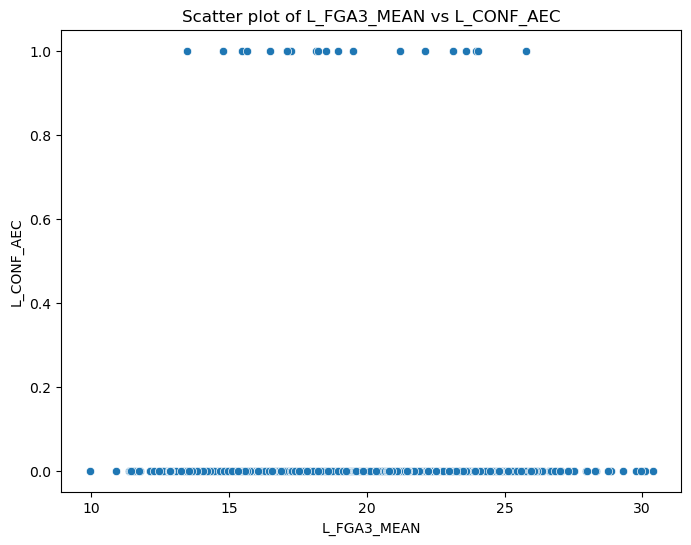

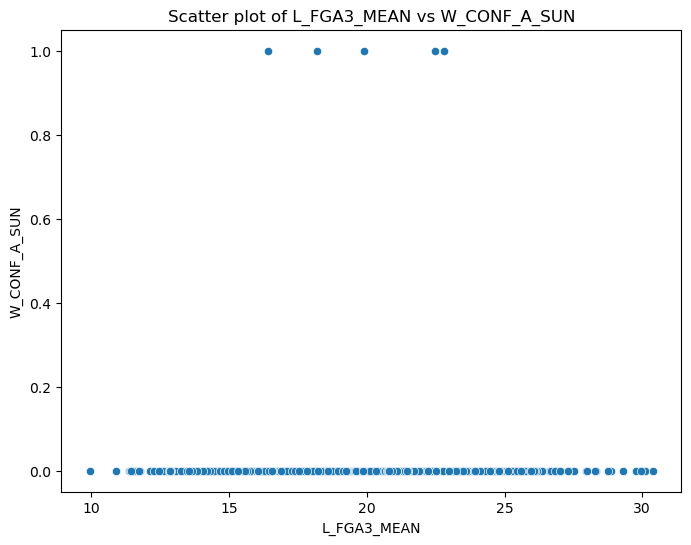

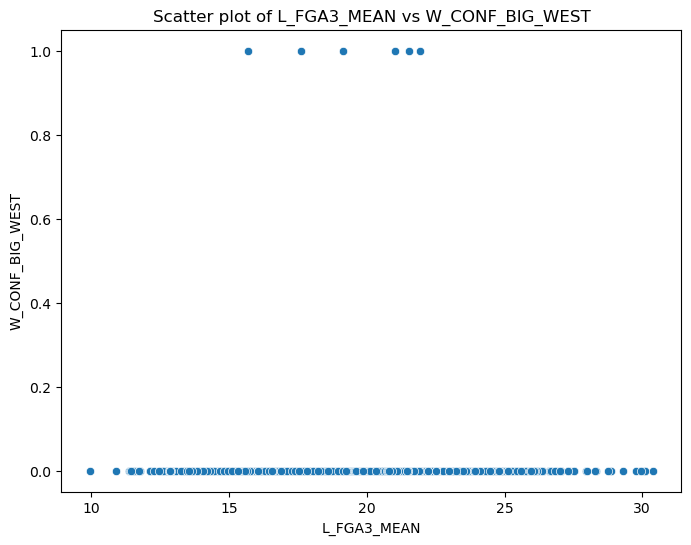

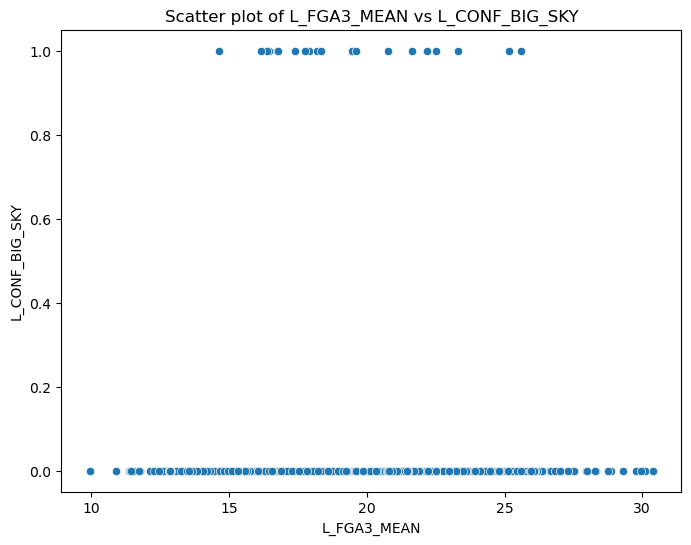

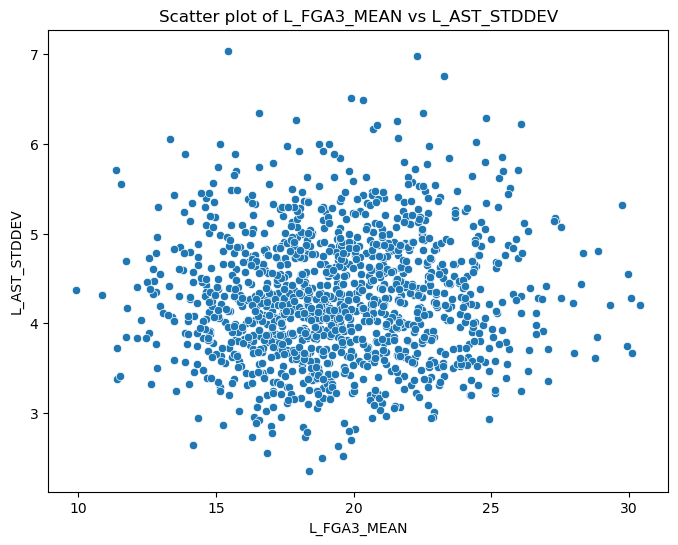

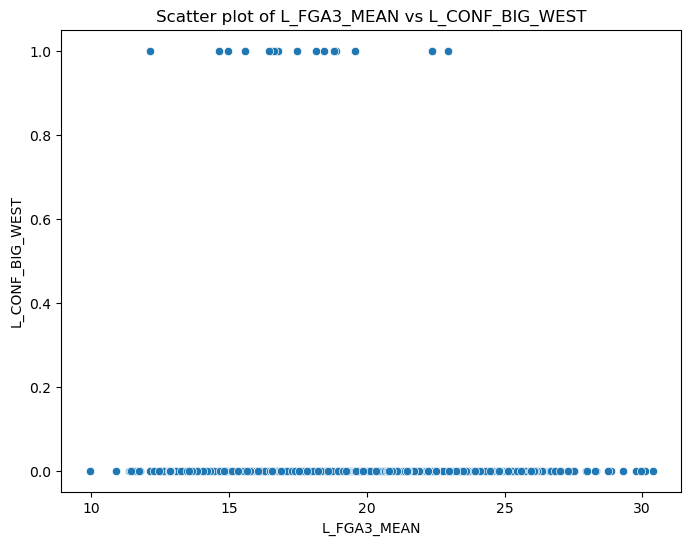

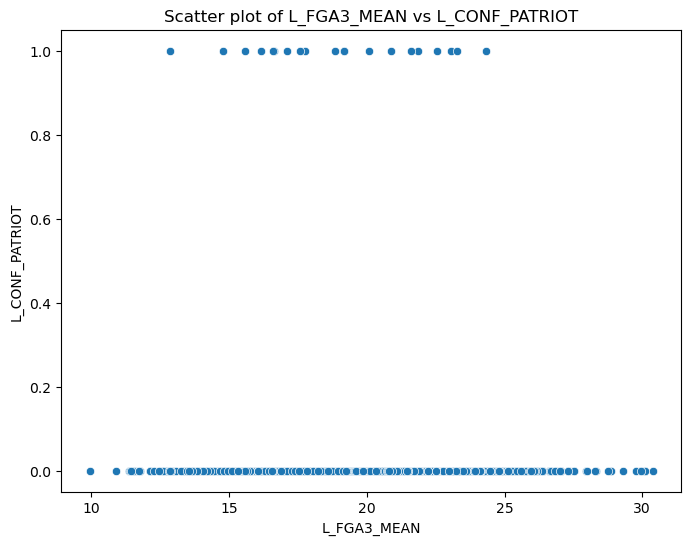

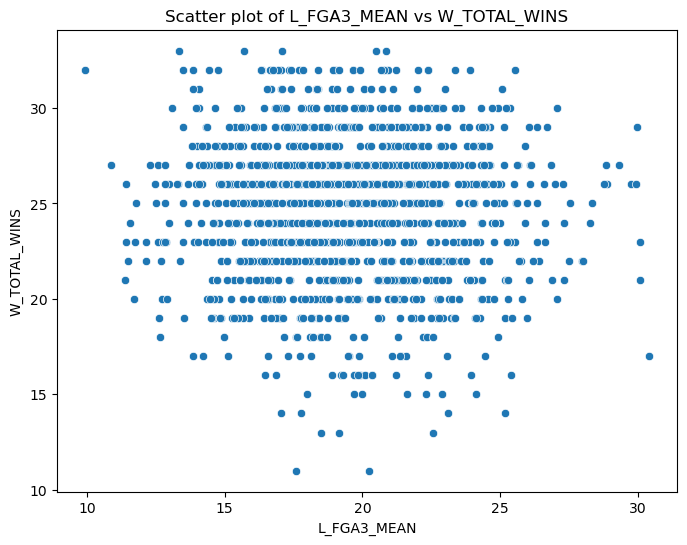

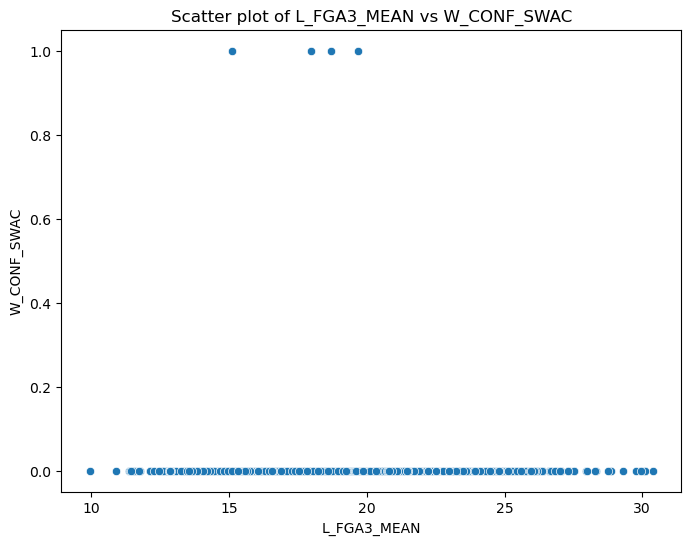

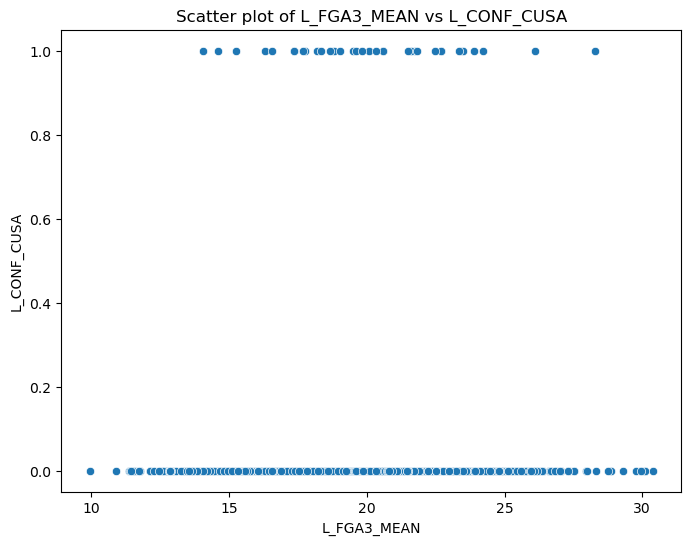

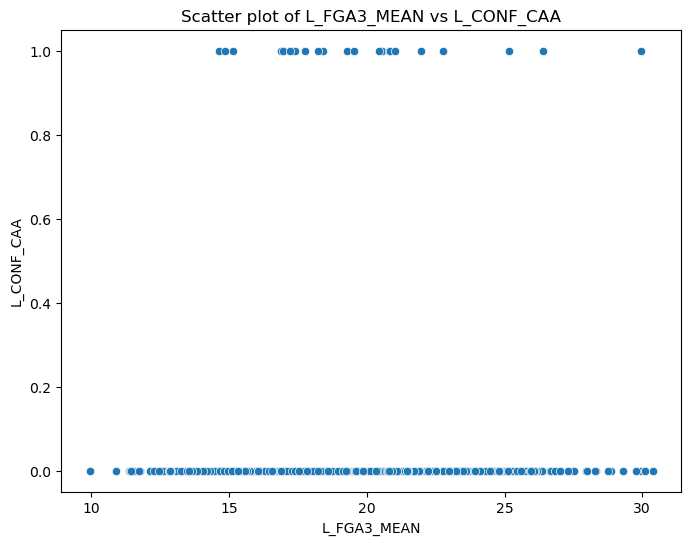

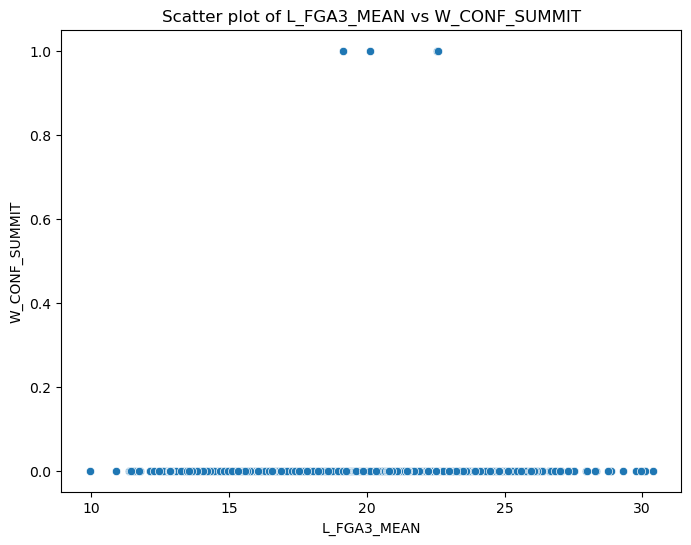

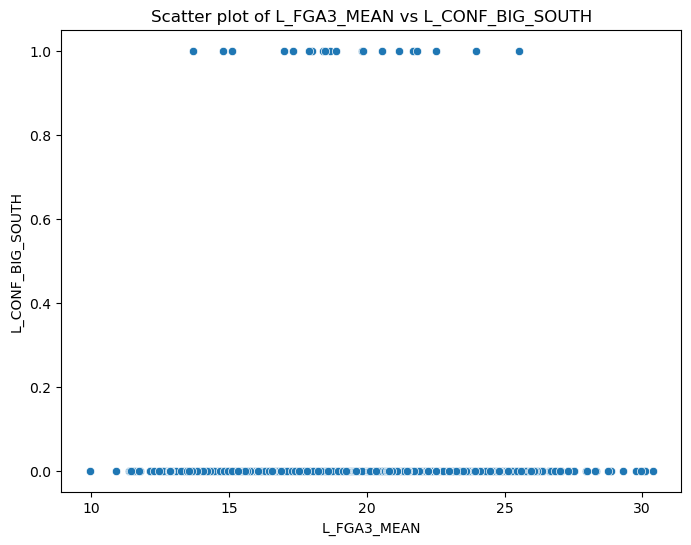

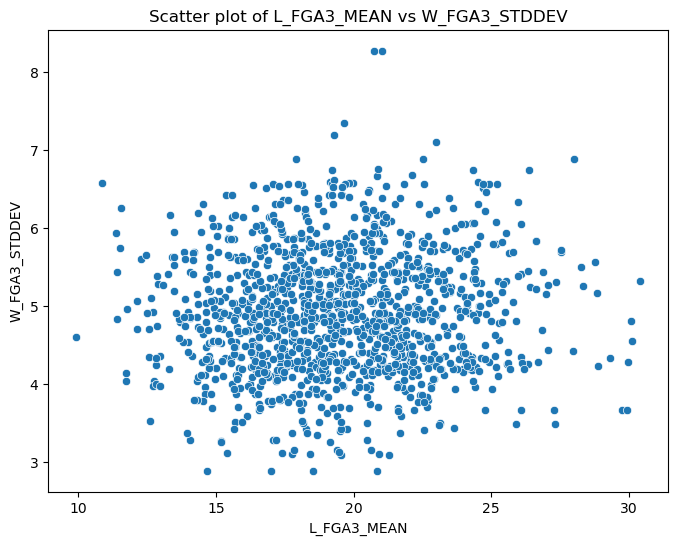

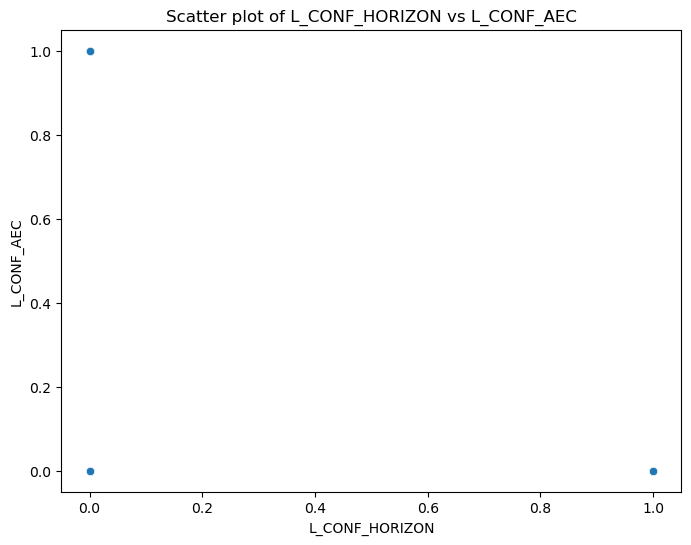

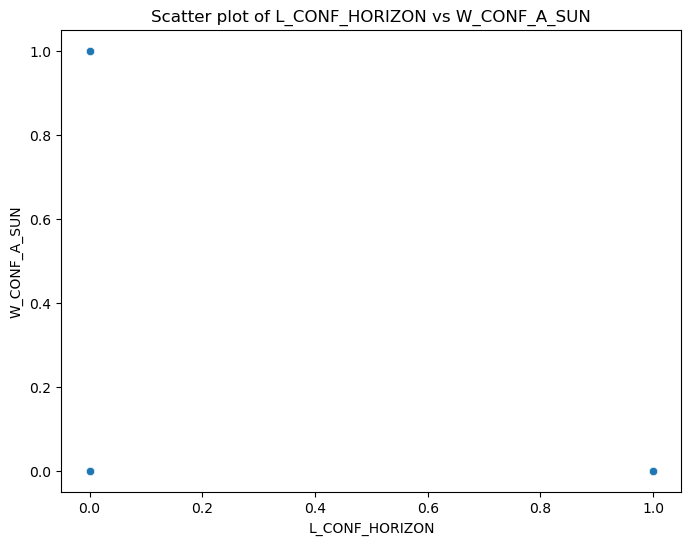

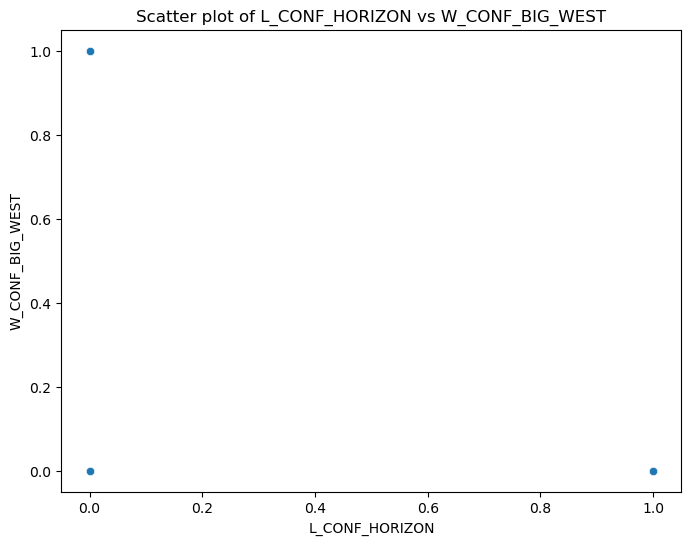

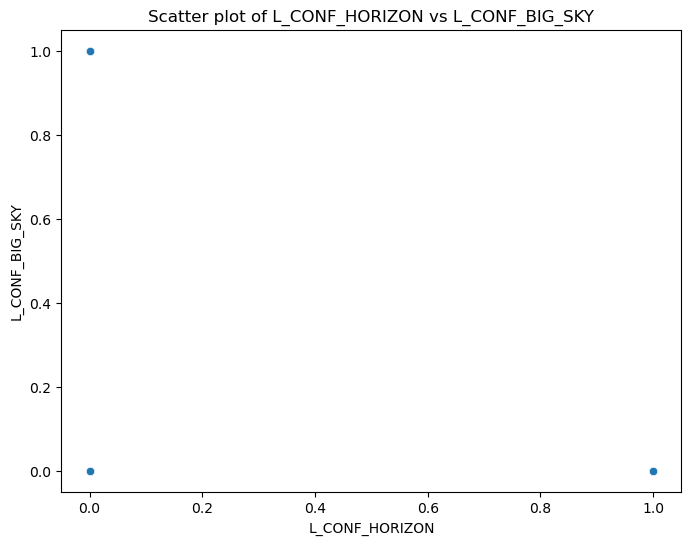

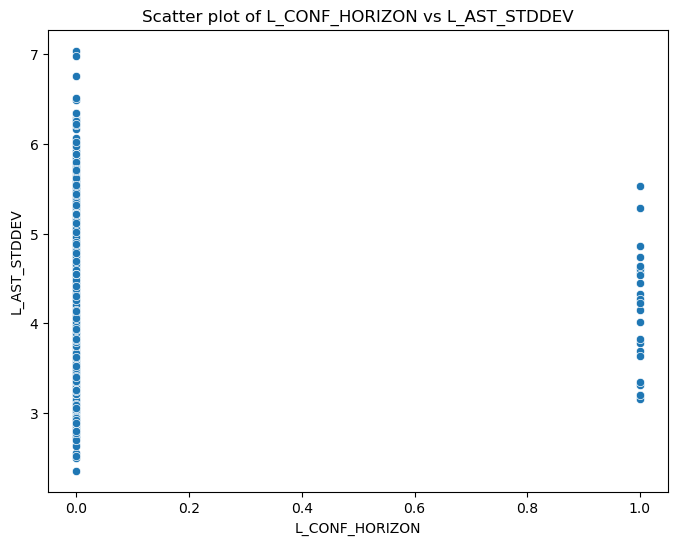

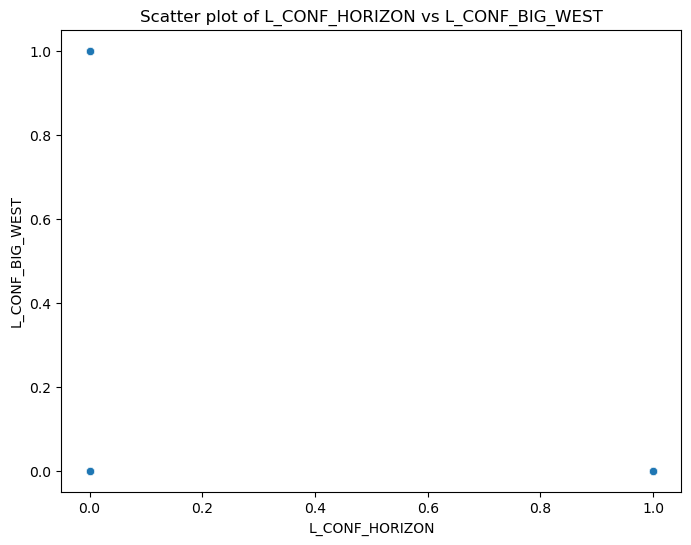

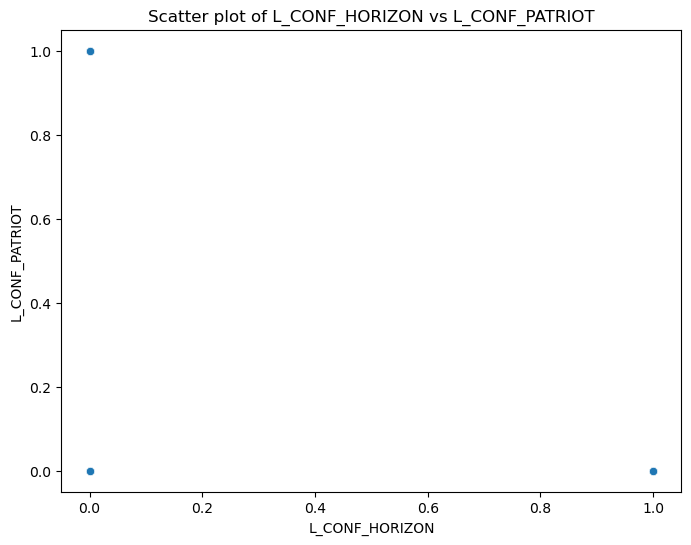

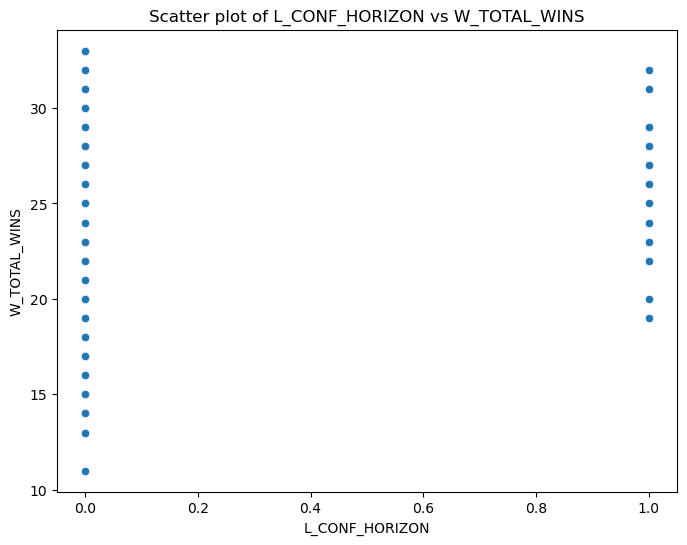

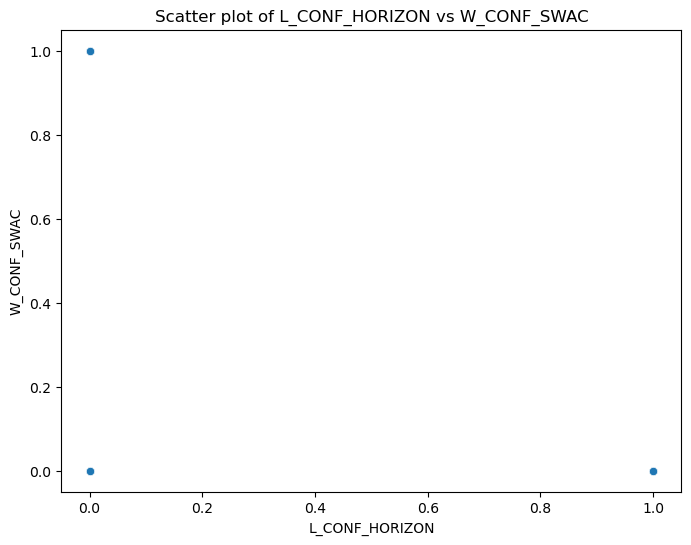

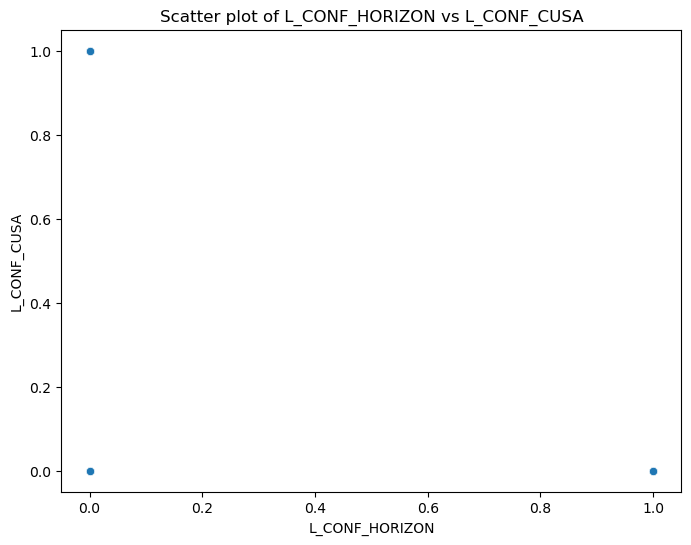

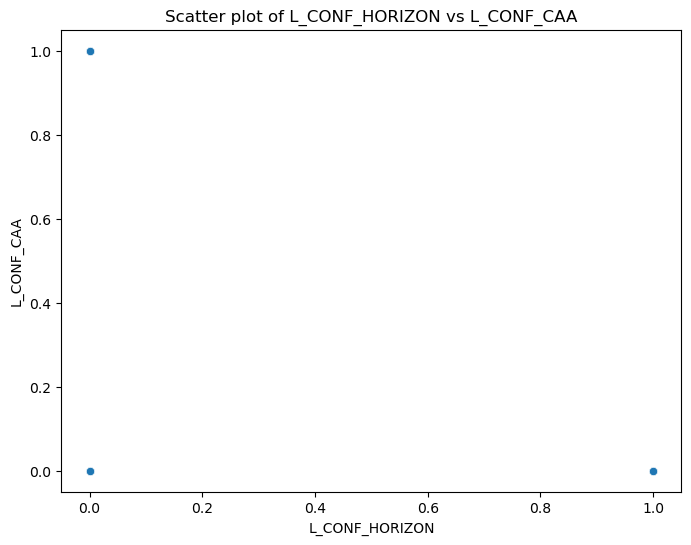

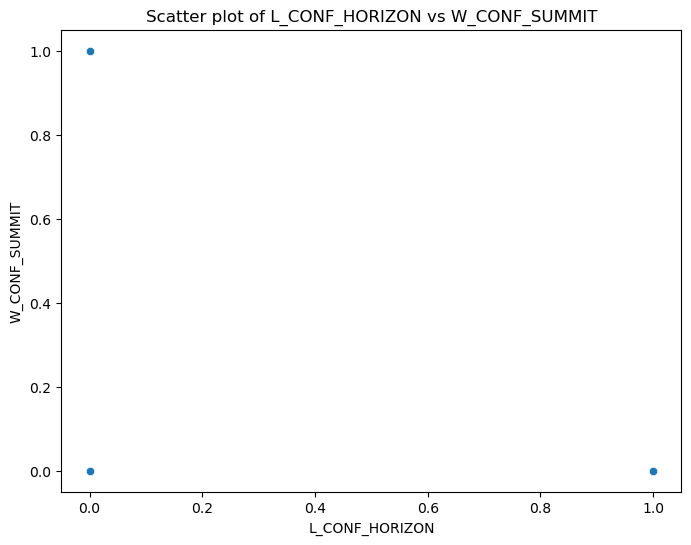

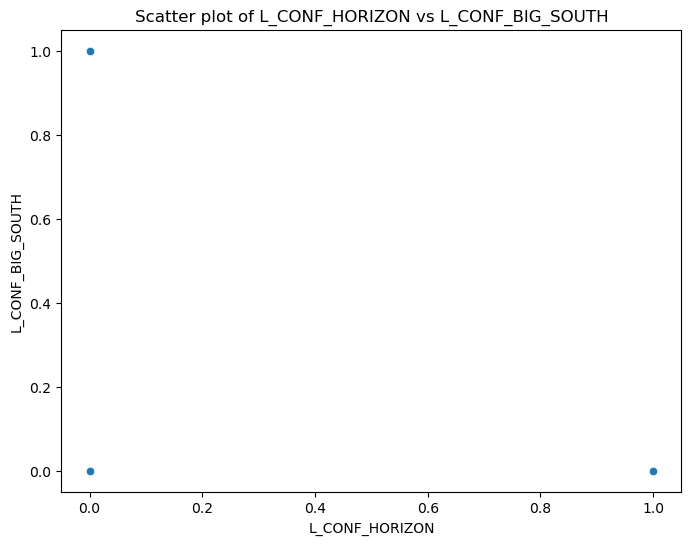

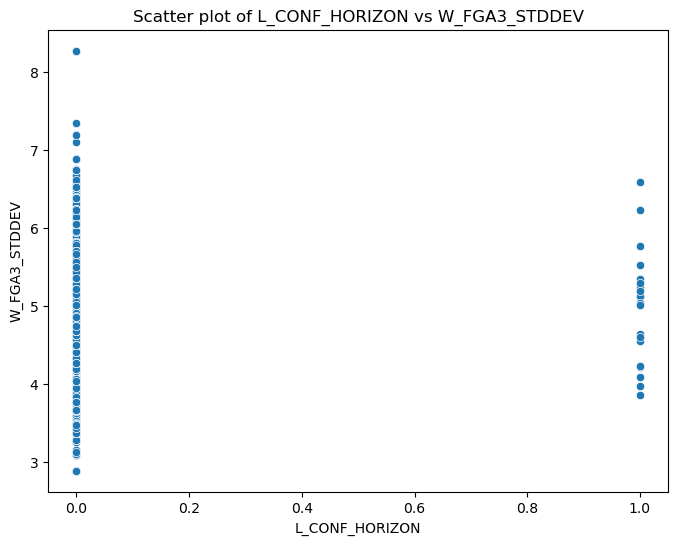

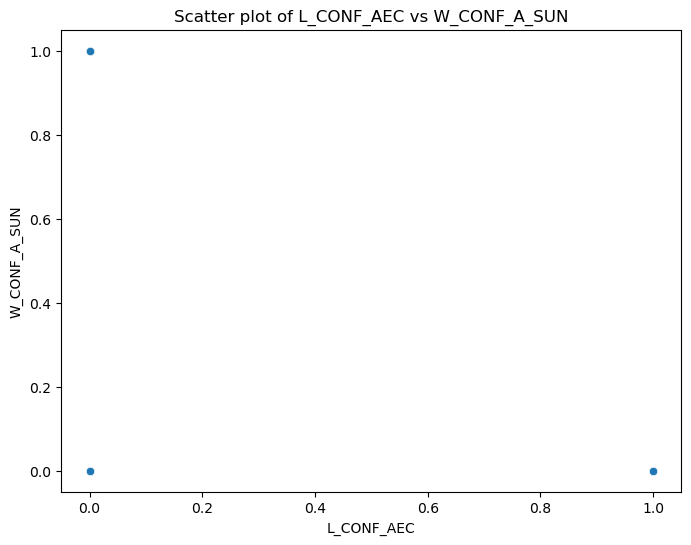

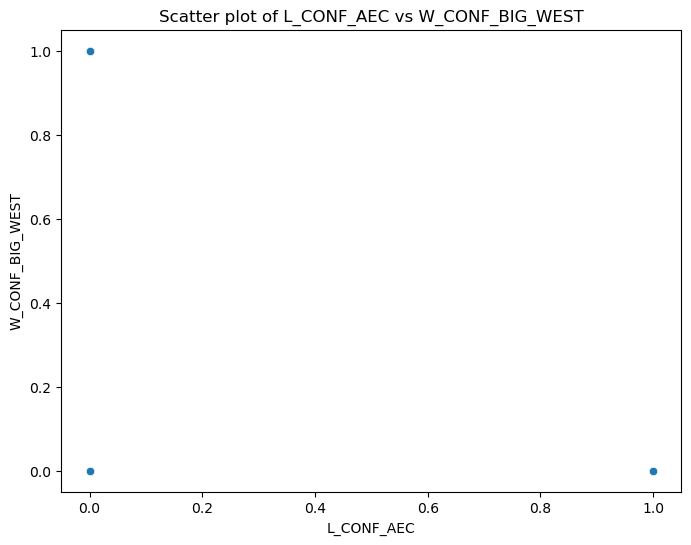

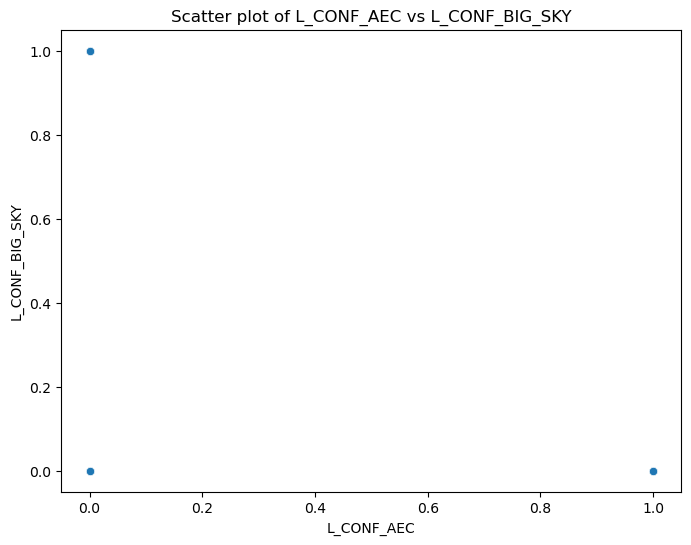

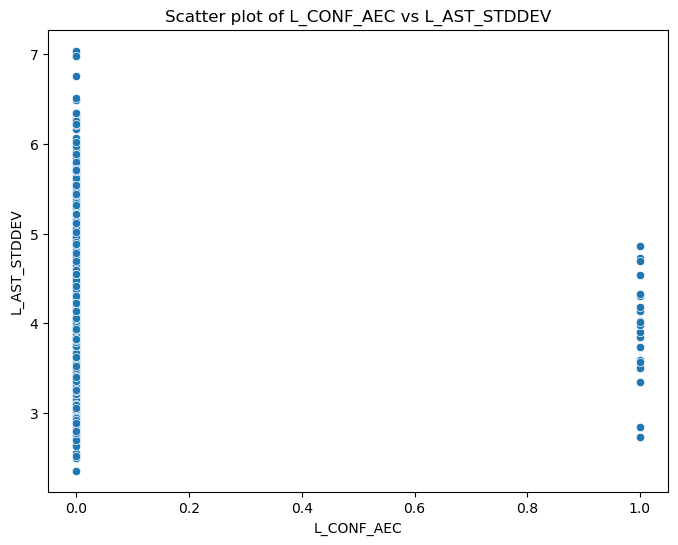

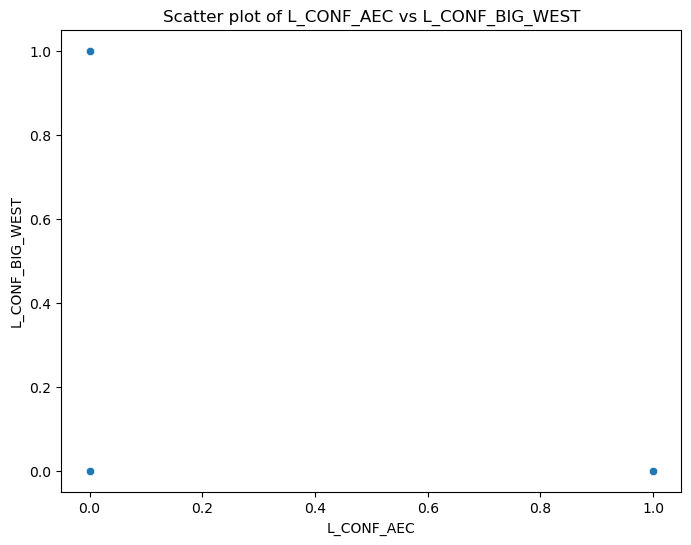

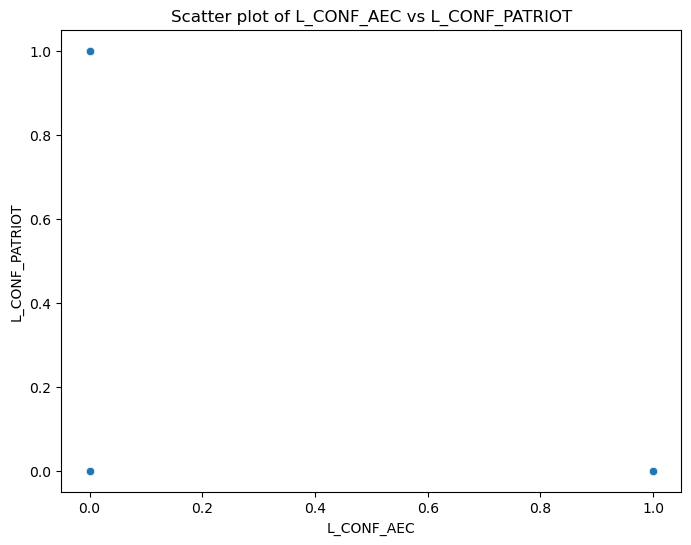

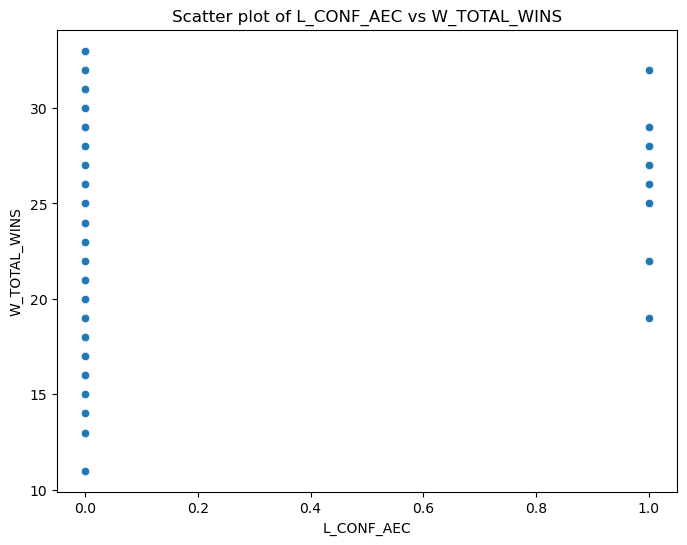

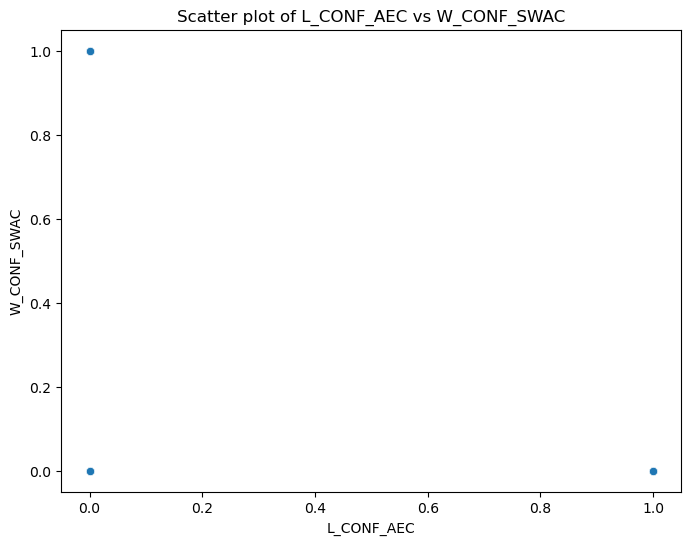

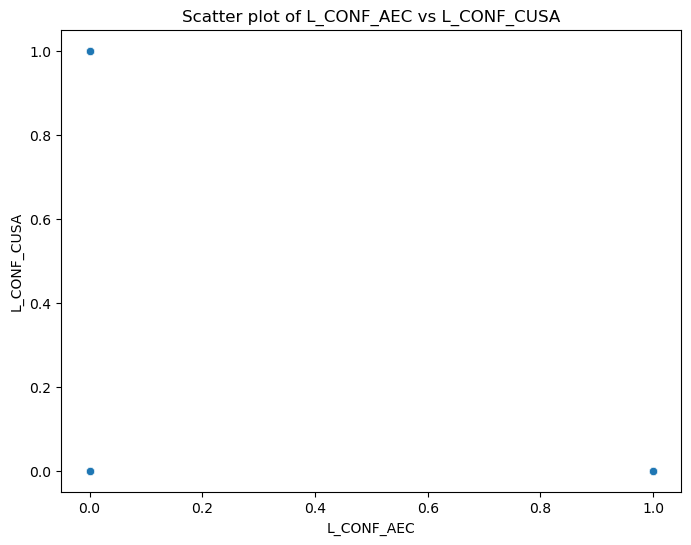

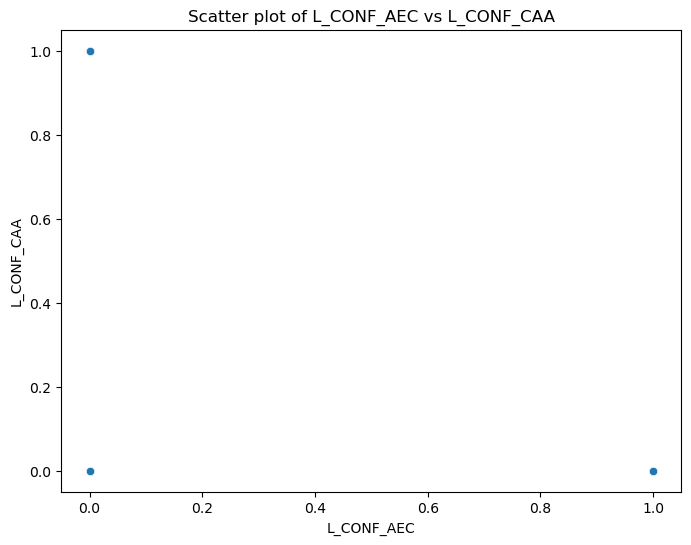

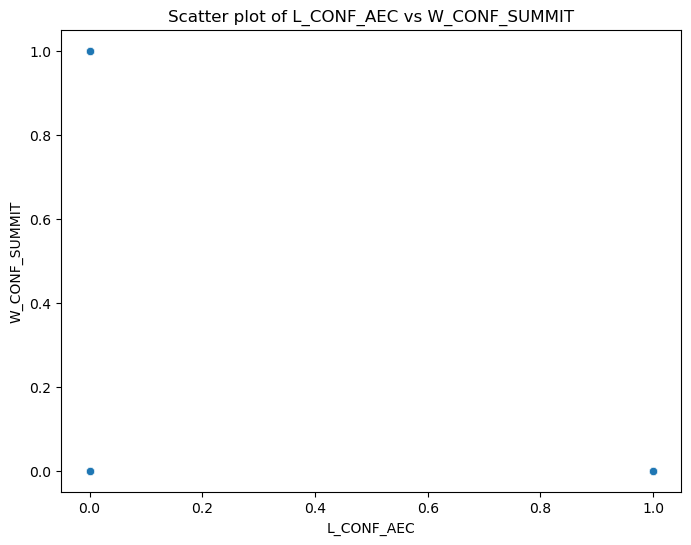

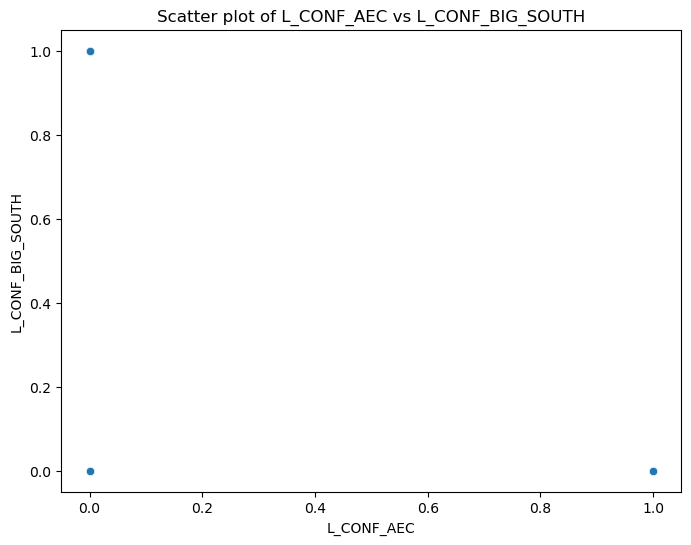

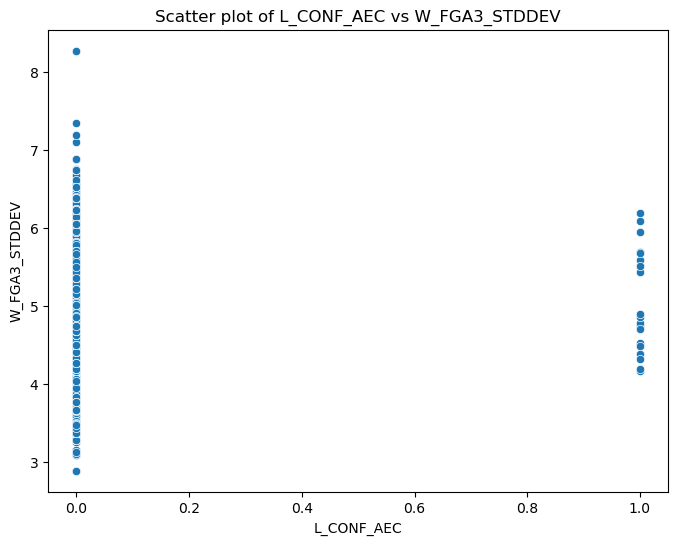

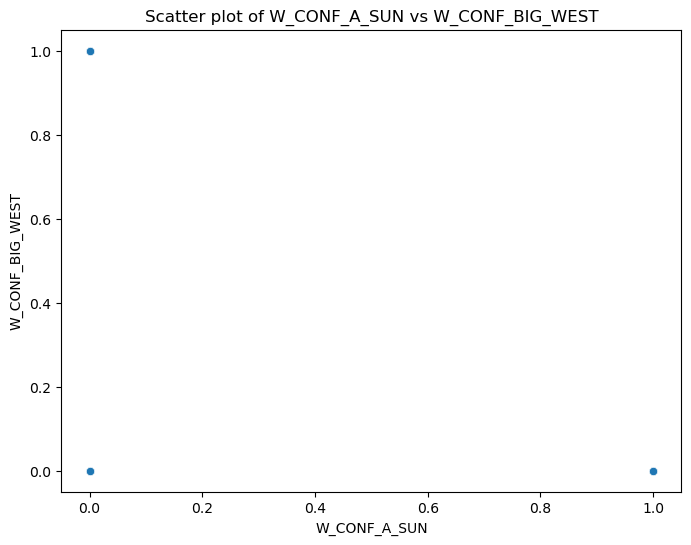

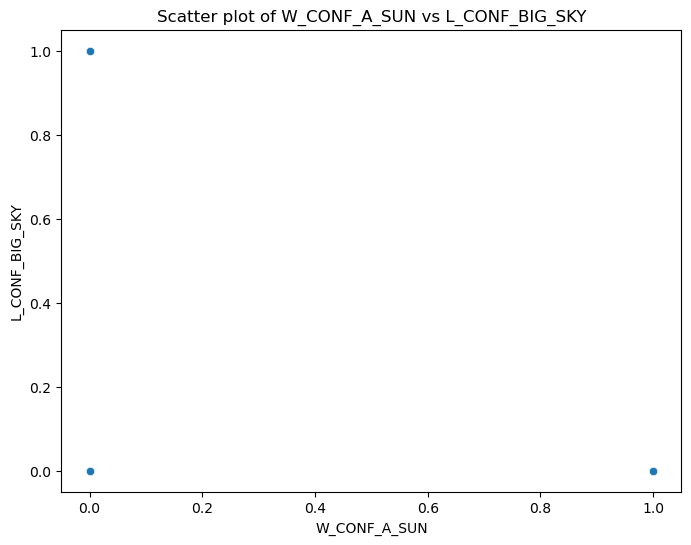

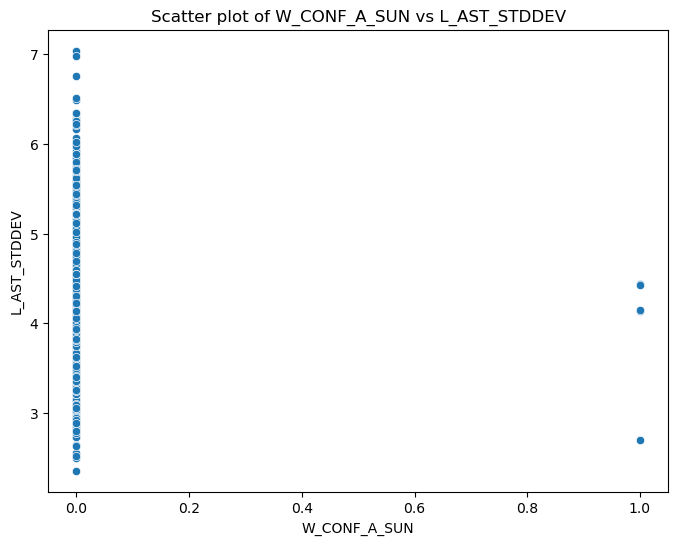

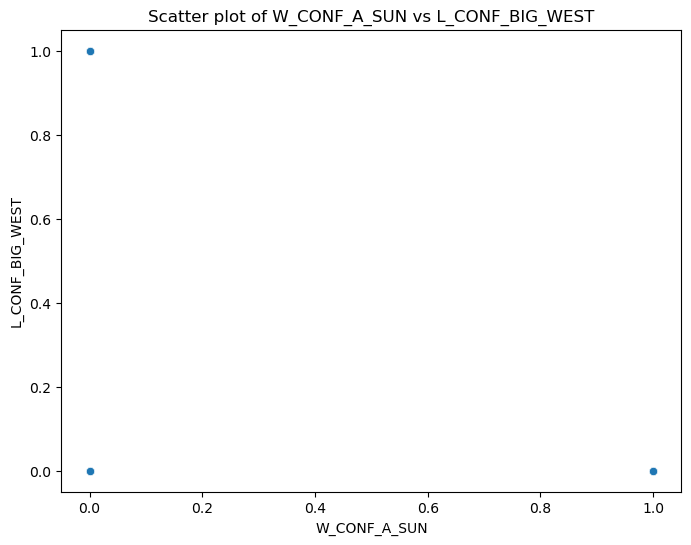

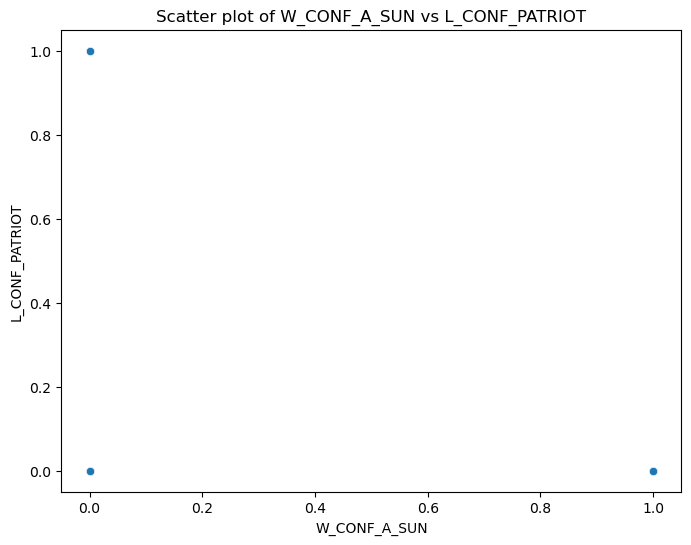

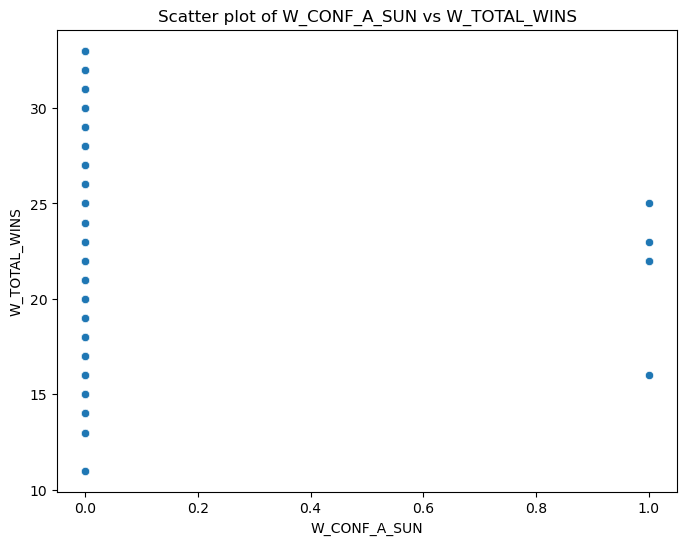

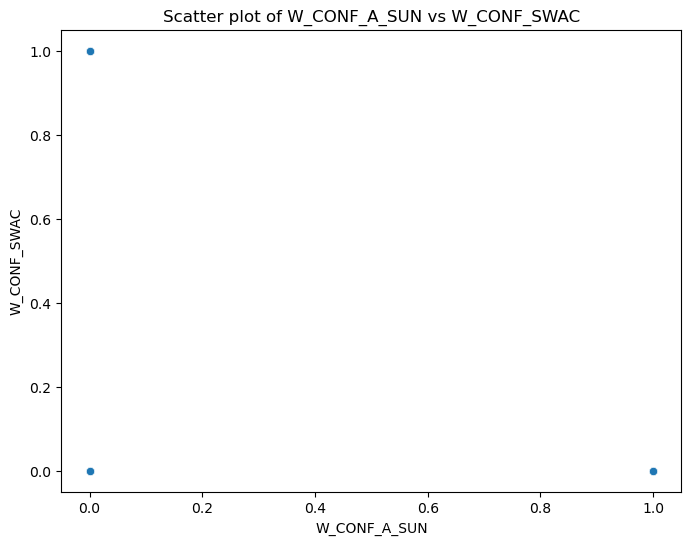

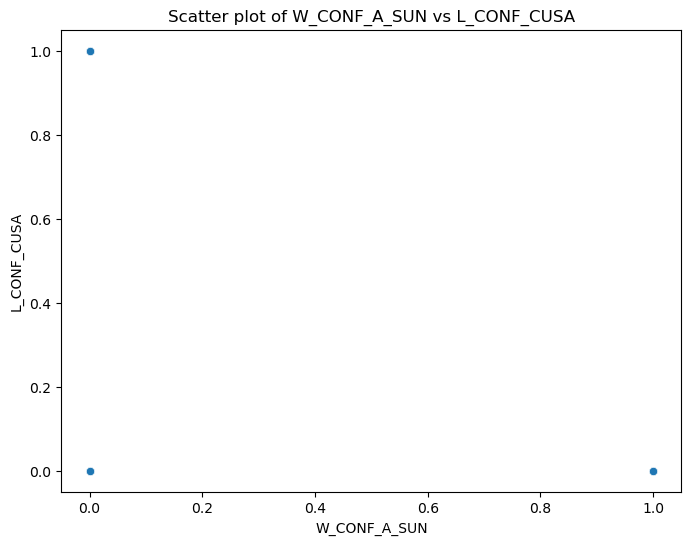

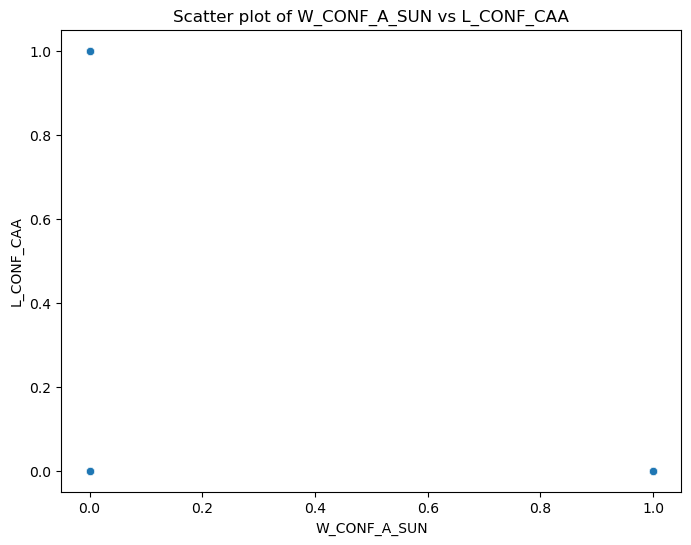

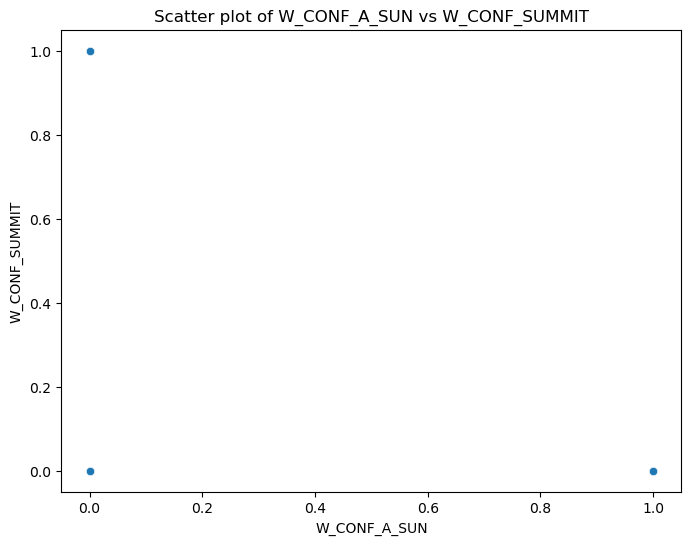

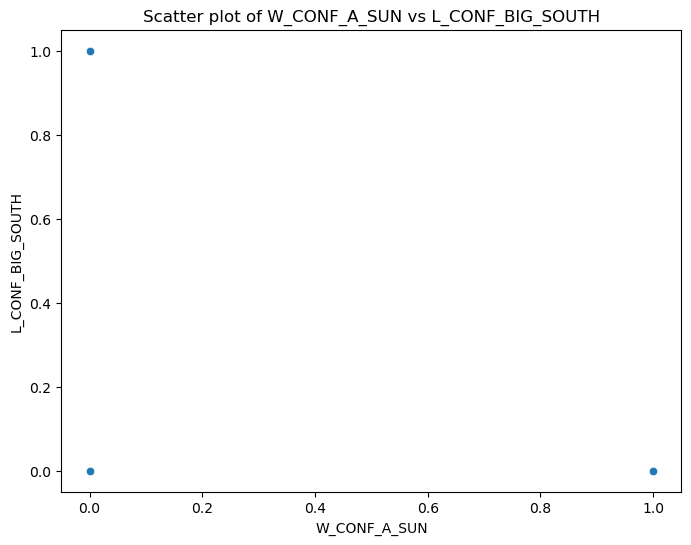

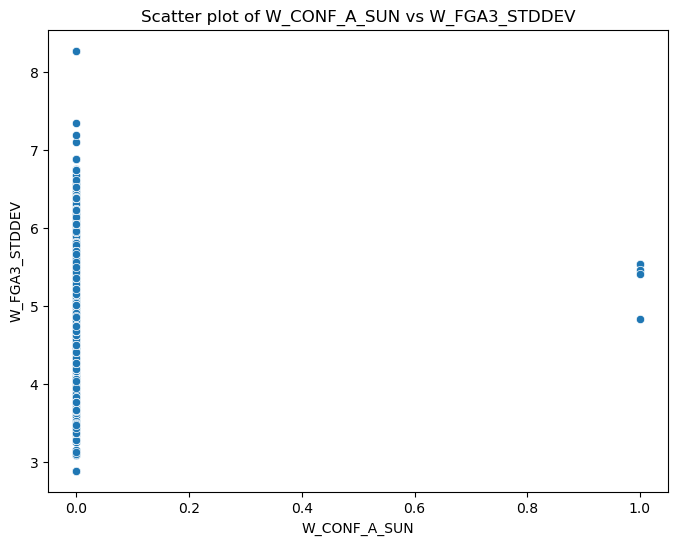

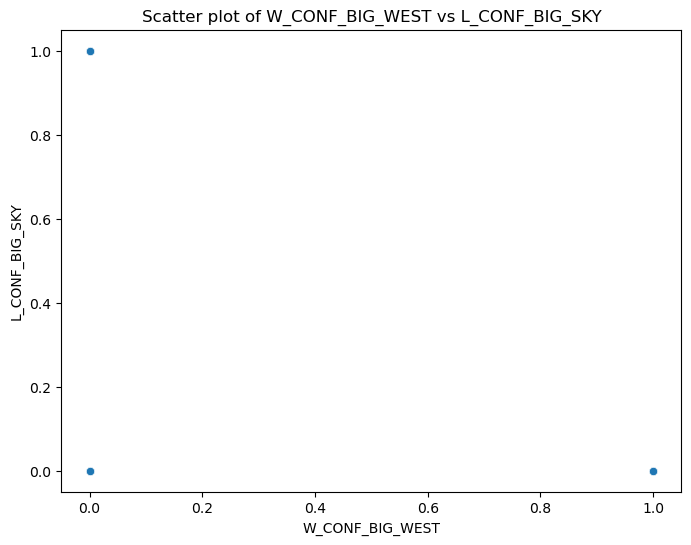

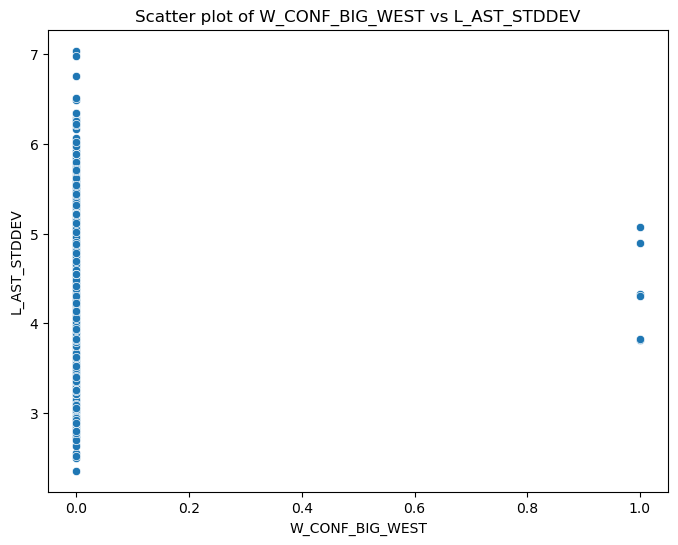

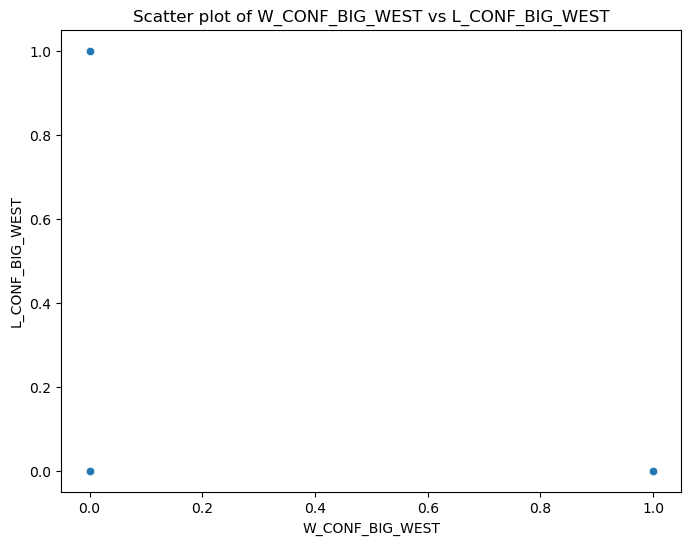

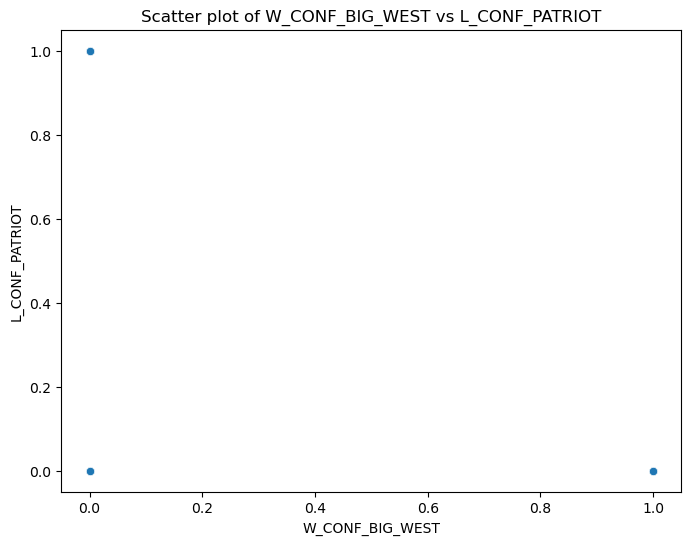

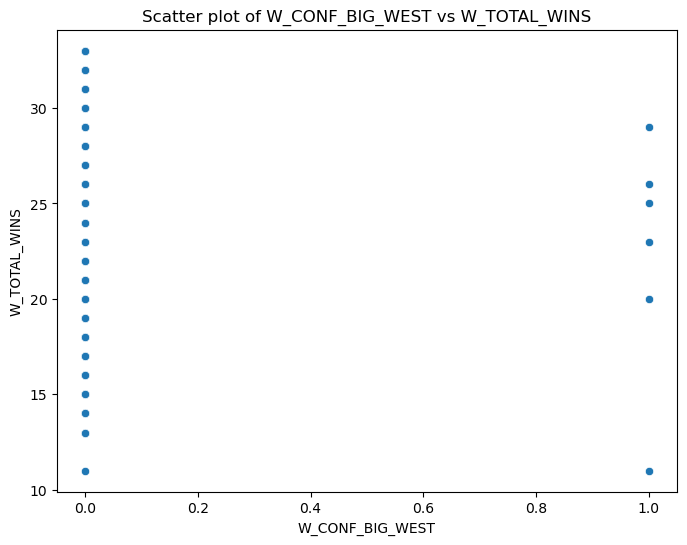

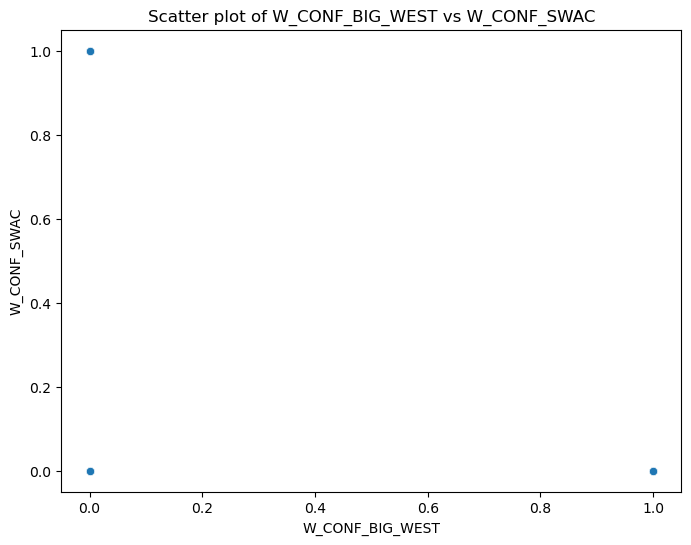

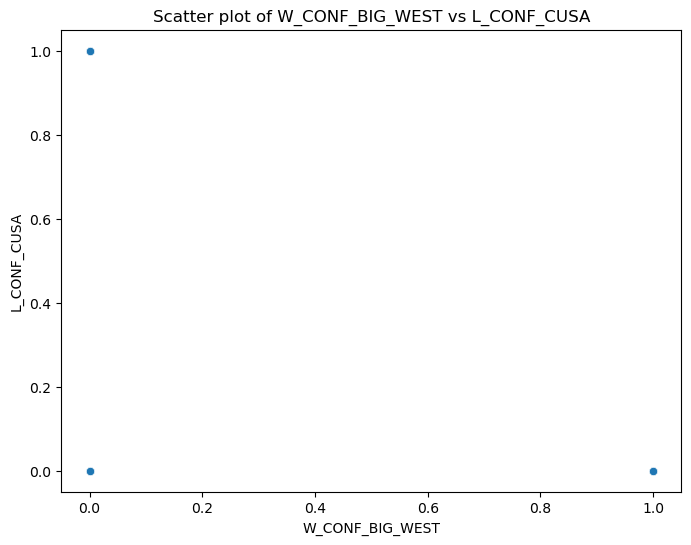

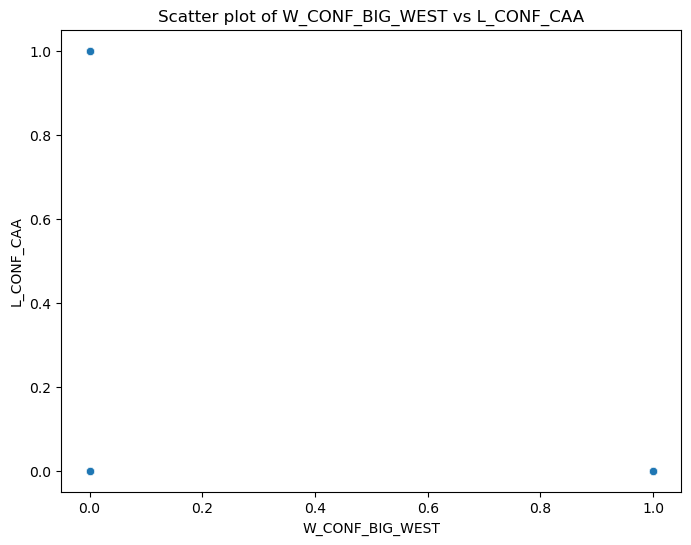

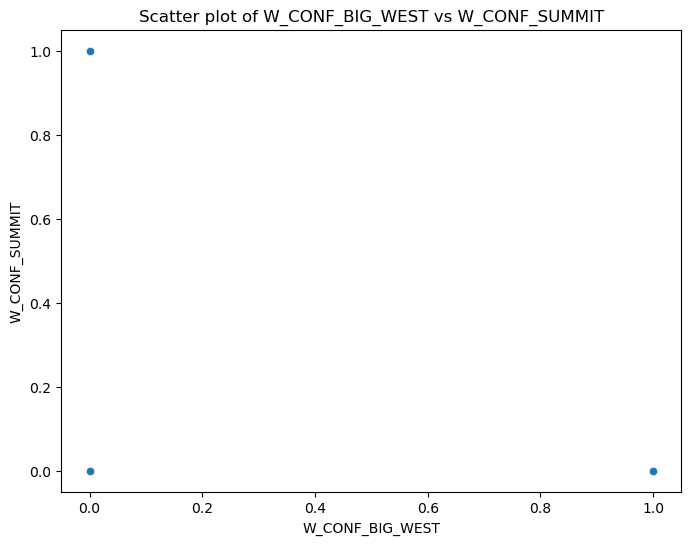

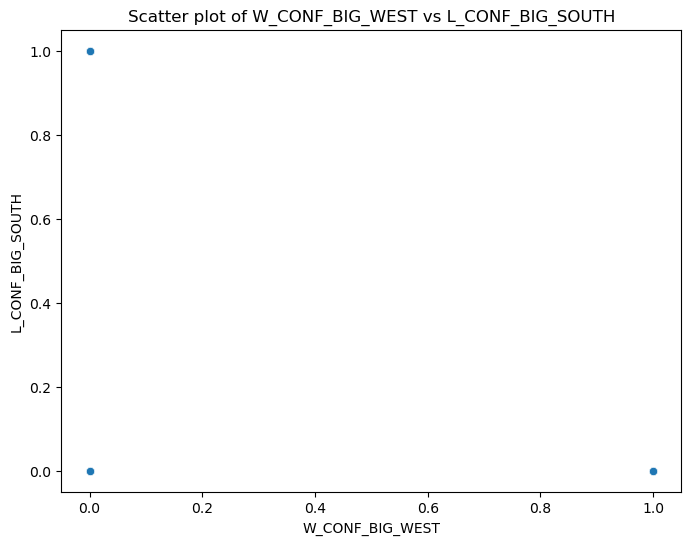

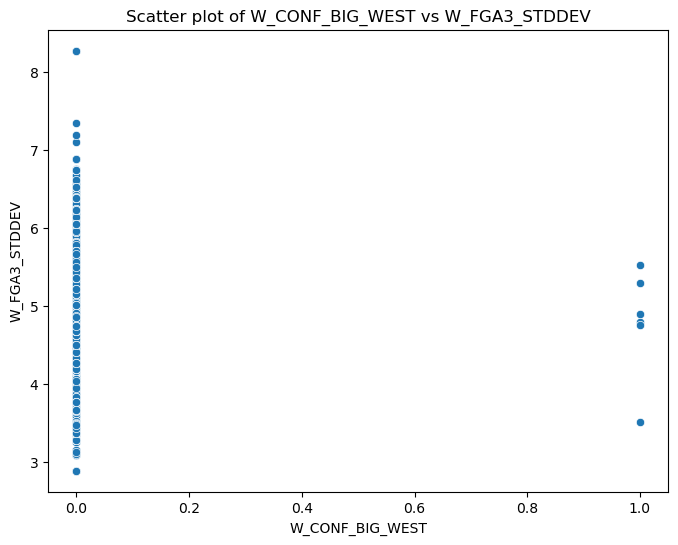

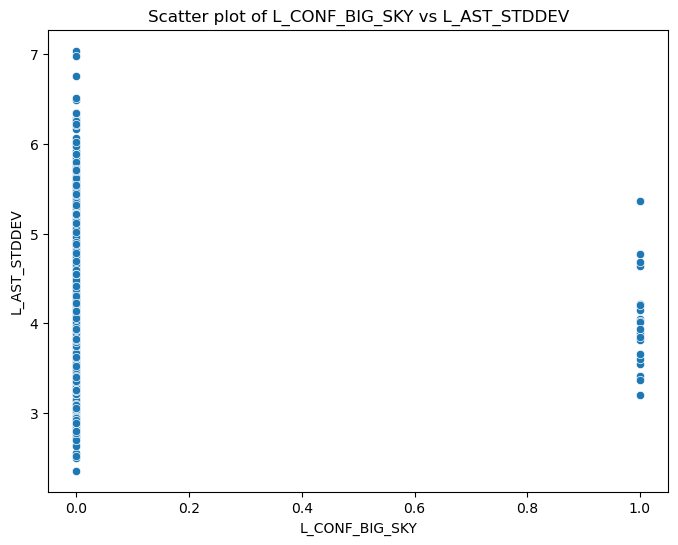

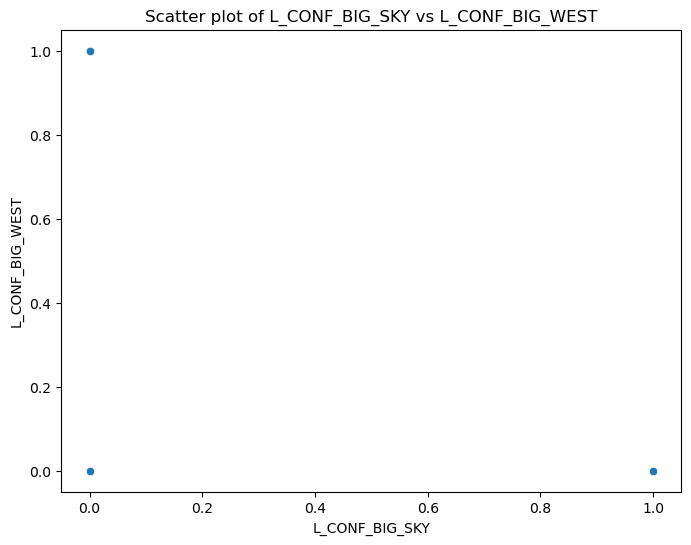

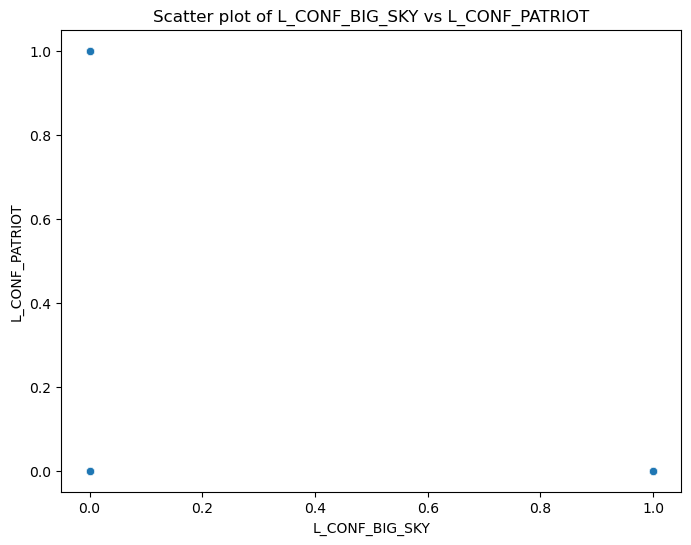

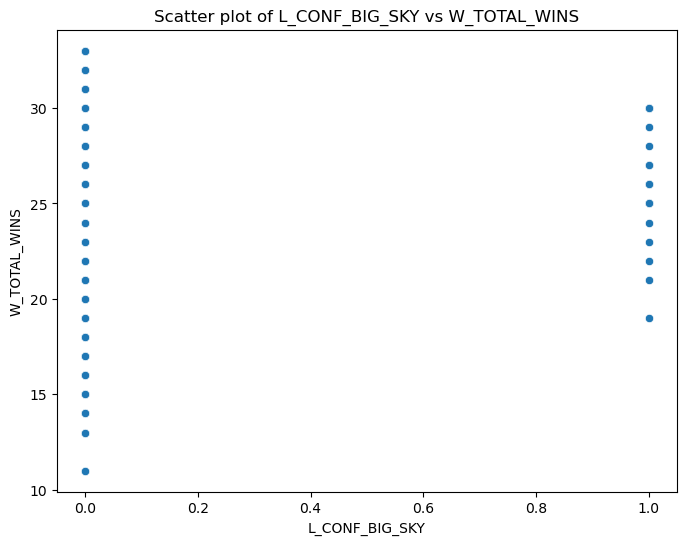

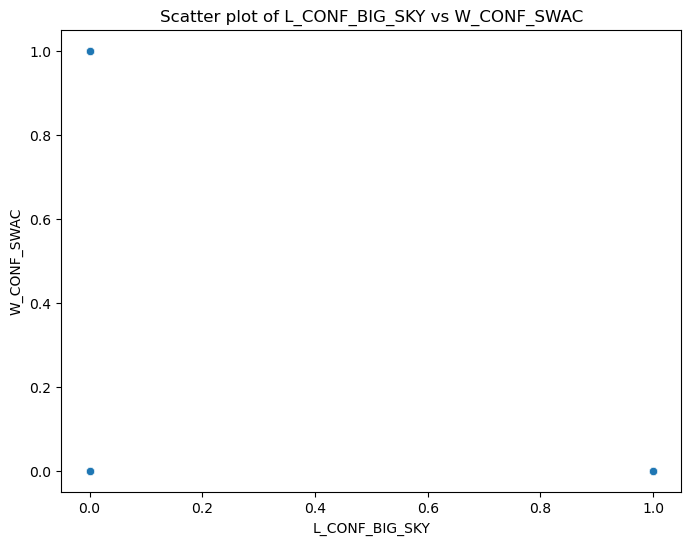

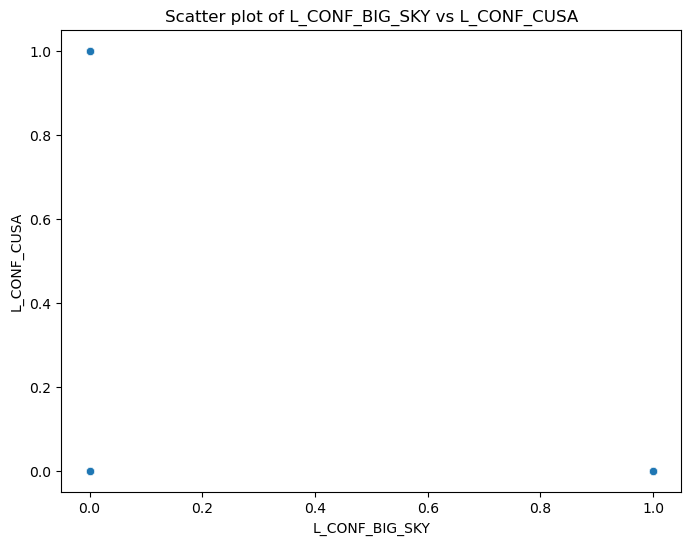

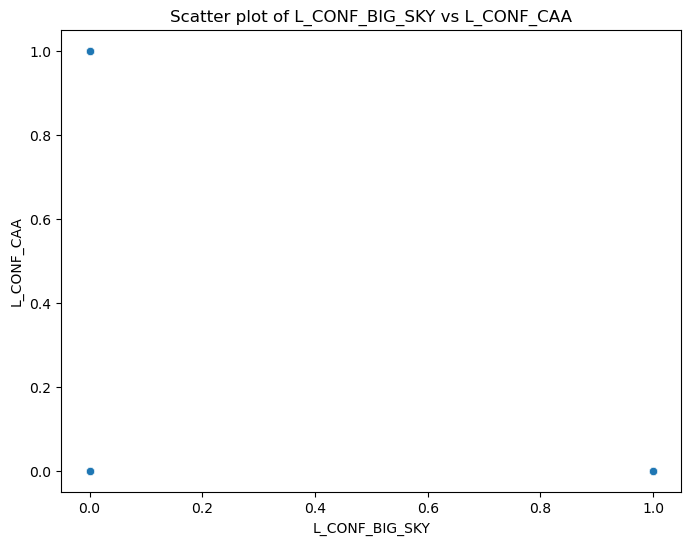

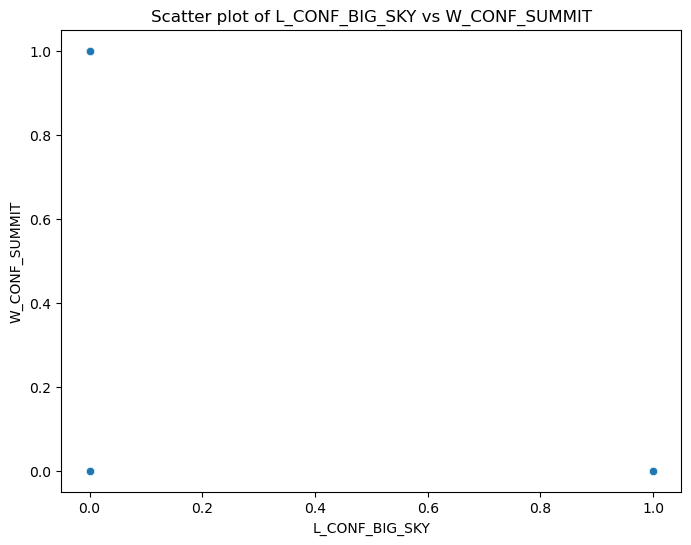

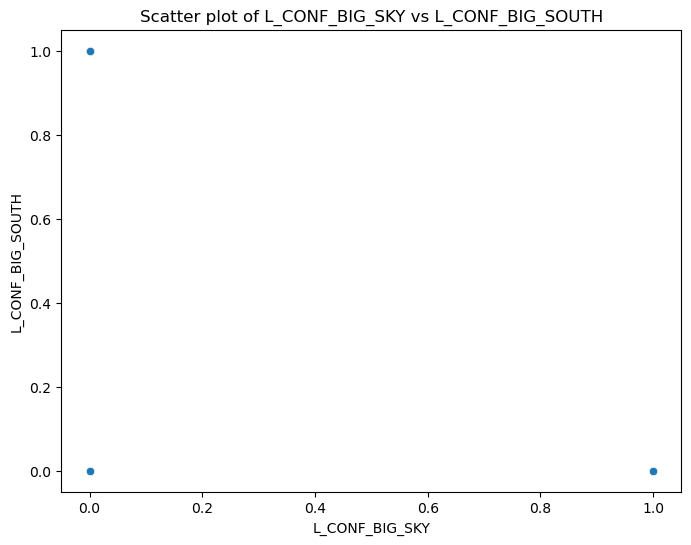

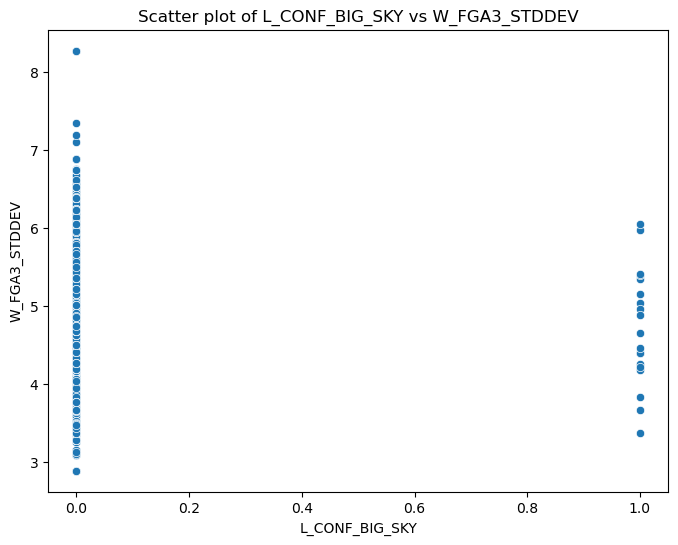

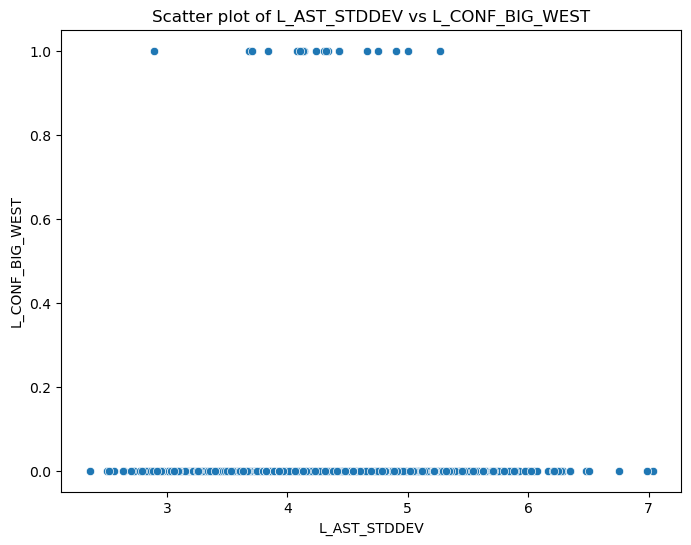

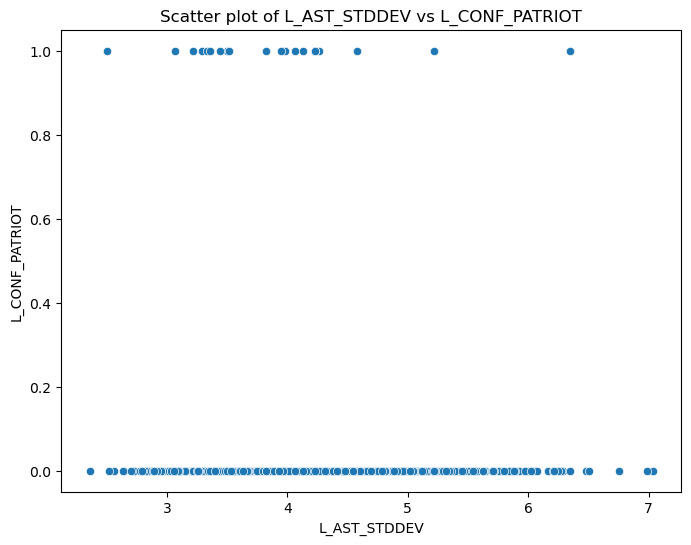

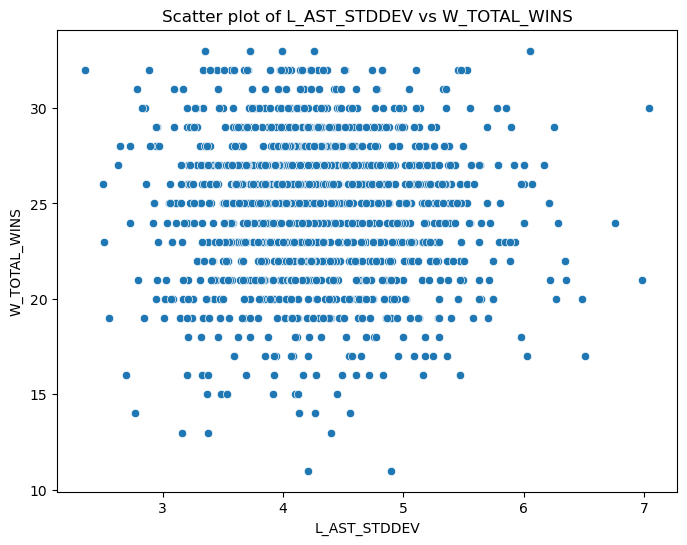

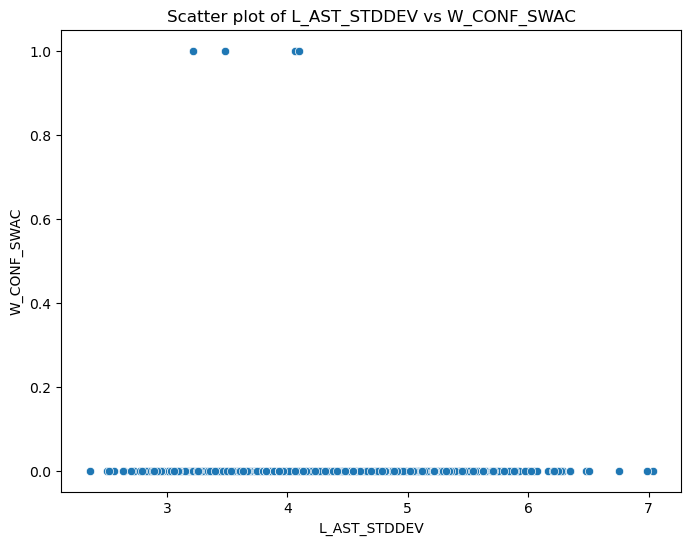

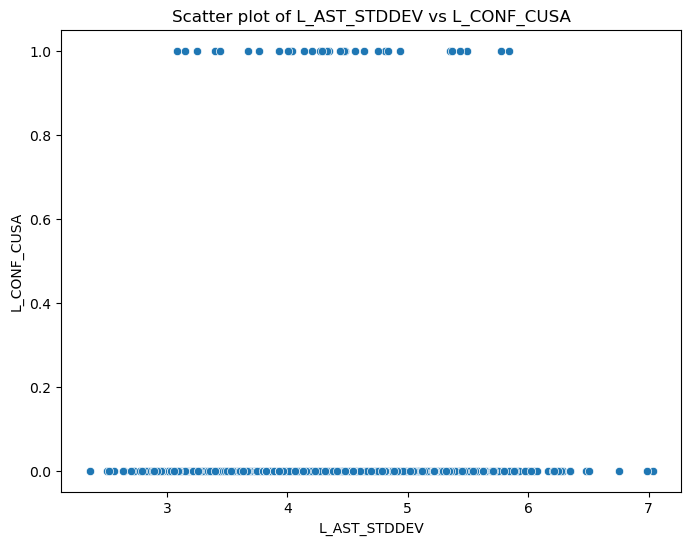

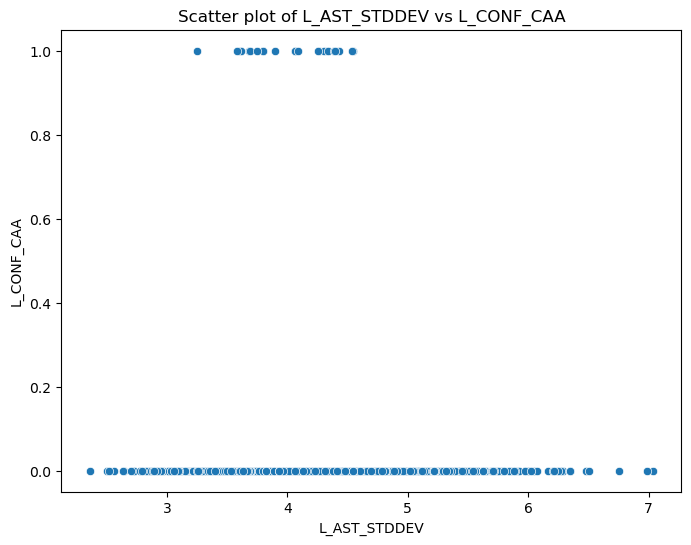

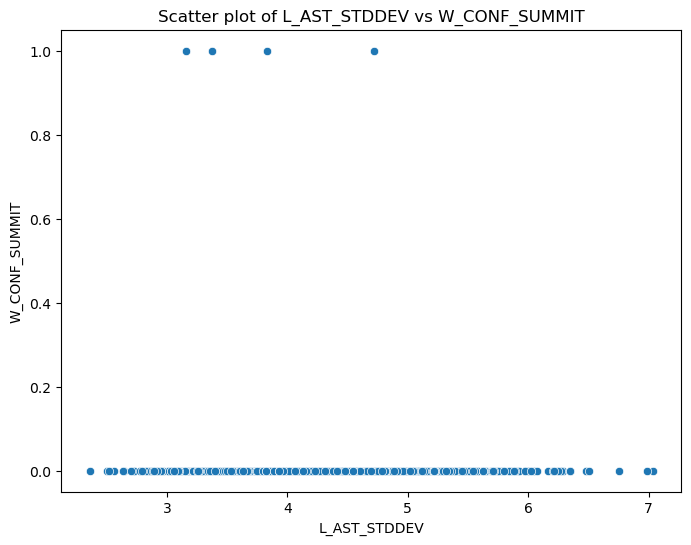

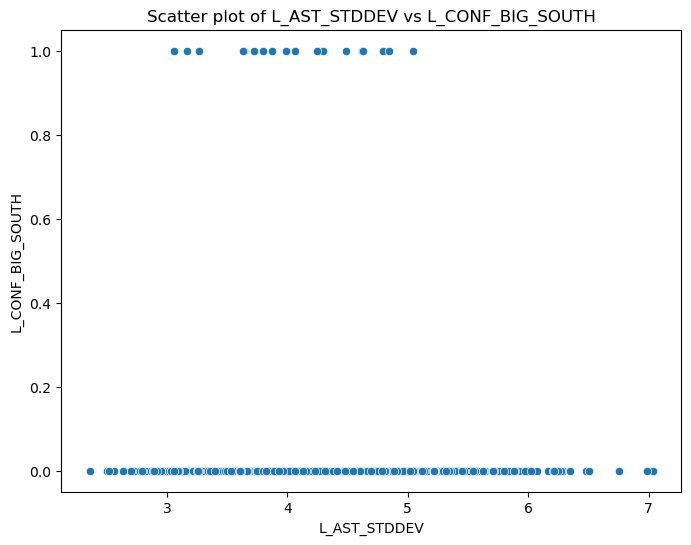

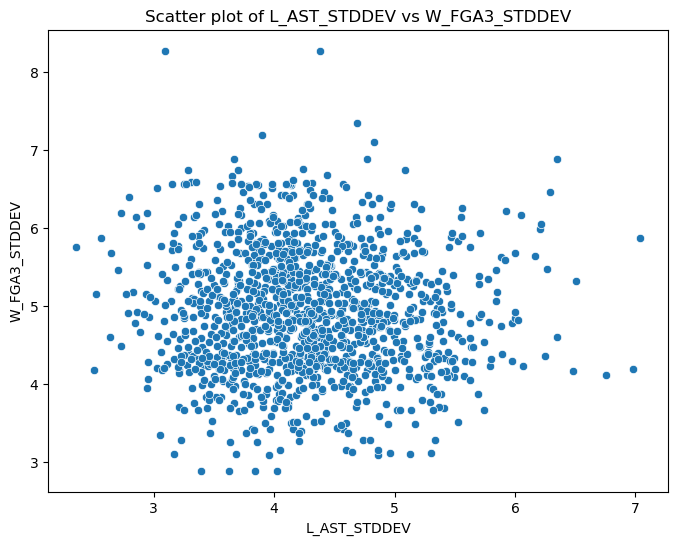

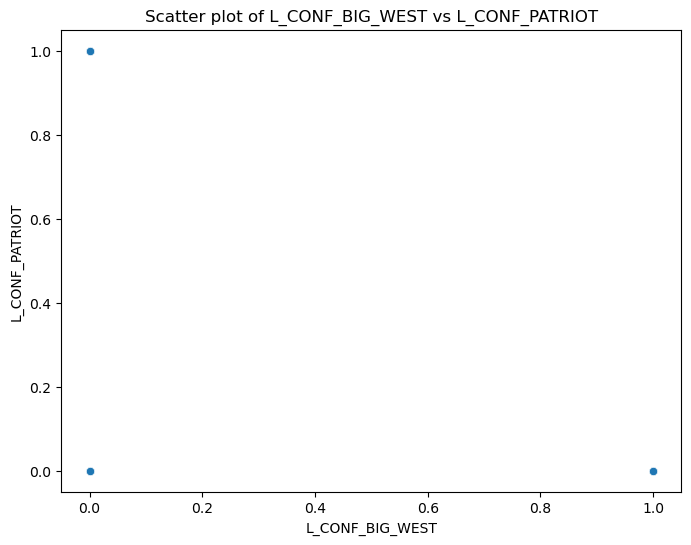

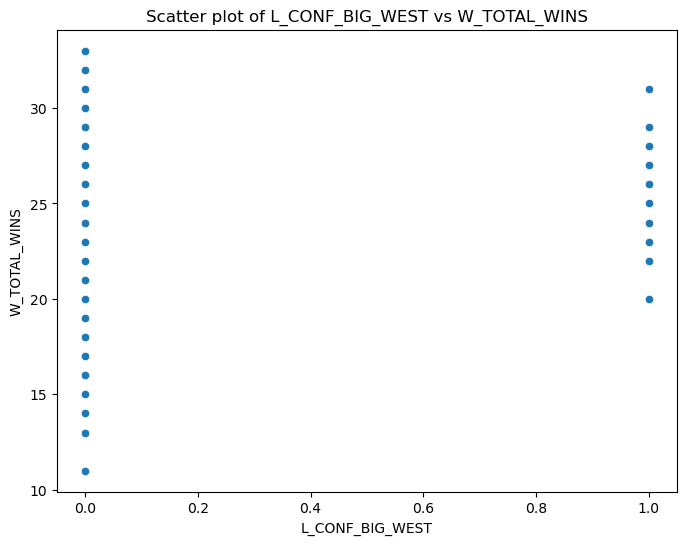

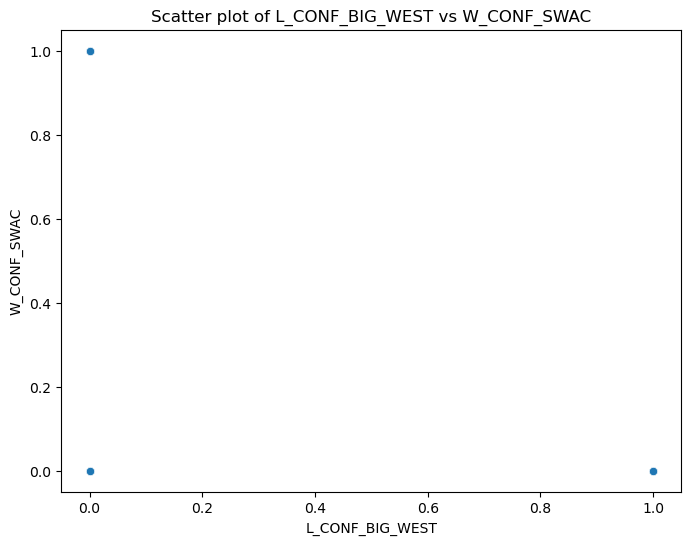

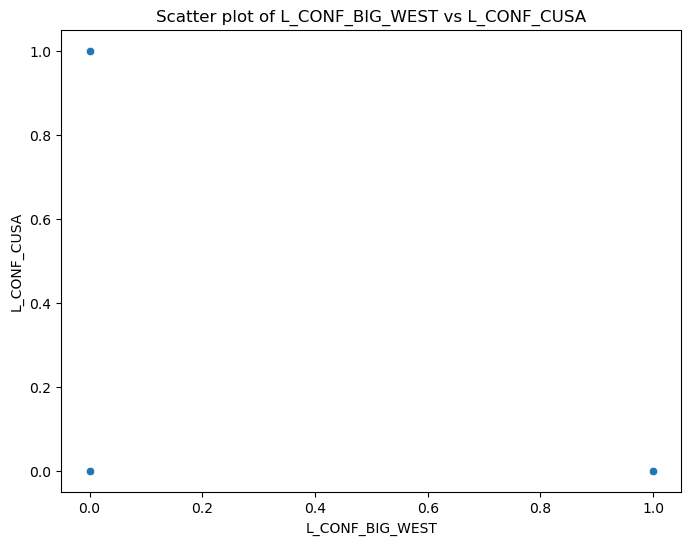

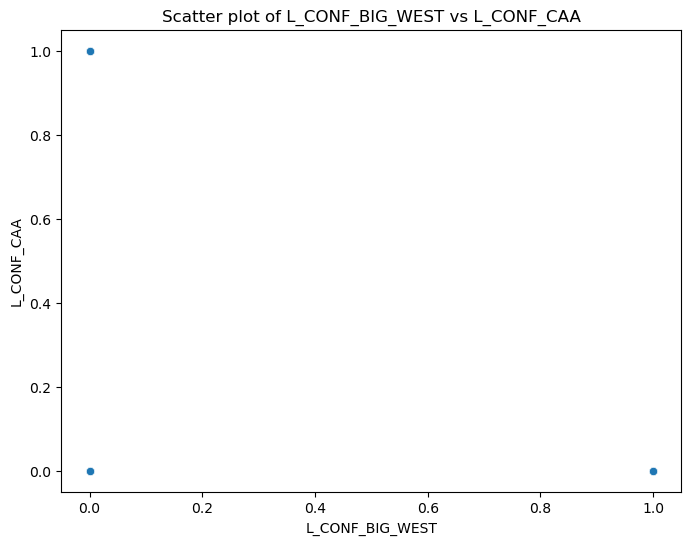

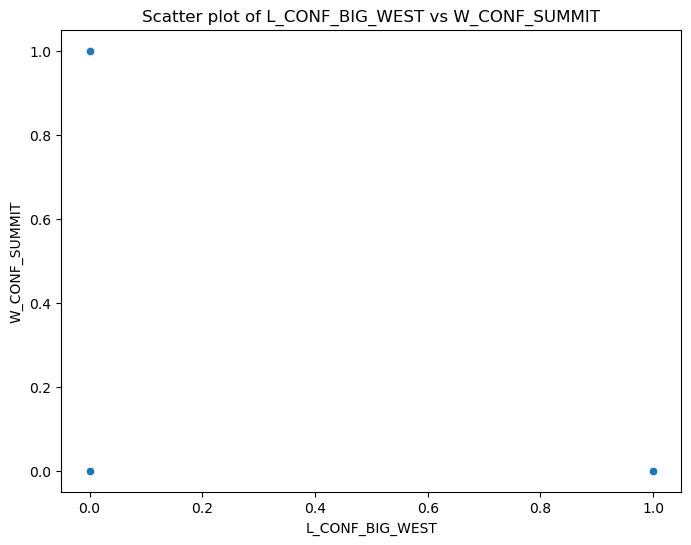

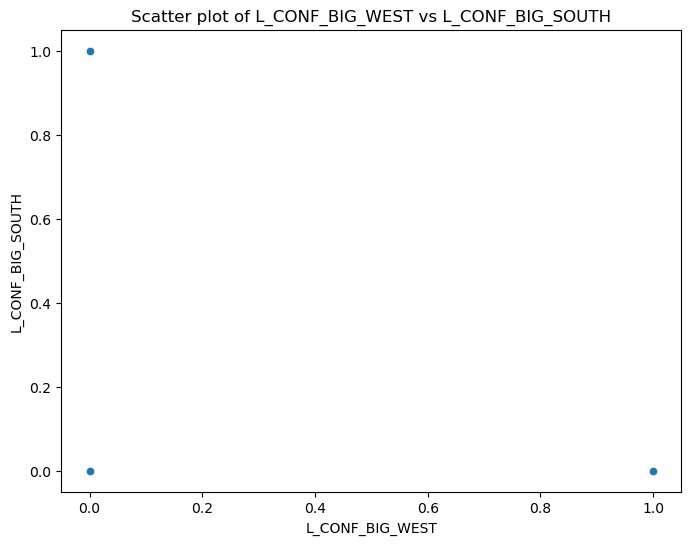

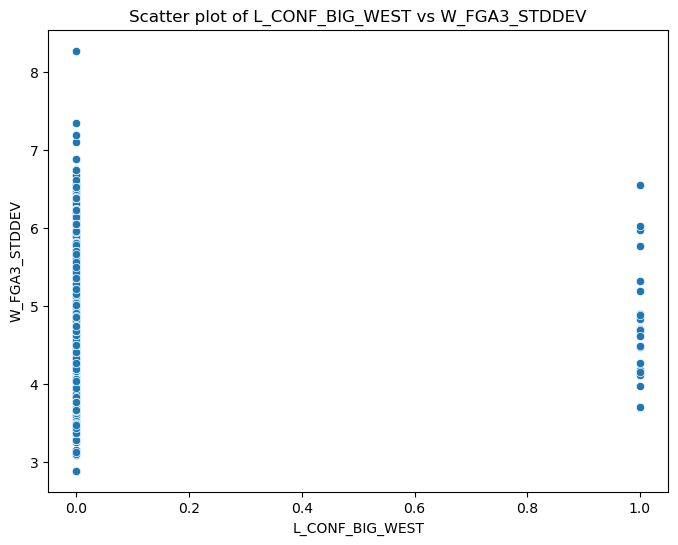

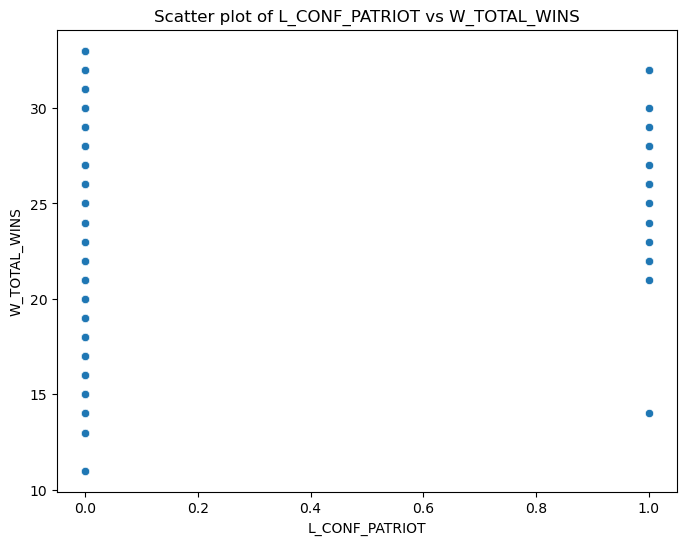

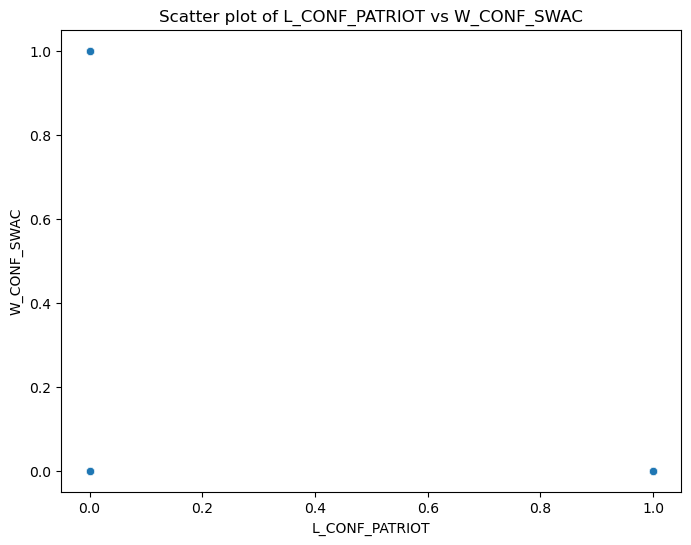

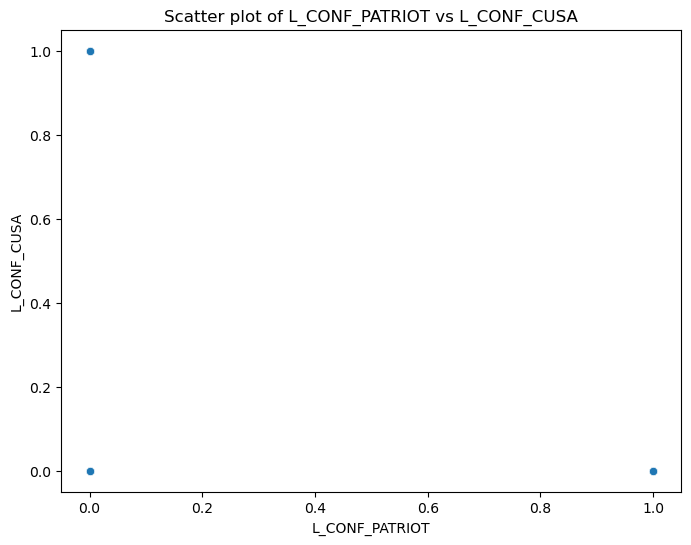

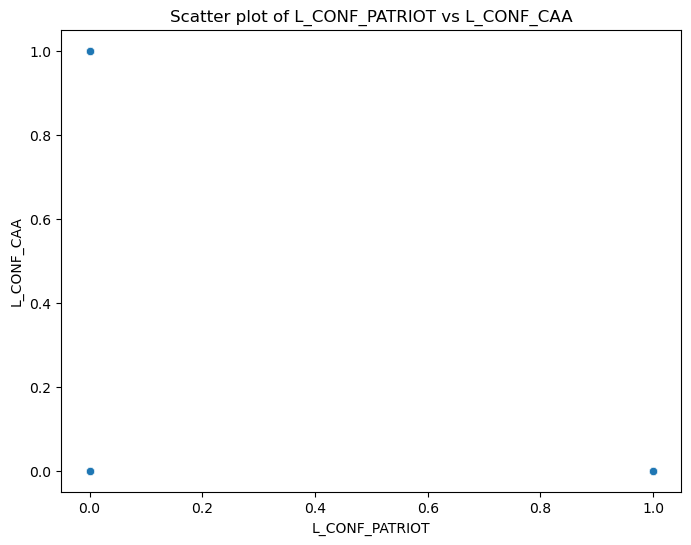

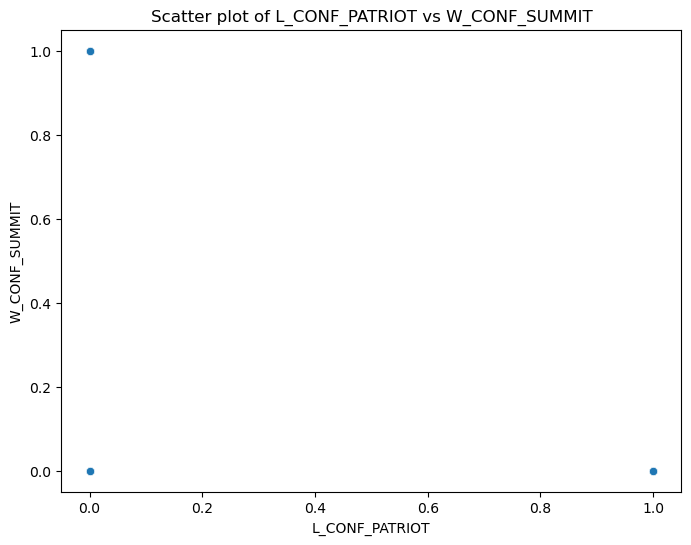

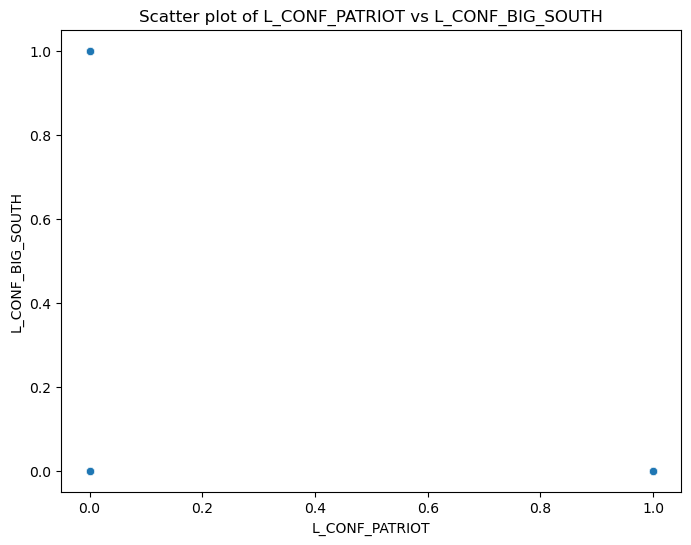

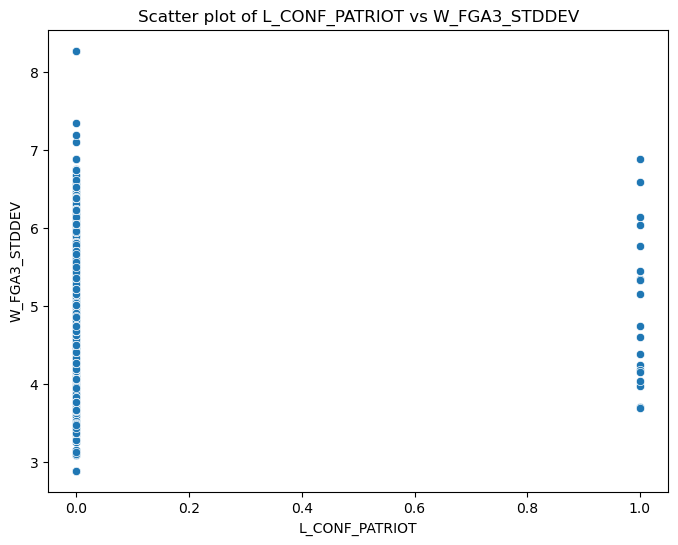

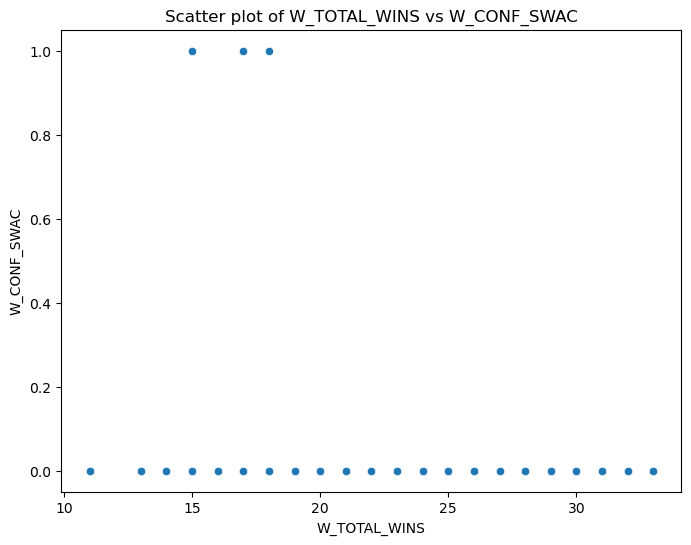

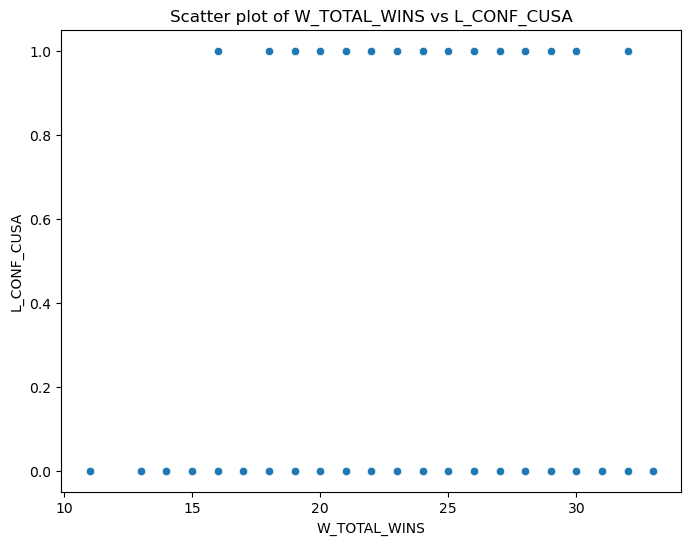

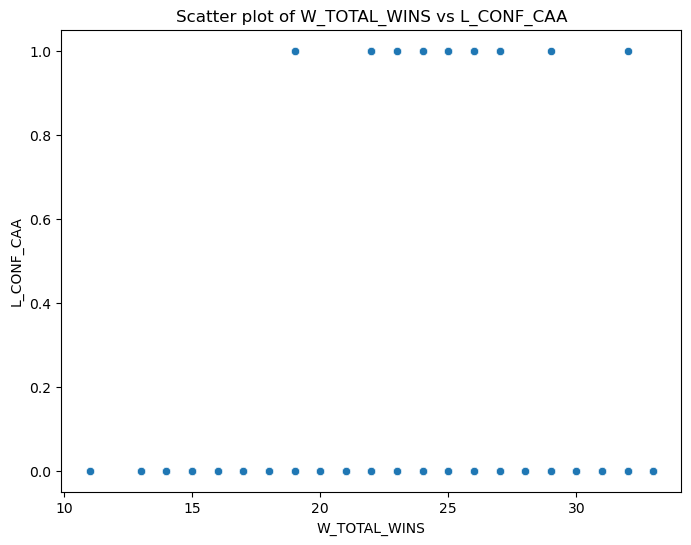

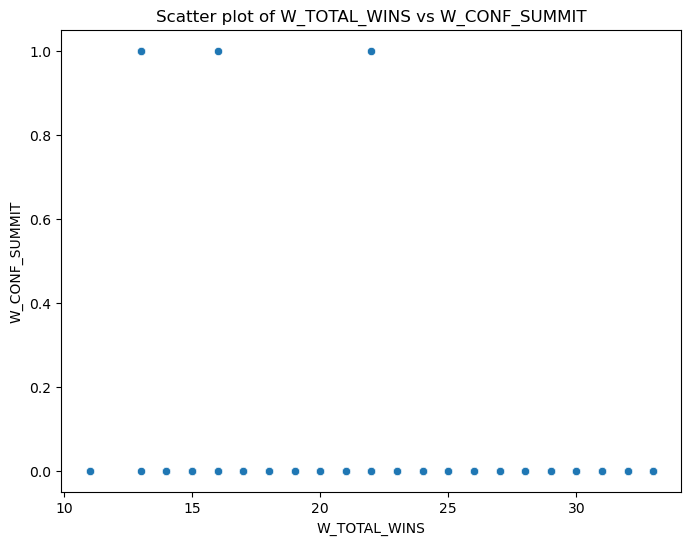

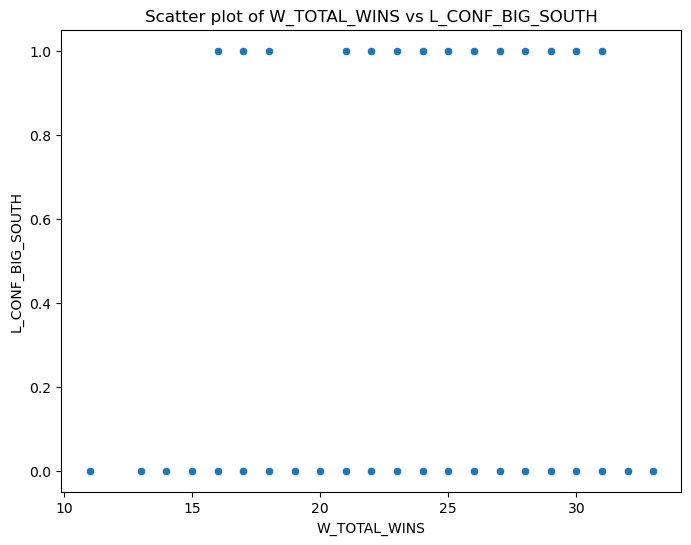

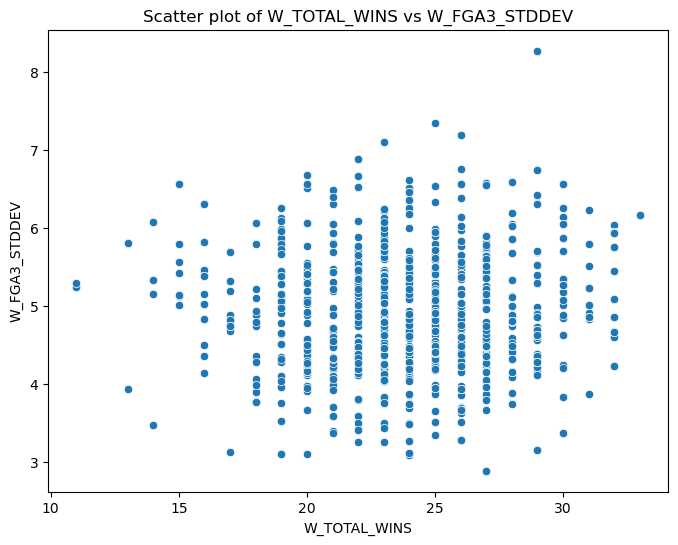

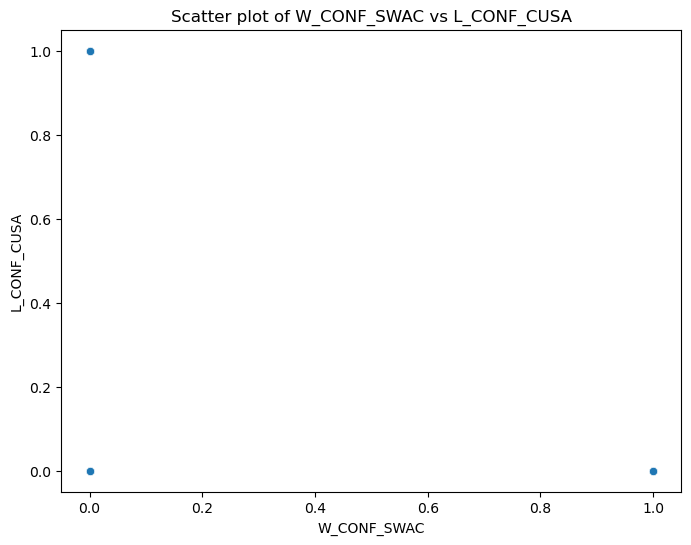

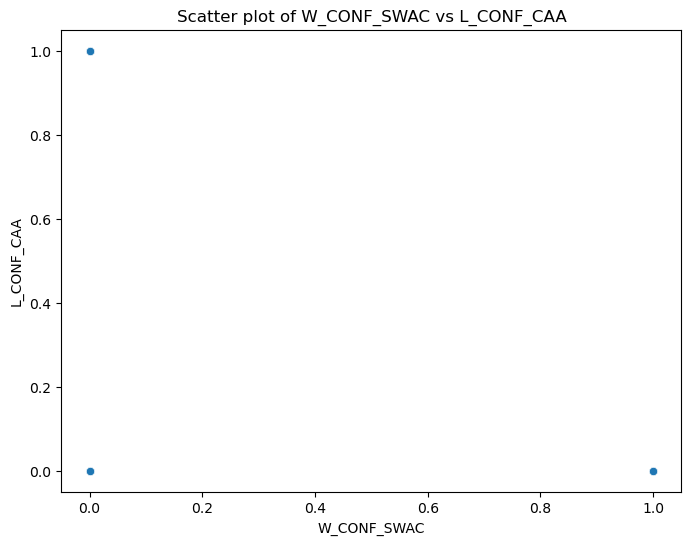

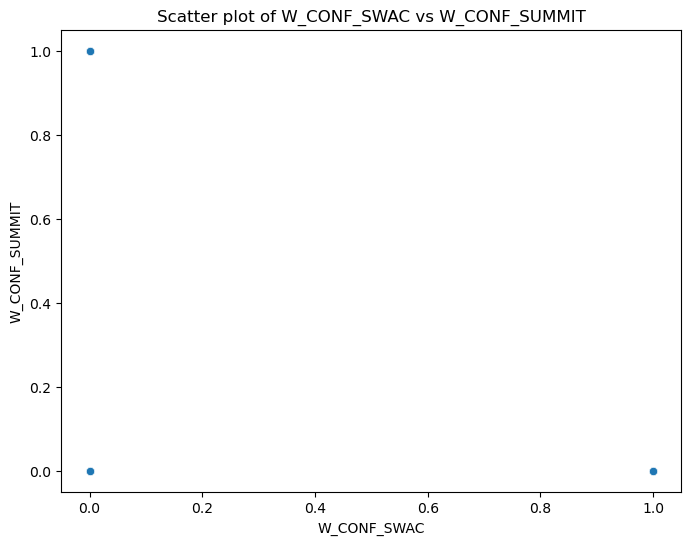

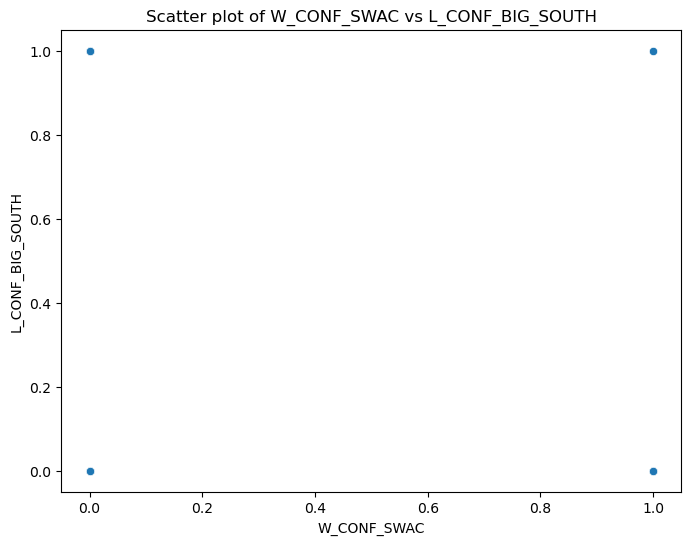

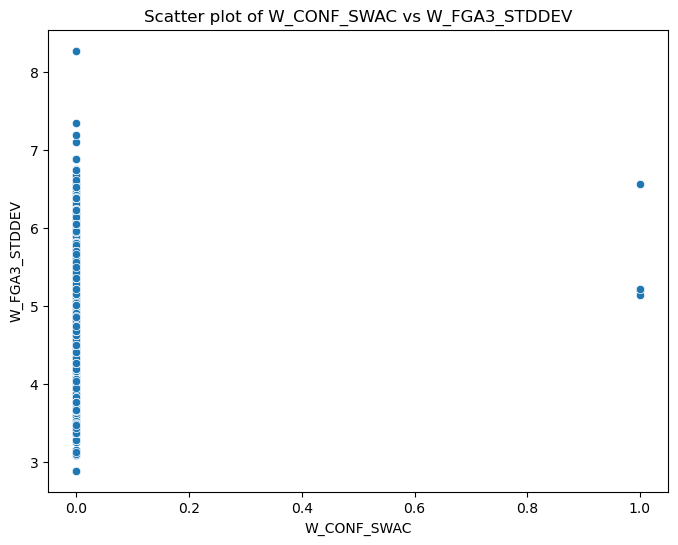

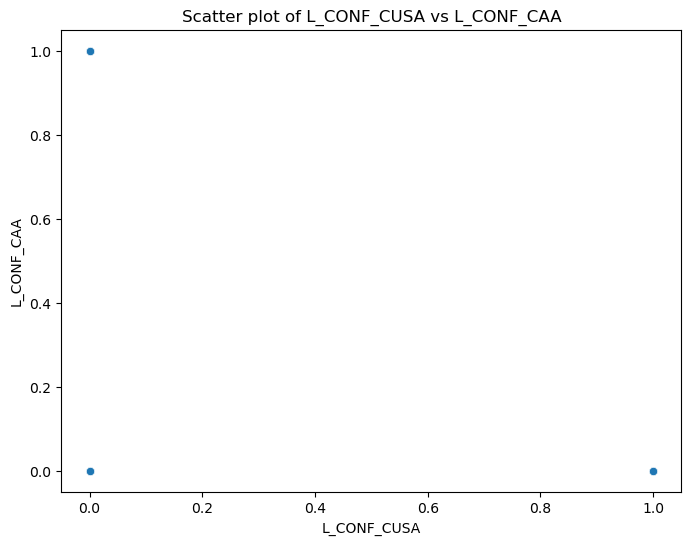

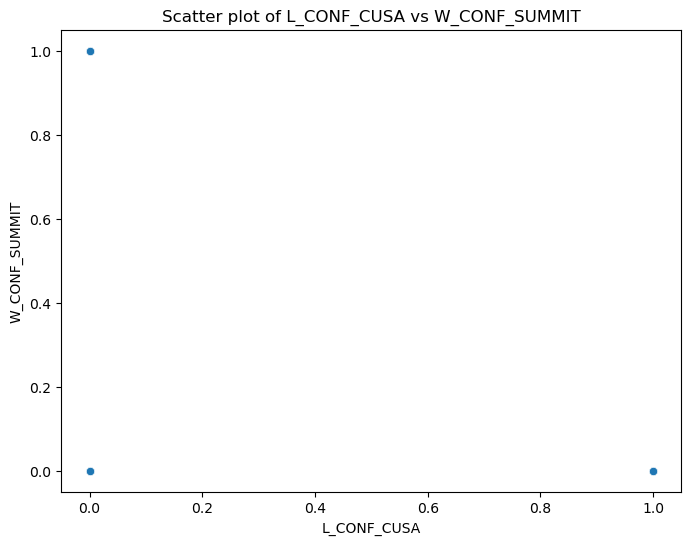

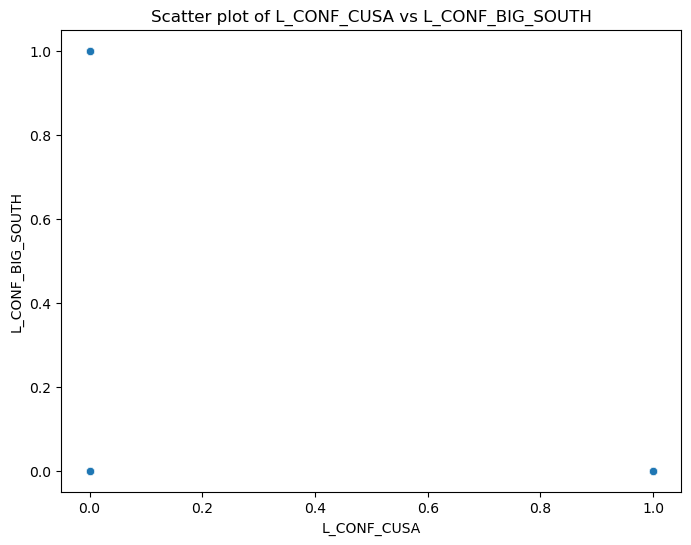

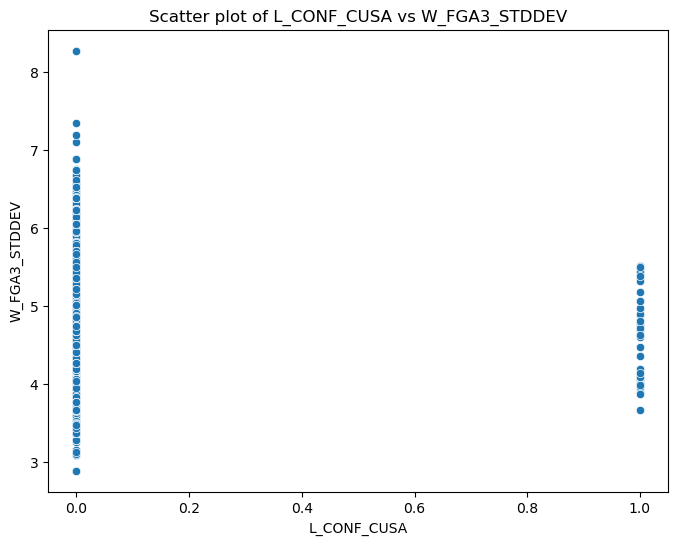

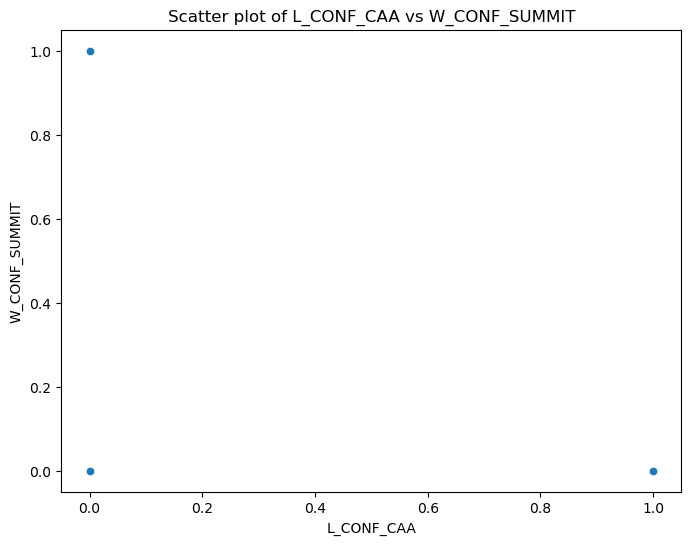

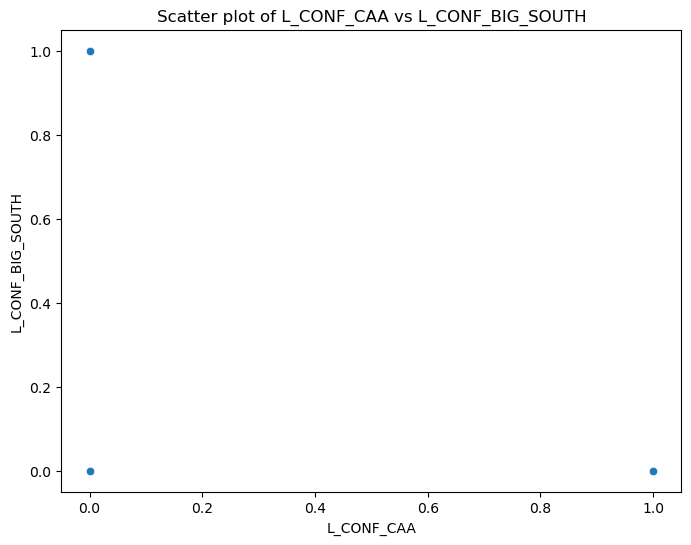

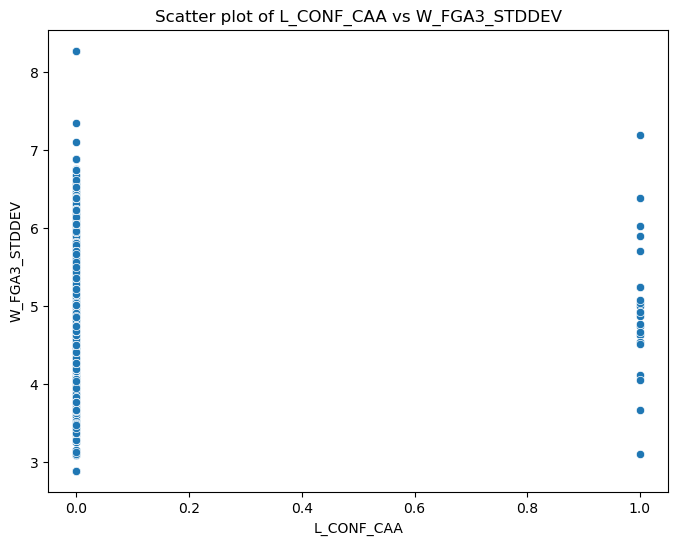

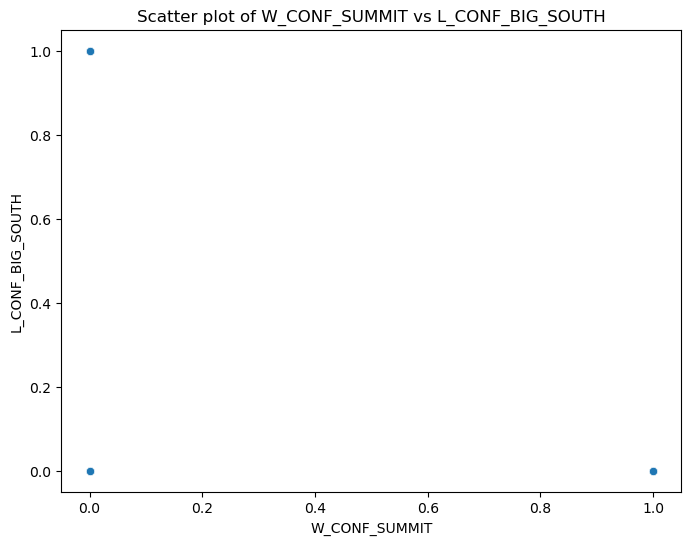

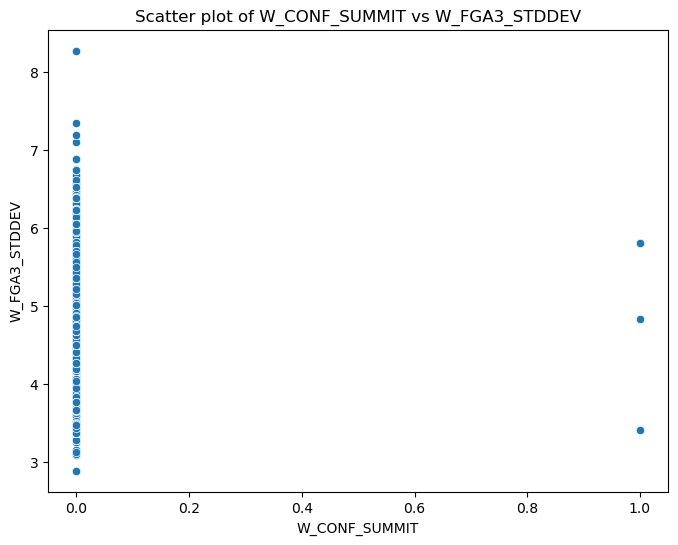

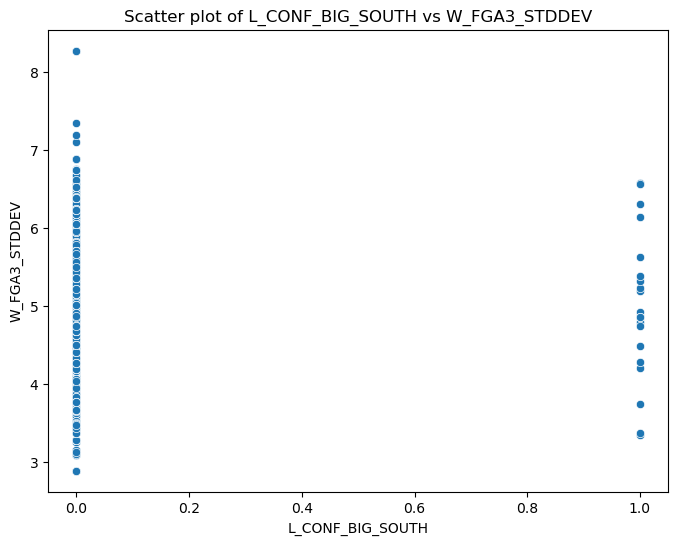

Correlation coefficients for numerical variables:
                   W_CONF_WAC  L_CONF_BIG_EAST  W_CONF_A_TEN  W_CONF_BIG_SKY  \
W_CONF_WAC          1.000000         0.017524     -0.012423       -0.001886   
L_CONF_BIG_EAST     0.017524         1.000000      0.031995       -0.008834   
W_CONF_A_TEN       -0.012423         0.031995      1.000000       -0.005062   
W_CONF_BIG_SKY     -0.001886        -0.008834     -0.005062        1.000000   
L_FGA3_MEAN        -0.015458         0.002951     -0.021493       -0.036518   
L_CONF_HORIZON     -0.009124        -0.042728     -0.024483       -0.003718   
L_CONF_AEC         -0.008499        -0.039797     -0.022804       -0.003463   
W_CONF_A_SUN       -0.004225         0.023146     -0.011336       -0.001721   
W_CONF_BIG_WEST    -0.004630         0.056729     -0.012423       -0.001886   
L_CONF_BIG_SKY     -0.008499        -0.039797      0.012542       -0.003463   
L_AST_STDDEV       -0.008415         0.094399     -0.042667        0.004309   
L

In [57]:
# Bivariate analysis - Scatter plots for two numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j])
        plt.title('Scatter plot of ' + numerical_columns[i] + ' vs ' + numerical_columns[j])
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

# Calculate correlation coefficients for numerical variables
correlation_matrix = df.corr()
print("Correlation coefficients for numerical variables:\n", correlation_matrix)